## | CC_EDTH_02 - Customer Churn |

## Business Objective

    An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

## Variable Description

    AccountID           account unique identifier 
    Churn               account churn flag (Target) 
    Tenure              Tenure of account 
    City_Tier           Tier of primary customer's city 
    CC_Contacted_L12m   How many times all the customers of the account has contacted customer care in last 12months 
    Payment             Preferred Payment mode of the customers in the account 
    Gender              Gender of the primary customer of the account 
    Service_Score       Satisfaction score given by customers of the account on service provided by company 
    Account_user_count  Number of customers tagged with this account 
    account_segment     Account segmentation on the basis of spend 
    CC_Agent_Score      Satisfaction score given by customers of the account on customer care service provided by company 
    Marital_Status      Marital status of the primary customer of the account 
    rev_per_month       Monthly average revenue generated by account in last 12 months 
    Complain_l12m       Any complaints has been raised by account in last 12 months 
    rev_growth_yoy      revenue growth percentage of the account (last 12 months vs last 24 to 13 month) 
    coupon_used_l12m    How many times customers have used coupons to do the payment in last 12 months 
    Day_Since_CC_connect Number of days since no customers in the account has contacted the customer care 
    cashback_l12m        Monthly average cashback generated by account in last 12 months 
    Login_device         Preferred login device of the customers in the account 

## Importing Libraries

In [1]:
# Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Preparation
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
#
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import optuna.integration.lightgbm as lgb

# Model Performance
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Model Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Feature Import

#### 1. Importing Dataset

In [2]:
df=pd.read_csv('Customer Churn Data.csv')
df.head(2)

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY     Payment  Gender  \
0      20000      1      4        3.0              6.0  Debit Card  Female   
1      20001      1      0        1.0              8.0         UPI    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5      160       Mobile  
1                       0                    0      121       Mobile

## Feature Removal

#### 1. Drop Irrevalent Features

In [3]:
df = df.drop(["AccountID"], axis=1)
df.head(2)

Churn Tenure  City_Tier  CC_Contacted_LY     Payment  Gender  \
0      1      4        3.0              6.0  Debit Card  Female   
1      1      0        1.0              8.0         UPI    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5      160       Mobile  
1                       0                    0      121       Mobile

## Feature Identification

### 1. Basics Statistics

####    1. (a) Dimensions of Input DataFrame

In [4]:
df.shape

(11260, 18)

#### 1. (b) Details of Input DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

#### 1. (c) Visualization of 'Target Value'

<AxesSubplot:>

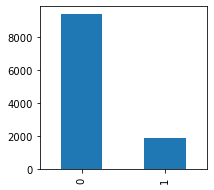

In [6]:
df['Churn'].value_counts().plot(kind='bar',figsize=(3,3))

#### 1. (d) Five Point Summary of Dataset

In [7]:
df.describe(include='all').T

count unique         top  freq      mean       std  \
Churn                    11260    NaN         NaN   NaN  0.168384  0.374223   
Tenure                   11158     38           1  1351       NaN       NaN   
City_Tier                11148    NaN         NaN   NaN   1.65393  0.915015   
CC_Contacted_LY          11158    NaN         NaN   NaN   17.8671   8.85327   
Payment                  11151      5  Debit Card  4587       NaN       NaN   
Gender                   11152      4        Male  6328       NaN       NaN   
Service_Score            11162    NaN         NaN   NaN   2.90253  0.725584   
Account_user_count       11148      7           4  4569       NaN       NaN   
account_segment          11163      7       Super  4062       NaN       NaN   
CC_Agent_Score           11144    NaN         NaN   NaN   3.06649   1.37977   
Marital_Status           11048      3     Married  5860       NaN       NaN   
rev_per_month            11158     59           3  1746       NaN       NaN   
Complain_ly              10903    NaN         NaN   NaN  0.285334  0.451594   
rev_growth_yoy           11260     20          14  1524       NaN       NaN   
coupon_used_for_payment  11260     20           1  4373       NaN       NaN   
Day_Since_CC_connect     10903     24           3  1816       NaN       NaN   
cashback                 10789    321         152   208       NaN       NaN   
Login_device             11039      3      Mobile  7482       NaN       NaN   

                         min  25%  50%  75%  max  
Churn                      0    0    0    0    1  
Tenure                   NaN  NaN  NaN  NaN  NaN  
City_Tier                  1    1    1    3    3  
CC_Contacted_LY            4   11   16   23  132  
Payment                  NaN  NaN  NaN  NaN  NaN  
Gender                   NaN  NaN  NaN  NaN  NaN  
Service_Score              0    2    3    3    5  
Account_user_count       NaN  NaN  NaN  NaN  NaN  
account_segment          NaN  NaN  NaN  NaN  NaN  
CC_Agent_Score             1    2    3    4    5  
Marital_Status           NaN  NaN  NaN  NaN  NaN  
rev_per_month            NaN  NaN  NaN  NaN  NaN  
Complain_ly                0    0    0    1    1  
rev_growth_yoy           NaN  NaN  NaN  NaN  NaN  
coupon_used_for_payment  NaN  NaN  NaN  NaN  NaN  
Day_Since_CC_connect     NaN  NaN  NaN  NaN  NaN  
cashback                 NaN  NaN  NaN  NaN  NaN  
Login_device             NaN  NaN  NaN  NaN  NaN

#### 1. (e) Feature Replacements

In [8]:
df["Gender"] = df["Gender"].replace("M", 'Male').replace("F", 'Female')

## Feature Visualization (on 'Main Dataset')

                                             |                                             | [  0%]   00:00 ->…

Report EDA_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



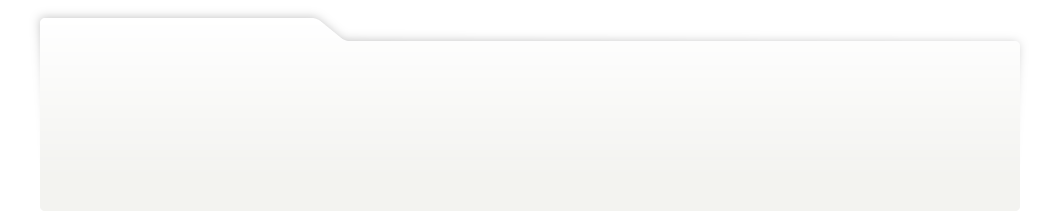
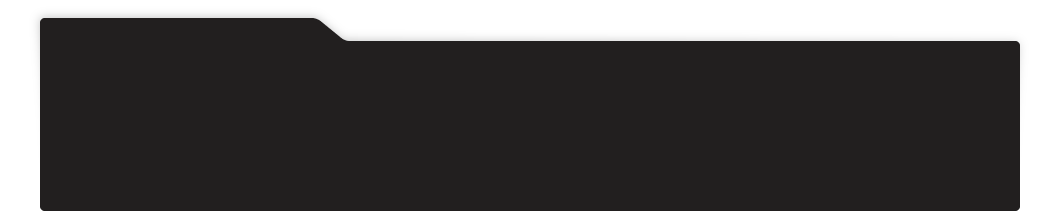
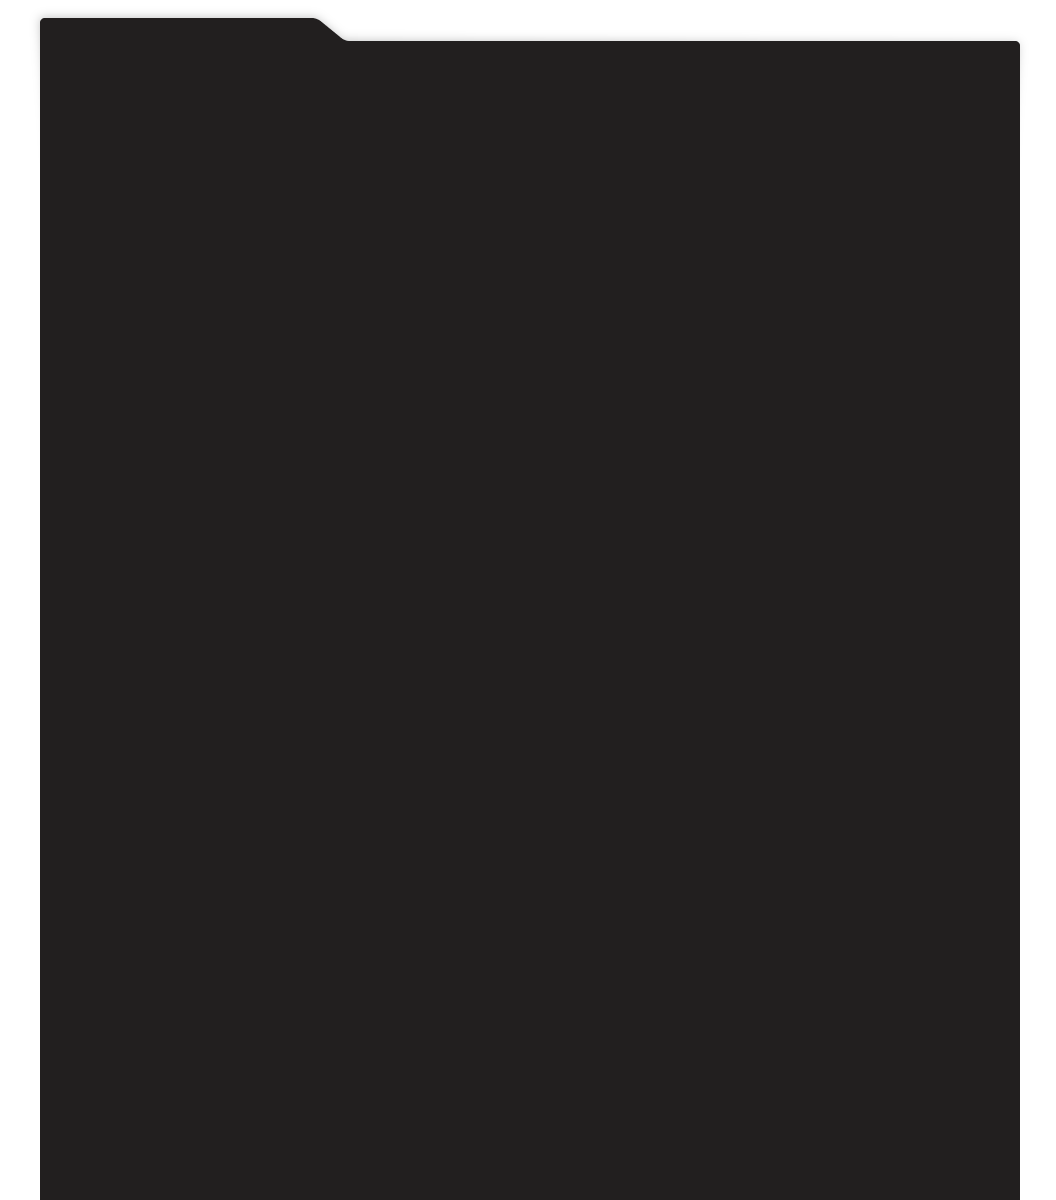
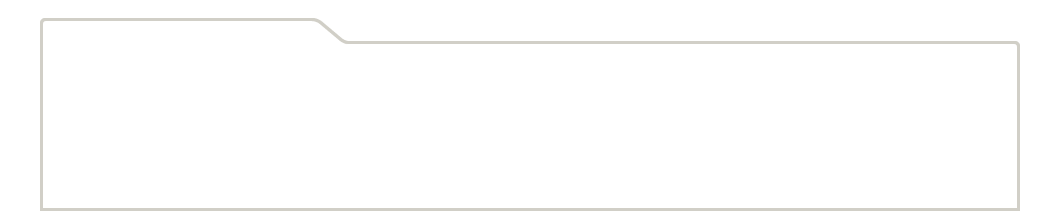
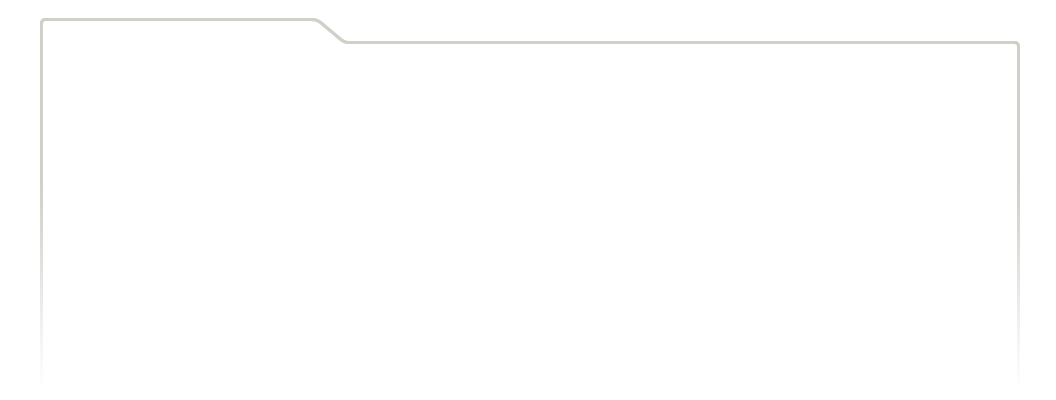
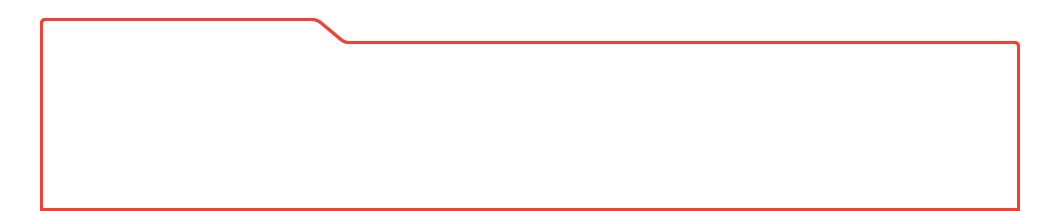
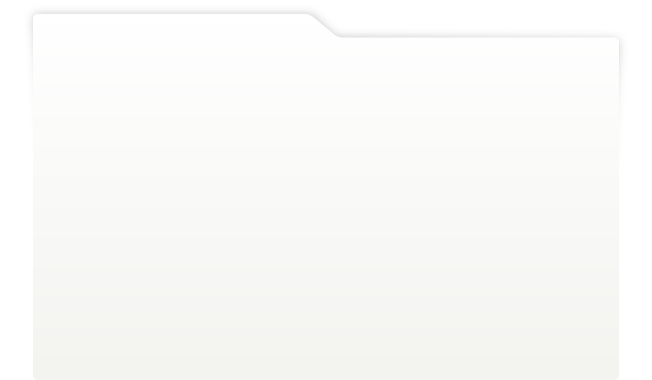
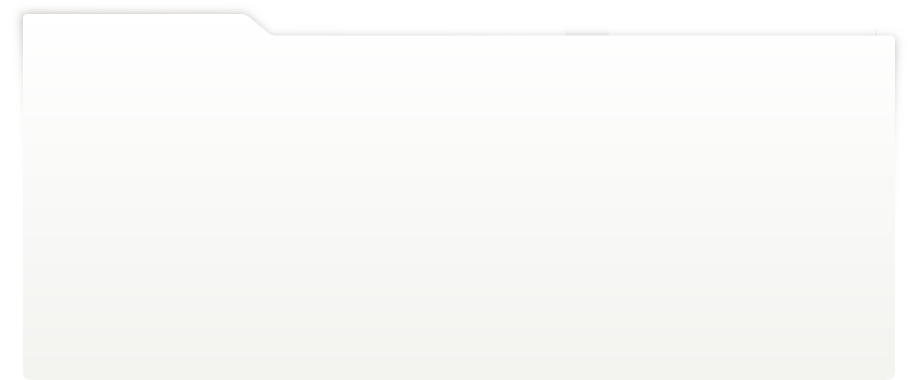
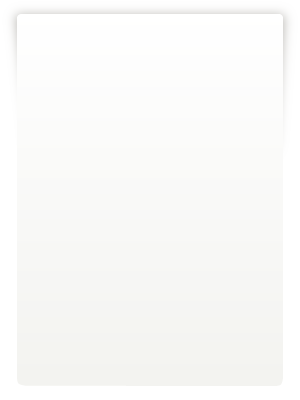
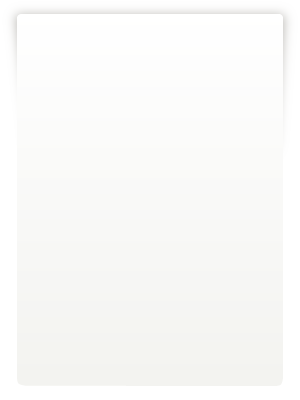
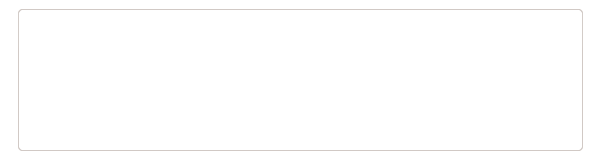
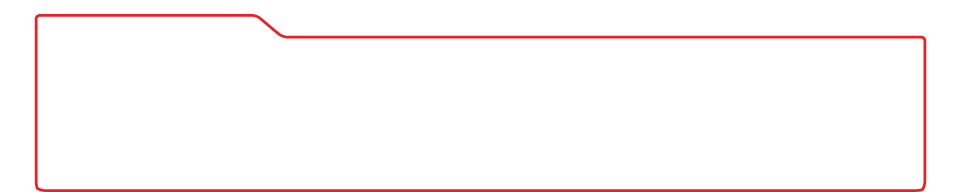
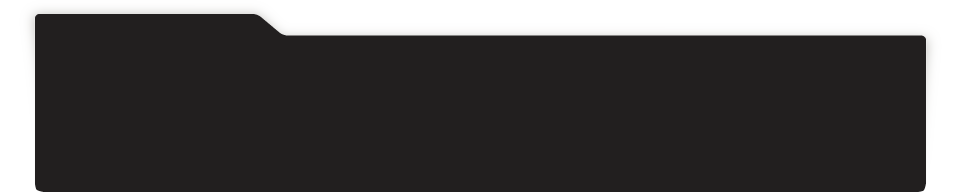
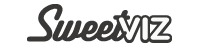
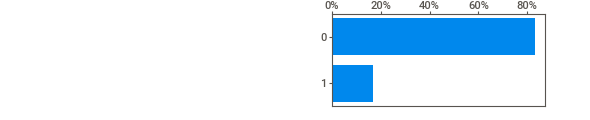
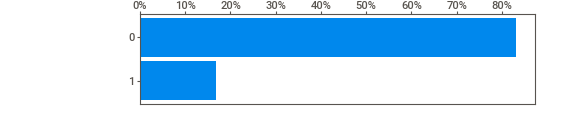
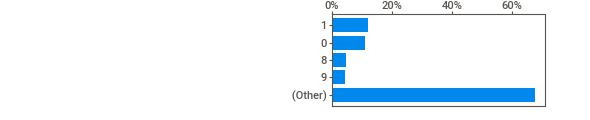
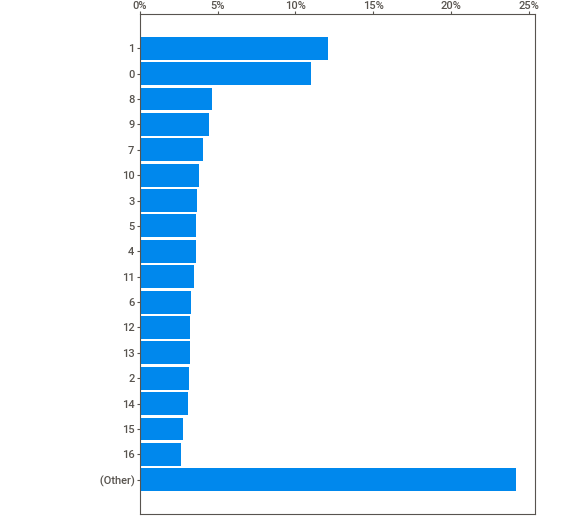
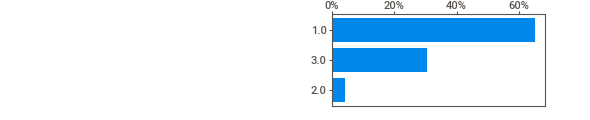
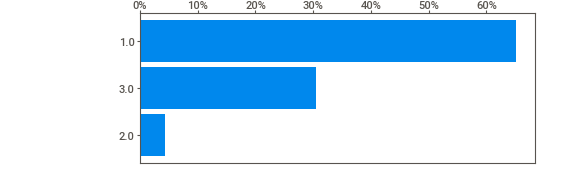
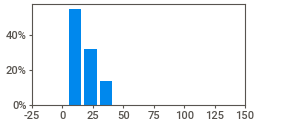
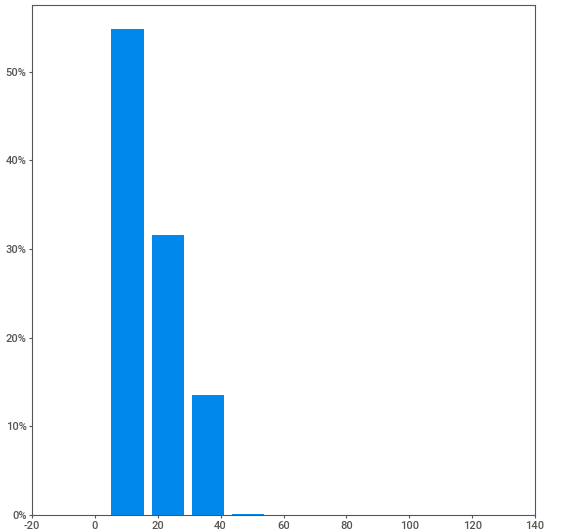
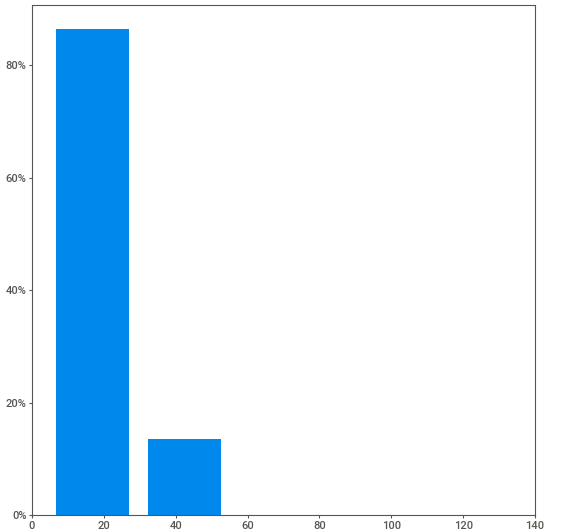
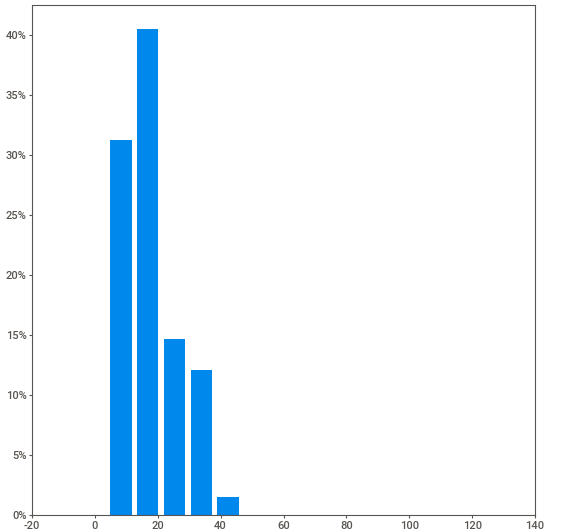
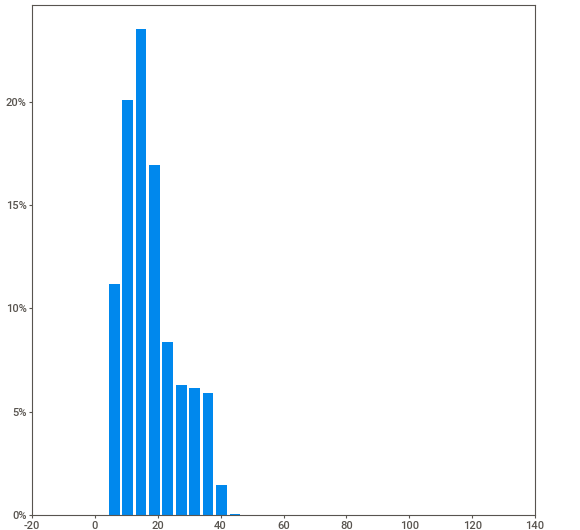
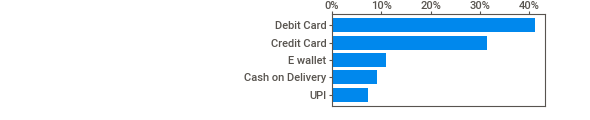
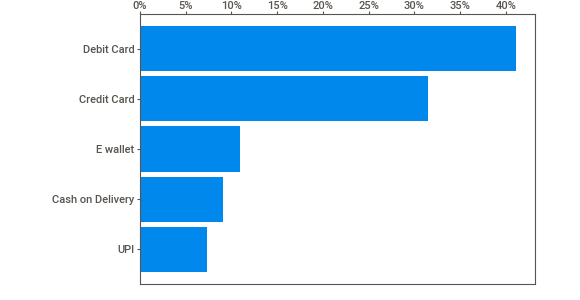
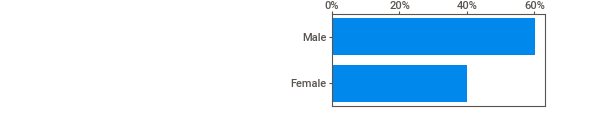
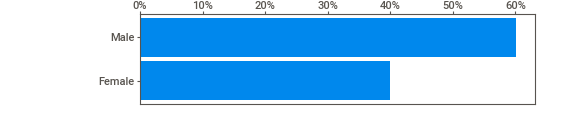
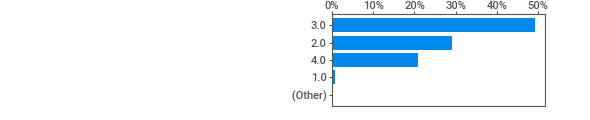
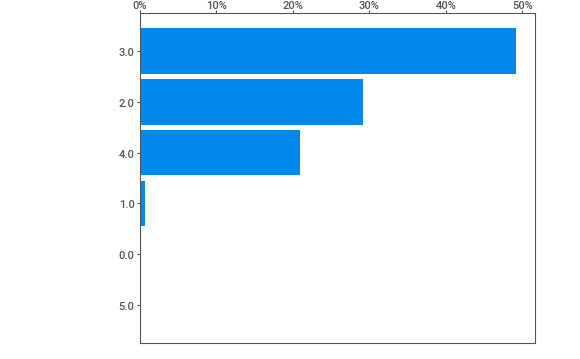
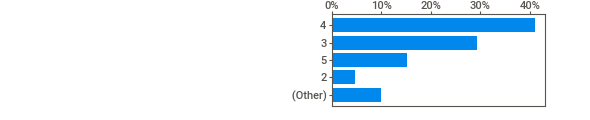
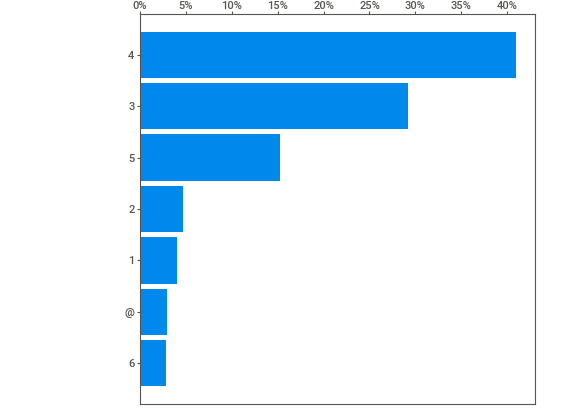
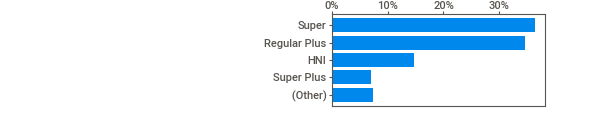
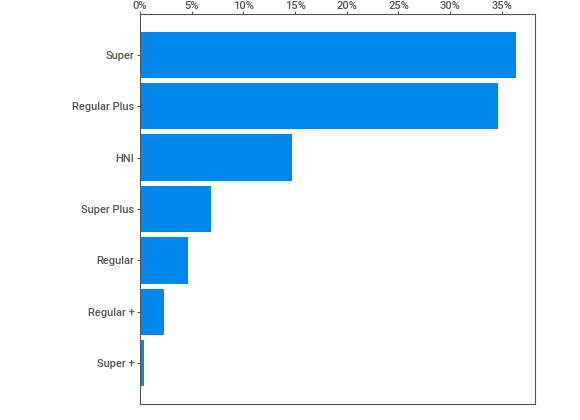
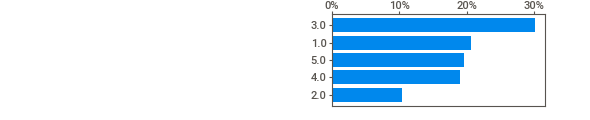
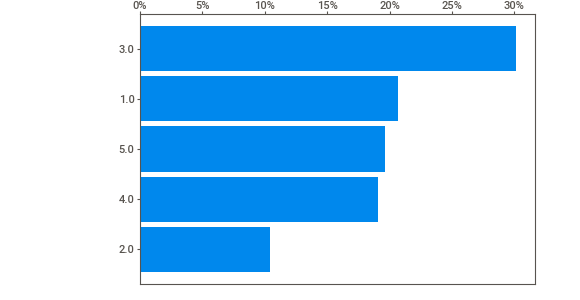
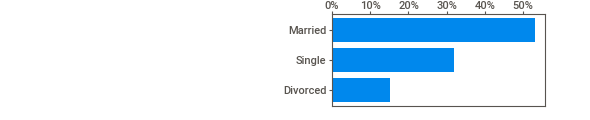
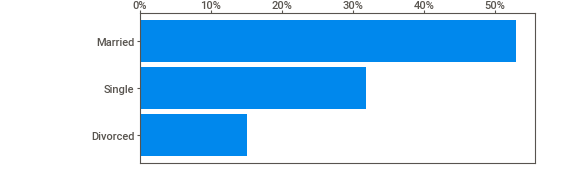
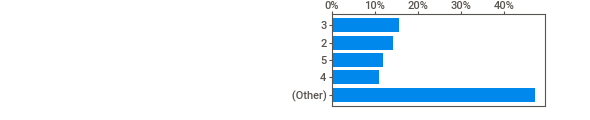
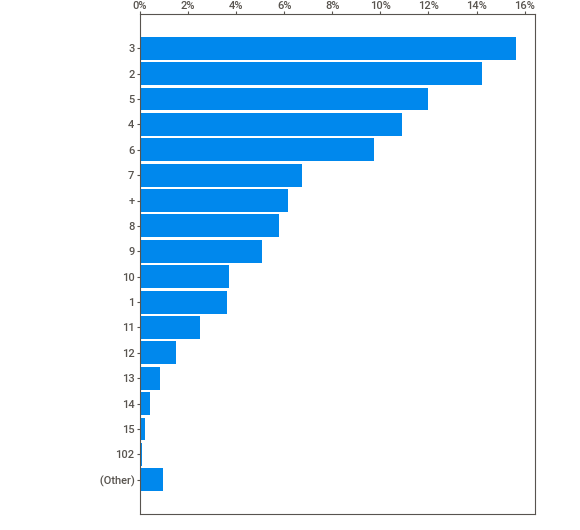
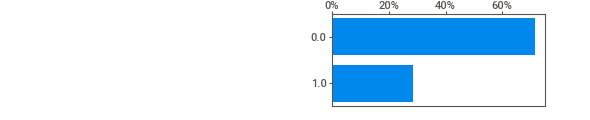
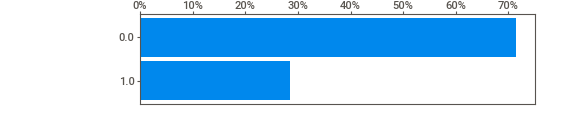
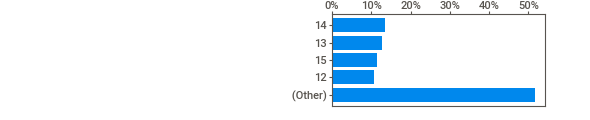
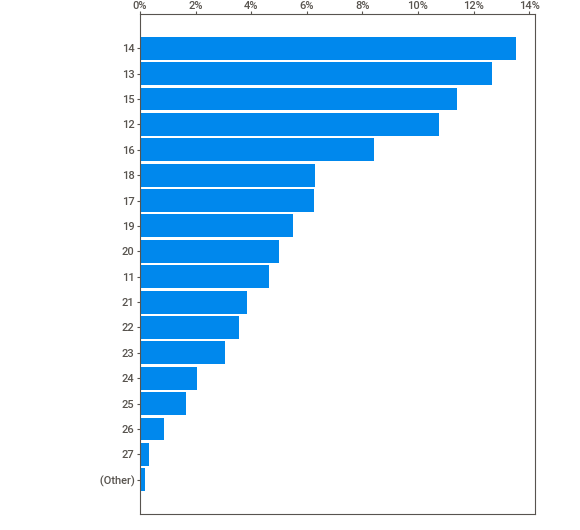
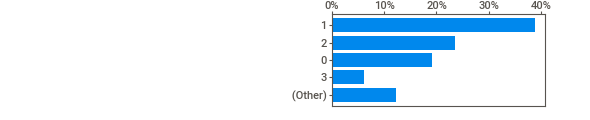
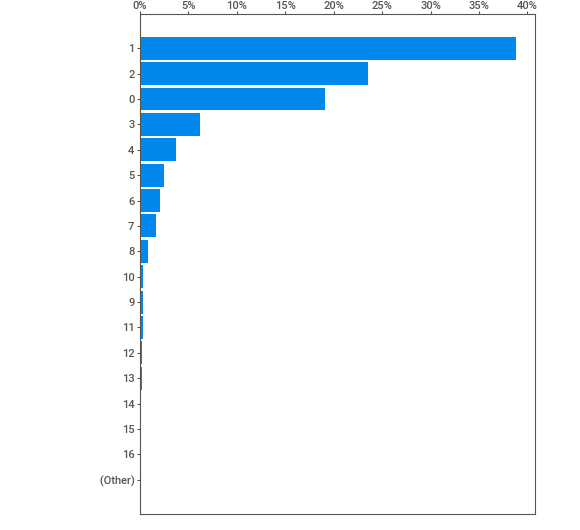
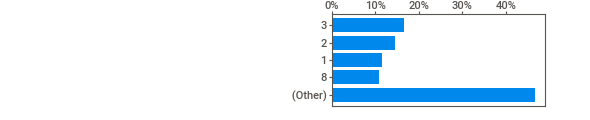
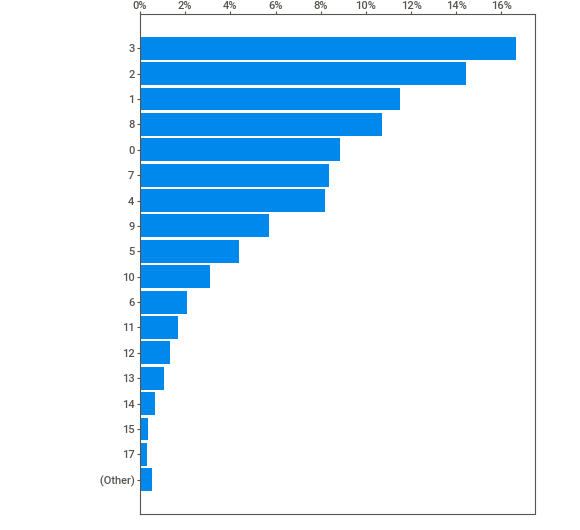
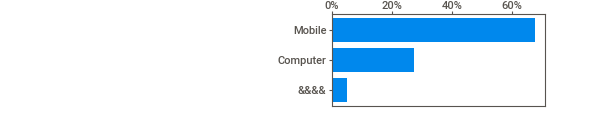
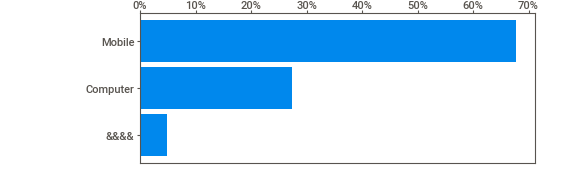
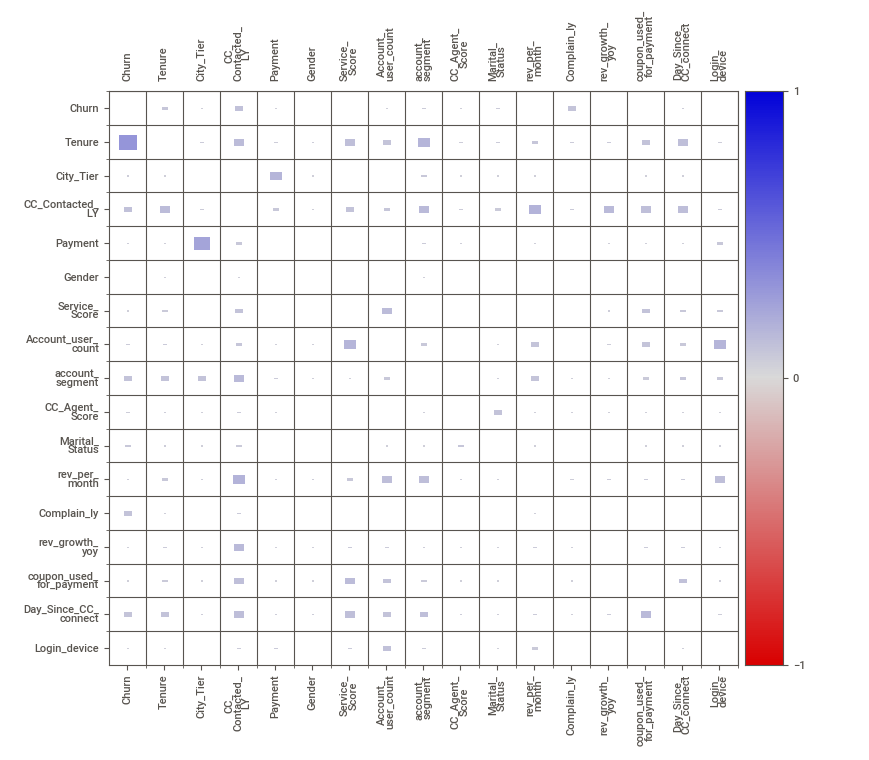
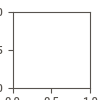

Report 'C:/Users/Avijit Chakraborty/Documents/Python Programming/GL - Python Collections/Capstone Project/EDA_sweetviz_maindata.html' was saved to storage.


In [9]:
import sweetviz as sv
eda_report_1 = sv.analyze(df)
eda_report_1.show_html('EDA_sweetviz.html')
eda_report_1.show_notebook(w=None, h=None,scale=None,layout='vertical',
filepath='C:/Users/Avijit Chakraborty/Documents/Python Programming/GL - Python Collections/Capstone Project/EDA_sweetviz_maindata.html')

## Feature Cleaning

#### 1. Missing Value Check

In [10]:
df.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

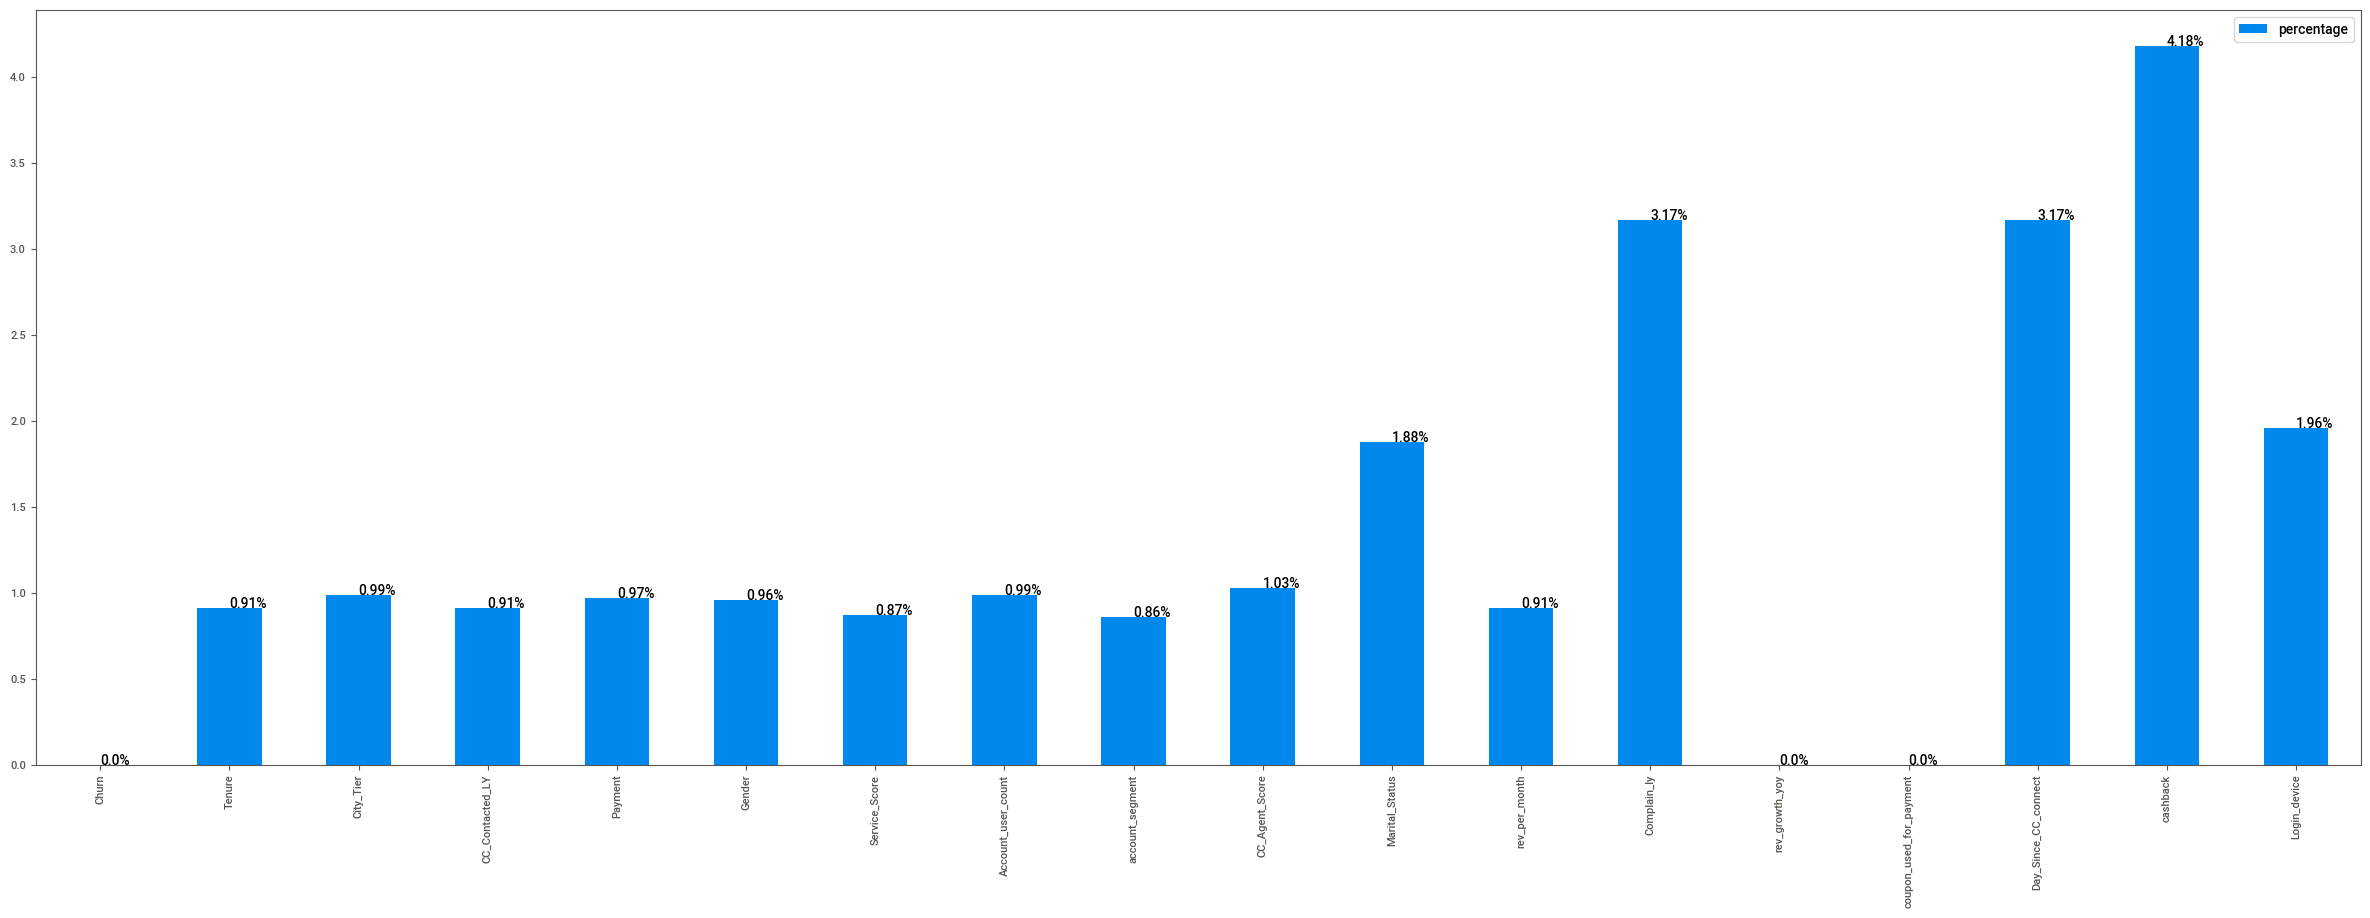

In [11]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

#### 2. Missing Value Treatment

In [12]:
df['Tenure'] = df['Tenure'].fillna("No_info")
df['Payment'] = df['Payment'].fillna("No_info")
df['Gender'] = df['Gender'].fillna("No_info")
df['Account_user_count'] = df['Account_user_count'].fillna("No_info")
df['account_segment'] = df['account_segment'].fillna("No_info")
df['Marital_Status'] = df['Marital_Status'].fillna("No_info")
df['rev_per_month'] = df['rev_per_month'].fillna("No_info")
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].fillna("No_info")
df['cashback'] = df['cashback'].fillna("No_info")
df['Login_device'] = df['Login_device'].fillna("No_info")

In [13]:
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].mean())
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].mean())
df['Service_Score'] = df['Service_Score'].fillna(df['Service_Score'].mean())
df['CC_Agent_Score'] = df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mean())
df['Complain_ly'] = df['Complain_ly'].fillna(df['Complain_ly'].mean())

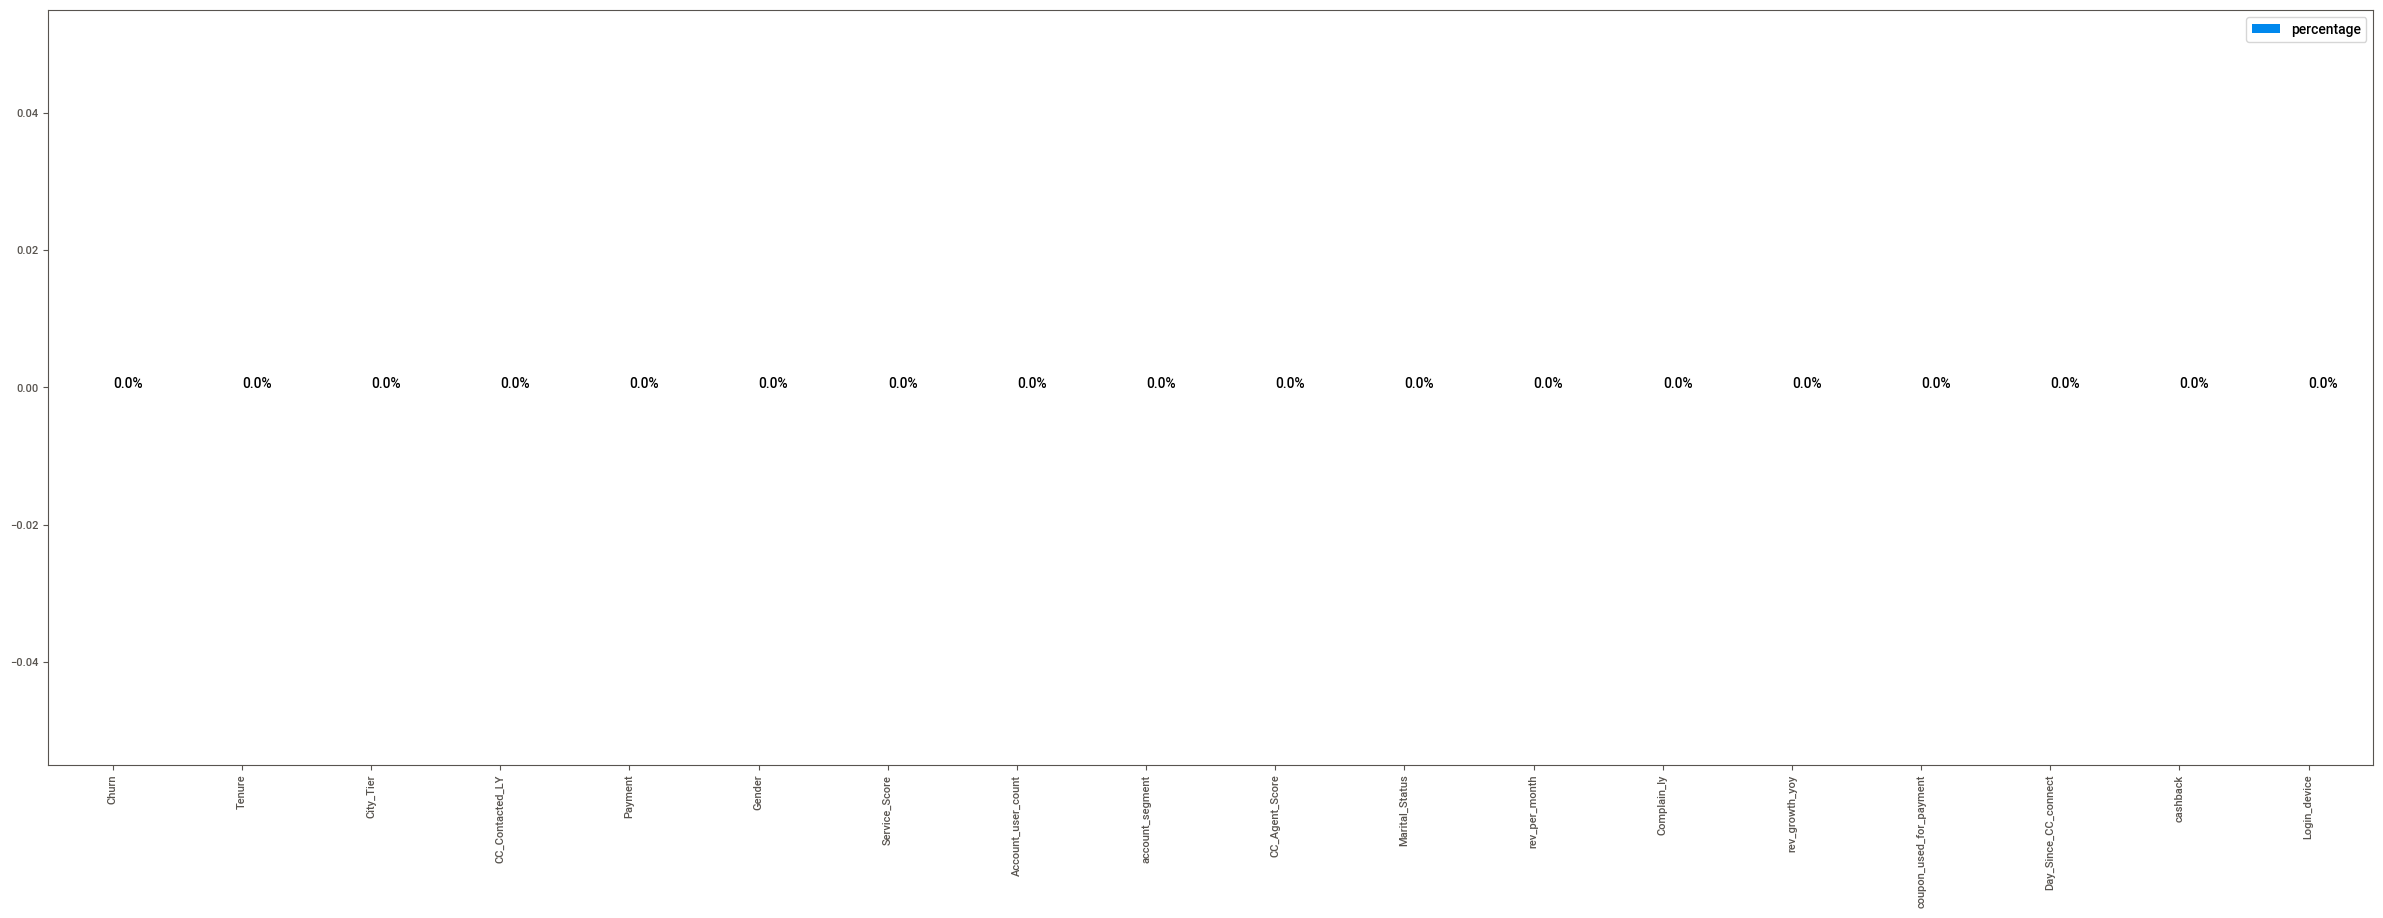

In [14]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

#### 3. Duplicate Value Check

In [15]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups].head(2)

Number of duplicate rows = 264


Churn Tenure  City_Tier  CC_Contacted_LY     Payment Gender  \
1347      1      0        1.0              8.0         UPI   Male   
1395      1     11        1.0              6.0  Debit Card   Male   

      Service_Score Account_user_count account_segment  CC_Agent_Score  \
1347            3.0                  4    Regular Plus             3.0   
1395            3.0                  4             HNI             3.0   

     Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
1347         Single             7          1.0             15   
1395         Single            10          1.0             13   

     coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
1347                       0                    0      121       Mobile  
1395                       0                    0      154       Mobile

#### 4. Outlier Check

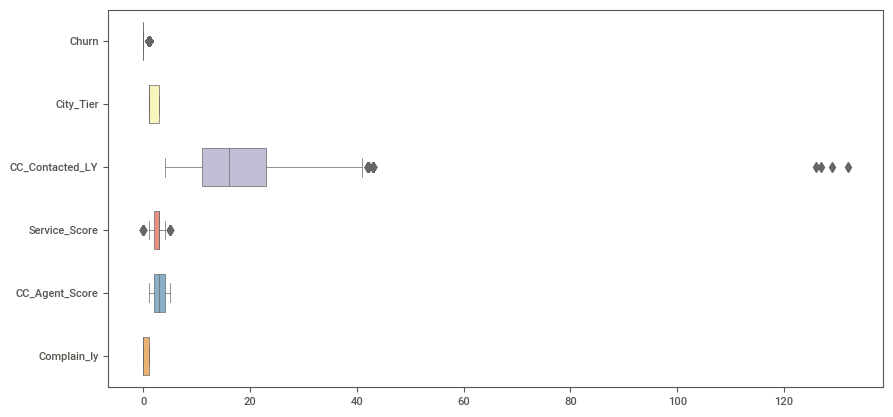

In [16]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

#### 5. Outlier Treatment

In [17]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for feature in df[['CC_Contacted_LY','Service_Score']]:
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

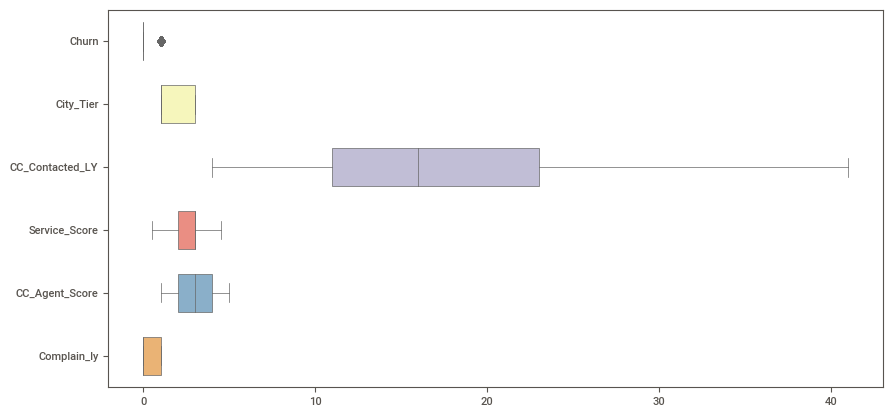

In [19]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

## Feature Encoding

In [20]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Tenure
[4, 0, 2, 13, 11, ..., 50, 60, 31, 51, 61]
Length: 39
Categories (39, object): [#, 0, 1, 10, ..., 8, 9, 99, No_info]
[27  1 13  6  4  0 36 37 12 14  7 35 20 11 28 25 34  2 17 24 23 31 22 18
 19  9  3  8 16 38 21  5 15 10 29 32 26 30 33]


feature: Payment
[Debit Card, UPI, Credit Card, Cash on Delivery, E wallet, No_info]
Categories (6, object): [Cash on Delivery, Credit Card, Debit Card, E wallet, No_info, UPI]
[2 5 1 0 3 4]


feature: Gender
[Female, Male, No_info]
Categories (3, object): [Female, Male, No_info]
[0 1 2]


feature: Account_user_count
[3, 4, No_info, 5, 2, @, 1, 6]
Categories (8, object): [1, 2, 3, 4, 5, 6, @, No_info]
[2 3 7 4 1 6 0 5]


feature: account_segment
[Super, Regular Plus, Regular, HNI, Regular +, No_info, Super Plus, Super +]
Categories (8, object): [HNI, No_info, Regular, Regular +, Regular Plus, Super, Super +, Super Plus]
[5 4 2 0 3 1 7 6]


feature: Marital_Status
[Single, Divorced, Married, No_info]
Categories (4, object): [Divorced,

## Dataset Split

#### 1. Extracting the target column into separate vectors for training set and test set

In [21]:
X = df.drop("Churn", axis=1)
y = df.pop("Churn")

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.3, random_state=1)

In [23]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (7882, 17)
X_test (3378, 17)
train_labels (7882,)
test_labels (3378,)


## Feature Selection

    It can shows the most important and significant features between all of the features which can mark importance in the performance of the model and get most required business insights.
    For this we have gone through the following procedure of feature selection :
    
    (1) VIF & Multicollinearity (dropping features having VIF>5)
    (2) Checking P values (dropping features having p values > 0.05)
    (3) Chi-square Test (Find most influenced features in ascending order)
    (4) Boruta Algorithm

#### 1. Checking Multicollinearity & VIF

In [24]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns

In [25]:
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

                    feature        VIF
0                    Tenure   2.406536
1                 City_Tier   4.386839
2           CC_Contacted_LY   5.163291
3                   Payment   3.388428
4                    Gender   2.414068
5             Service_Score  18.029489
6        Account_user_count   6.763558
7           account_segment   5.007305
8            CC_Agent_Score   5.461601
9            Marital_Status   2.798227
10            rev_per_month   6.357670
11              Complain_ly   1.416356
12           rev_growth_yoy   3.750396
13  coupon_used_for_payment   4.061597
14     Day_Since_CC_connect   3.933805
15                 cashback   2.557695
16             Login_device   7.962963


#### 2. Dropping Variables having VIF>5 and Recheck the VIF Values

In [26]:
X_train = X_train.drop(["rev_per_month","Login_device","Service_Score","Account_user_count"], axis=1)
X_test = X_test.drop(["rev_per_month","Login_device","Service_Score","Account_user_count"], axis=1)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (7882, 13)
X_test (3378, 13)


In [27]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns
#
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

                    feature       VIF
0                    Tenure  2.349900
1                 City_Tier  4.263793
2           CC_Contacted_LY  4.805932
3                   Payment  3.341835
4                    Gender  2.348363
5           account_segment  4.640596
6            CC_Agent_Score  4.940548
7            Marital_Status  2.679771
8               Complain_ly  1.400877
9            rev_growth_yoy  3.545252
10  coupon_used_for_payment  3.681908
11     Day_Since_CC_connect  3.818128
12                 cashback  2.456347


#### 3. Using p-values Check

##### Iteration-1

In [28]:
col = X_train.columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.Logit(train_labels.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.339213
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7868
Method:                           MLE   Df Model:                           13
Date:                Sat, 06 Nov 2021   Pseudo R-squ.:                  0.2513
Time:                        08:51:21   Log-Likelihood:                -2673.7
converged:                       True   LL-Null:                       -3571.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.6288      0.210    -12.499      0.000      -3.041      -2.217
Tenure                     -0.0762      0.004    -20.478      0.000      -0.084      -0.069
City_Tier                   0.3470      0.039      8.973      0.000       0.271       0.423
CC_Contacted_LY             0.0292      0.004      7.174      0.000       0.021       0.037
Payment                    -0.0584      0.029     -1.998      0.046      -0.116      -0.001
Gender                      0.2763      0.070      3.940      0.000       0.139       0.414
account_segment            -0.1540      0.021     -7.306      0.000      -0.195      -0.113
CC_Agent_Score              0.2711      0.026     10.502      0.000       0.221       0.322
Marital_Status              0.4003      0.032     12.572      0.000       0.338       0.463
Complain_ly                 1.5346      0.074     20.871      0.000       1.390       1.679
rev_growth_yoy             -0.0136      0.009     -1.440      0.150      -0.032       0.005
coupon_used_for_payment     0.0265      0.008      3.411      0.001       0.011       0.042
Day_Since_CC_connect       -0.0450      0.005     -9.728      0.000      -0.054      -0.036
cashback                   -0.0042      0.000     -8.806      0.000      -0.005      -0.003
===========================================================================================
"""

     Dropping the features having 'p-value' > 0.05

In [29]:
X_train = X_train.drop(['rev_growth_yoy'],axis=1)
X_test = X_test.drop(['rev_growth_yoy'],axis=1)

##### Iteration-2

In [30]:
col = X_train.columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.Logit(train_labels.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.339345
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7869
Method:                           MLE   Df Model:                           12
Date:                Sat, 06 Nov 2021   Pseudo R-squ.:                  0.2510
Time:                        08:51:21   Log-Likelihood:                -2674.7
converged:                       True   LL-Null:                       -3571.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.7056      0.204    -13.279      0.000      -3.105      -2.306
Tenure                     -0.0761      0.004    -20.452      0.000      -0.083      -0.069
City_Tier                   0.3484      0.039      9.016      0.000       0.273       0.424
CC_Contacted_LY             0.0288      0.004      7.087      0.000       0.021       0.037
Payment                    -0.0584      0.029     -1.998      0.046      -0.116      -0.001
Gender                      0.2792      0.070      3.985      0.000       0.142       0.417
account_segment            -0.1539      0.021     -7.297      0.000      -0.195      -0.113
CC_Agent_Score              0.2718      0.026     10.534      0.000       0.221       0.322
Marital_Status              0.3995      0.032     12.548      0.000       0.337       0.462
Complain_ly                 1.5337      0.074     20.865      0.000       1.390       1.678
coupon_used_for_payment     0.0257      0.008      3.318      0.001       0.011       0.041
Day_Since_CC_connect       -0.0450      0.005     -9.720      0.000      -0.054      -0.036
cashback                   -0.0042      0.000     -8.801      0.000      -0.005      -0.003
===========================================================================================
"""

#### 4. Recursive Feature Elimination

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#
chi2_features = SelectKBest(score_func = chi2, k = "all")
X_train_kbest = chi2_features.fit(X_train, train_labels)
#
X_train_scores = pd.DataFrame(X_train_kbest.scores_,columns=["Score"])
X_train_columns = pd.DataFrame(X_train.columns)
#
X_train_features_rank = pd.concat([X_train_columns,X_train_scores],axis=1)
#
X_train_features_rank.columns = ['Features','Score']
X_train_features_rank

Features        Score
0                    Tenure  7017.771325
1                 City_Tier    25.047843
2           CC_Contacted_LY   176.852914
3                   Payment     0.017068
4                    Gender     2.033894
5           account_segment    16.054867
6            CC_Agent_Score    51.596115
7            Marital_Status   172.396081
8               Complain_ly   330.026546
9   coupon_used_for_payment     8.320010
10     Day_Since_CC_connect   623.096140
11                 cashback  8807.235499

## Significant Features

In [32]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (7882, 12)
X_test (3378, 12)


## Dataset Visualization (based on 'Significant Features')

##### Type-1

                                             |                                             | [  0%]   00:00 ->…


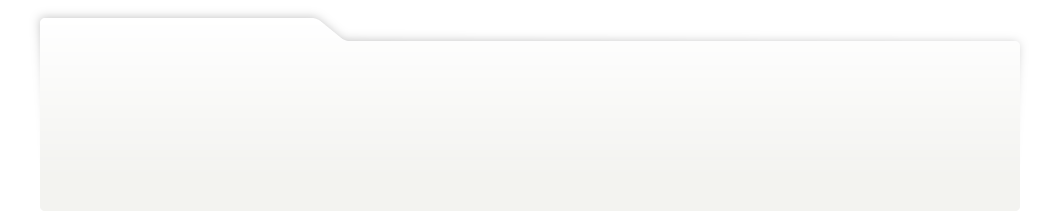
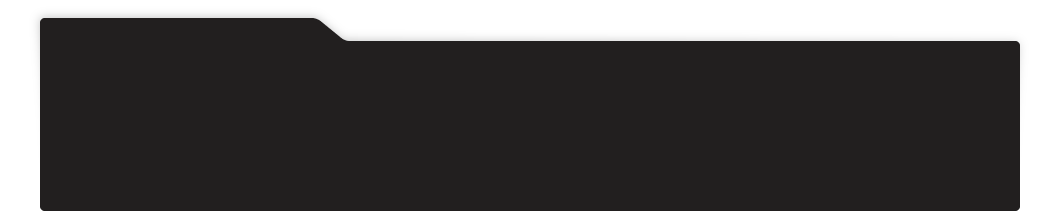
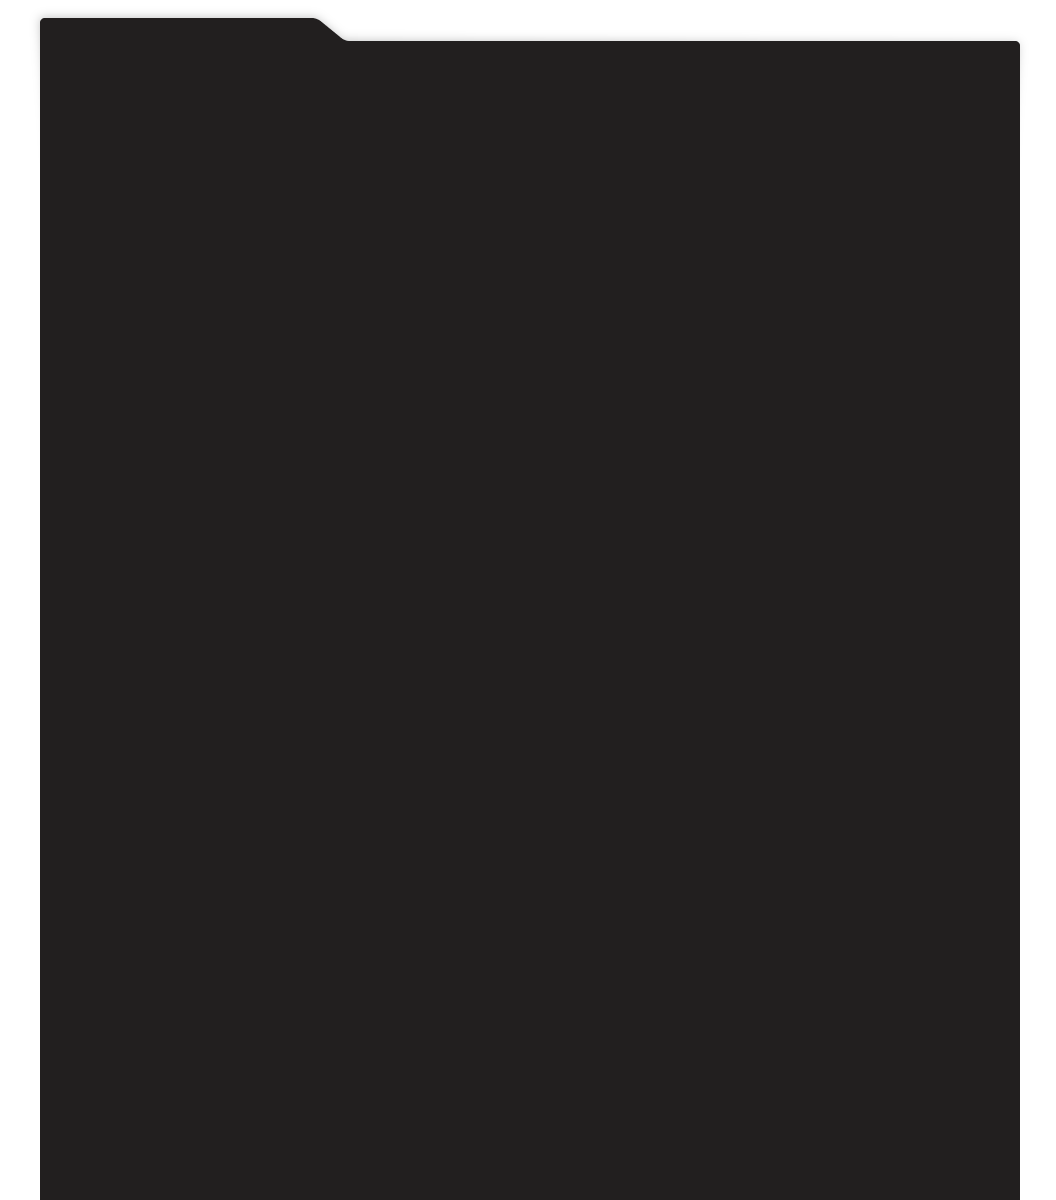
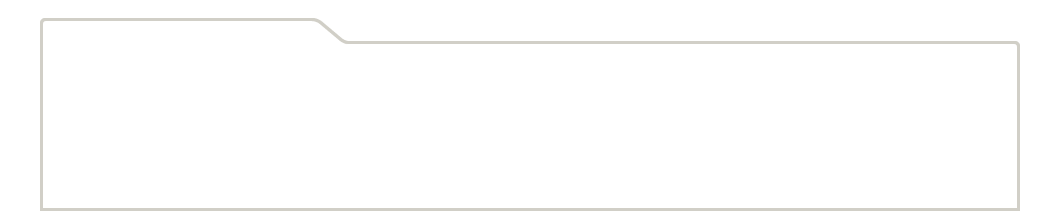
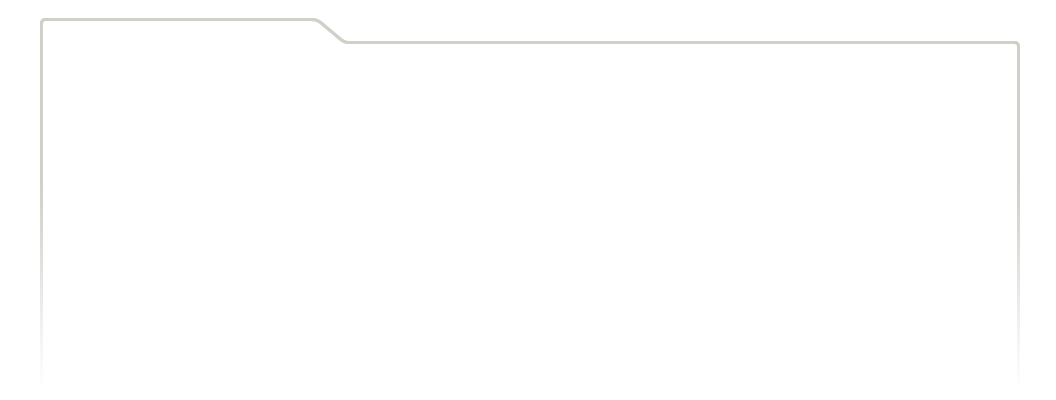
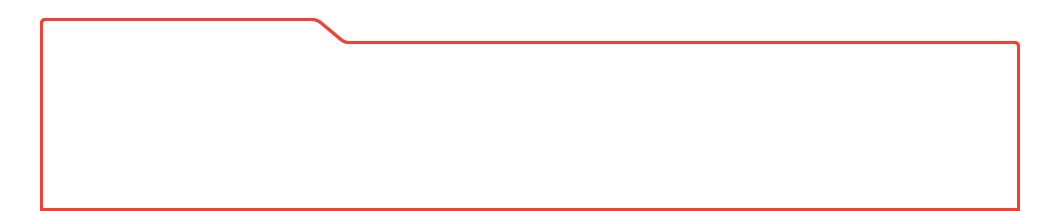
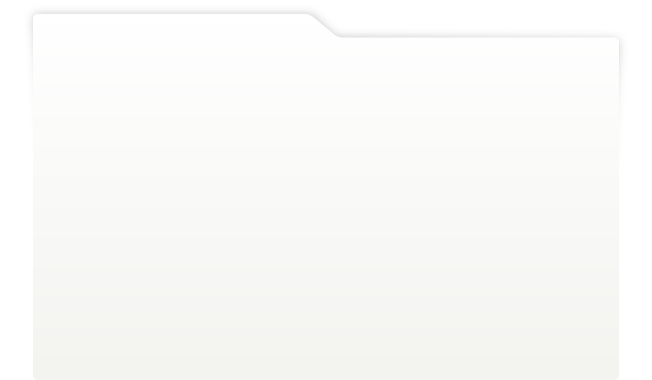
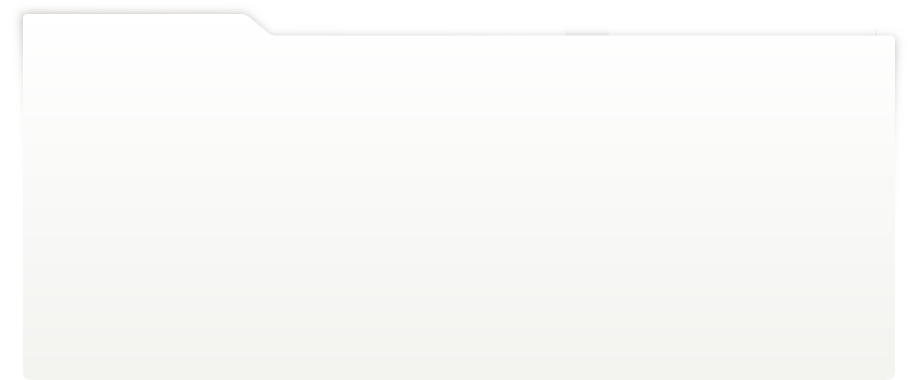
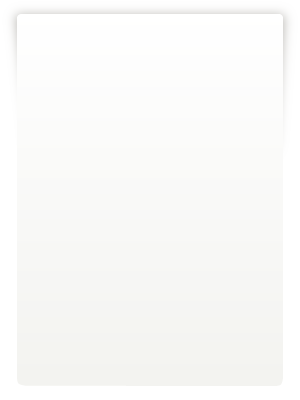
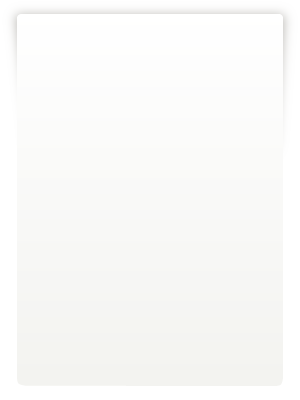
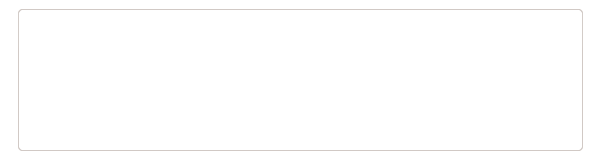
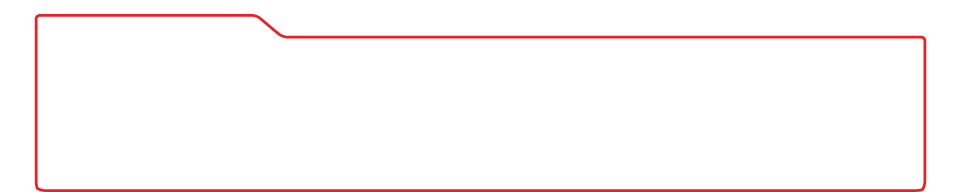
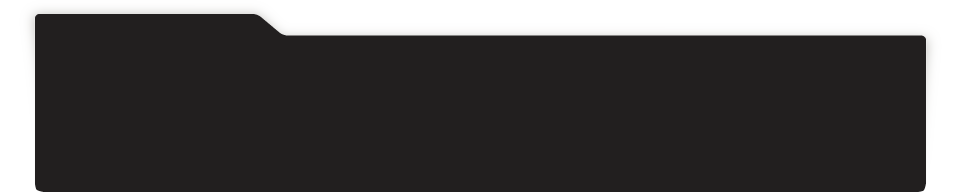
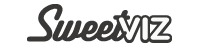
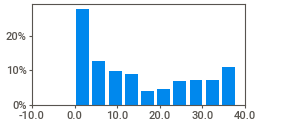
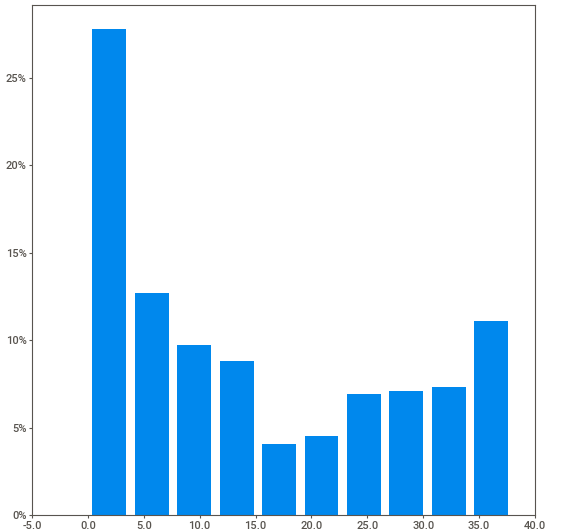
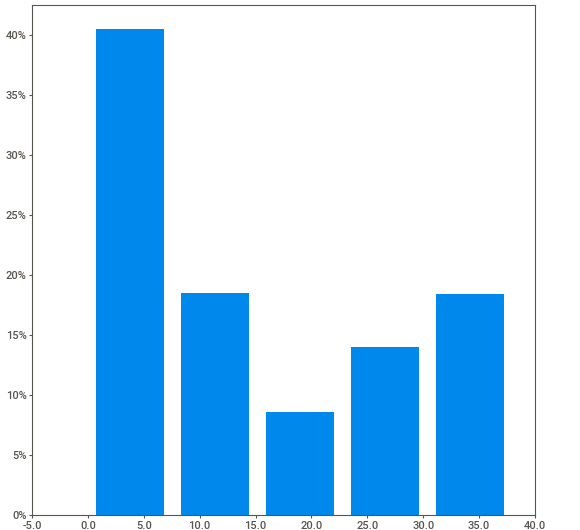
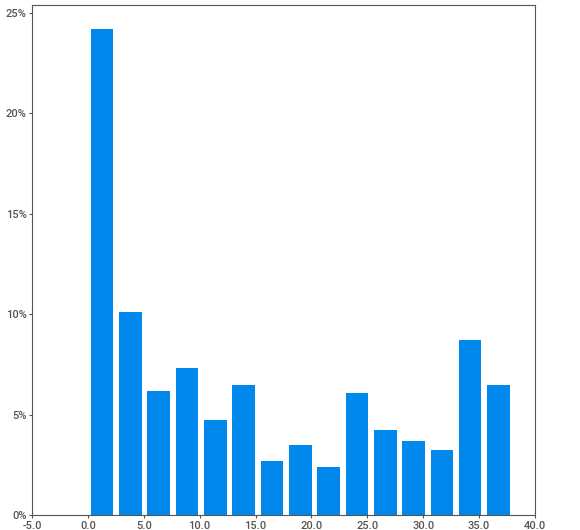
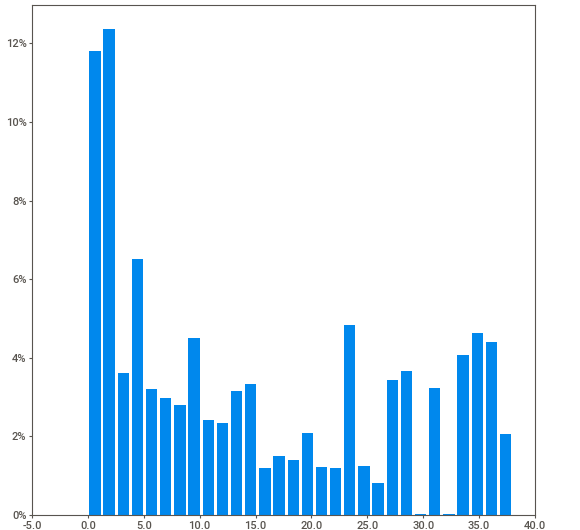
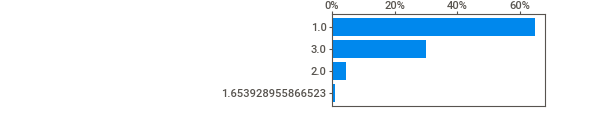
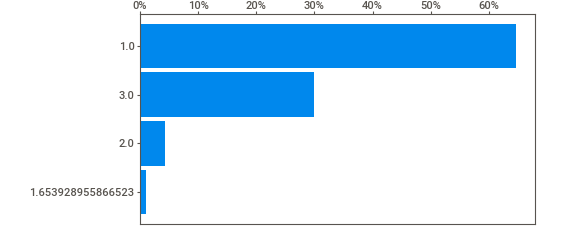
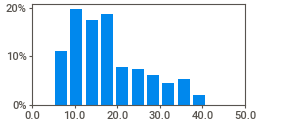
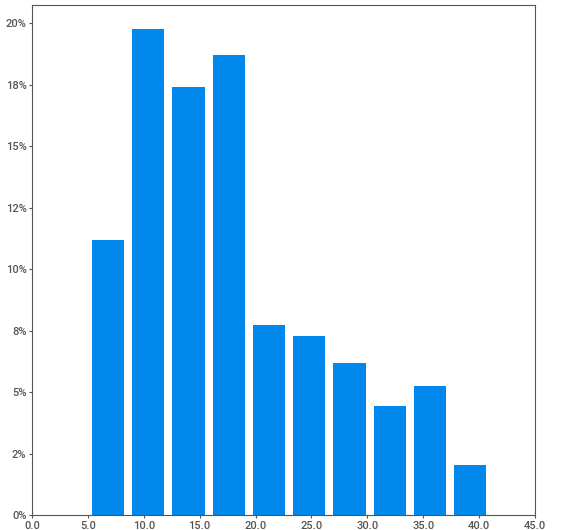
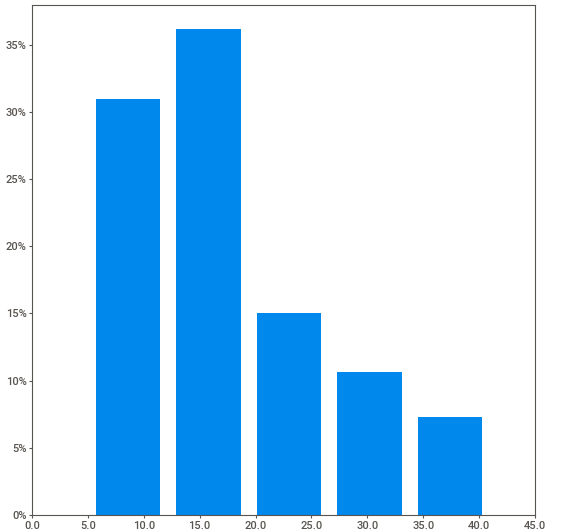
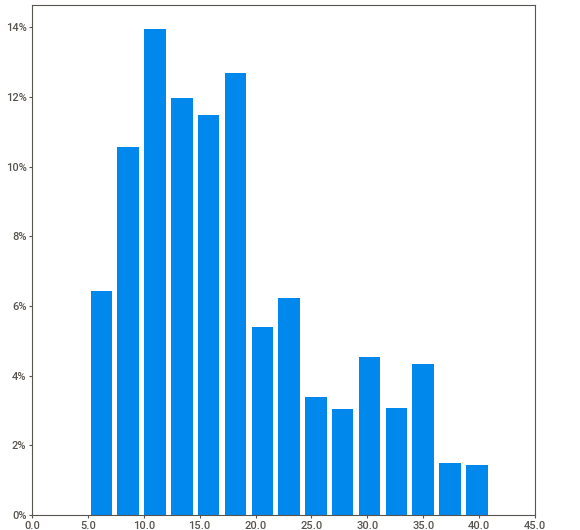
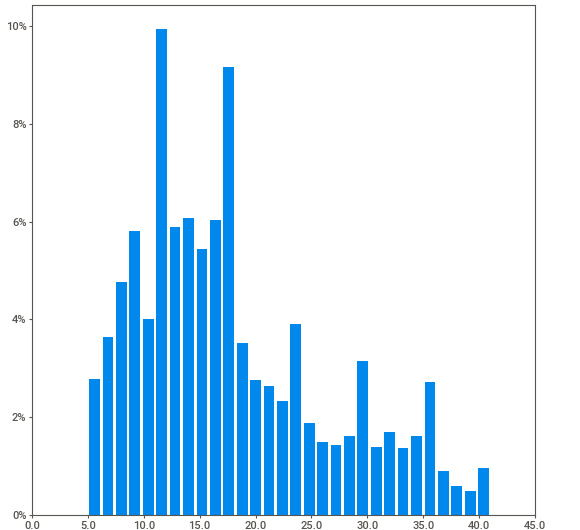
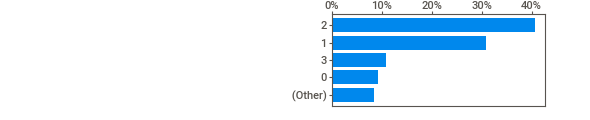
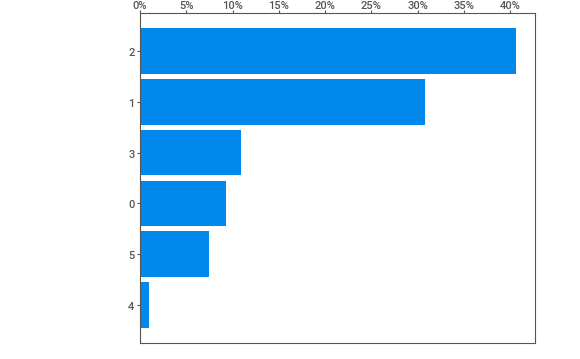
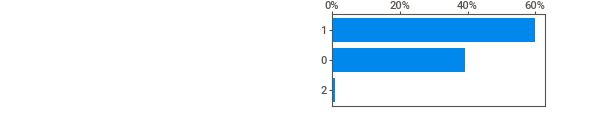
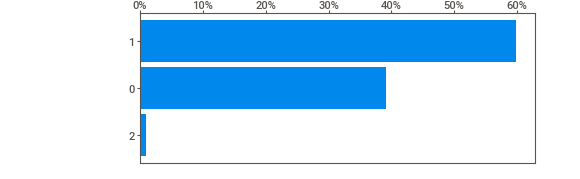
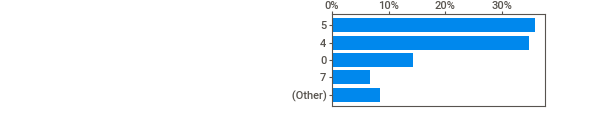
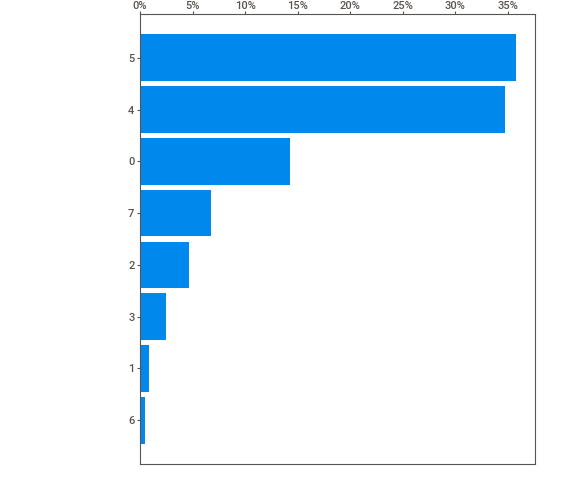
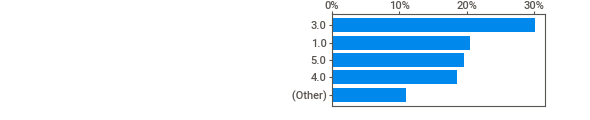
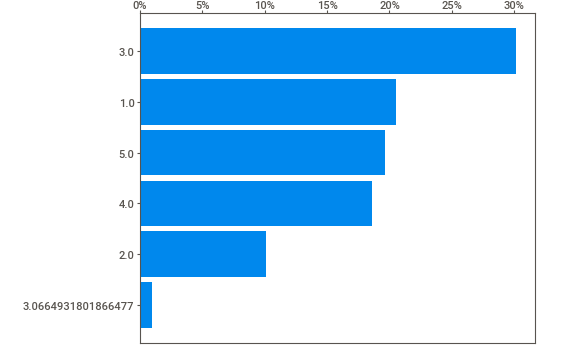
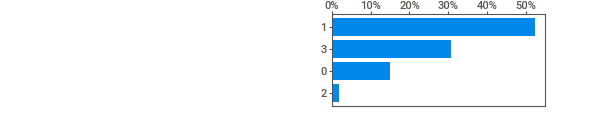
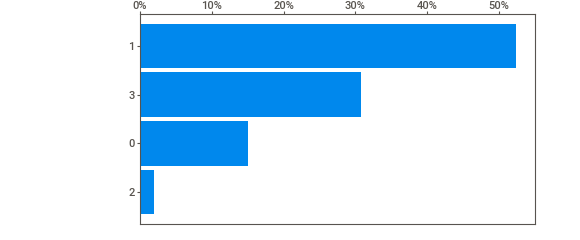
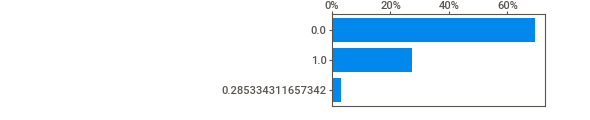
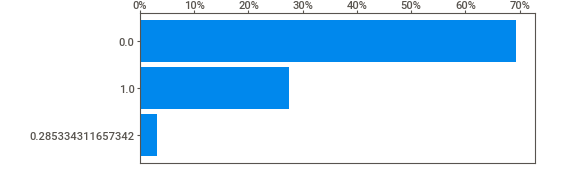
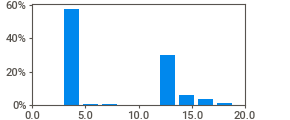
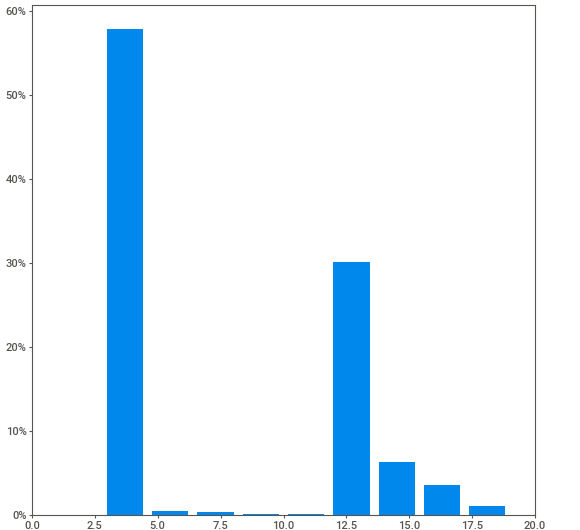
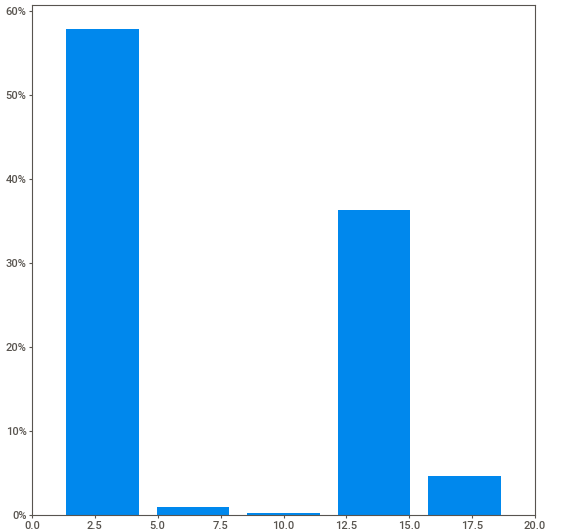
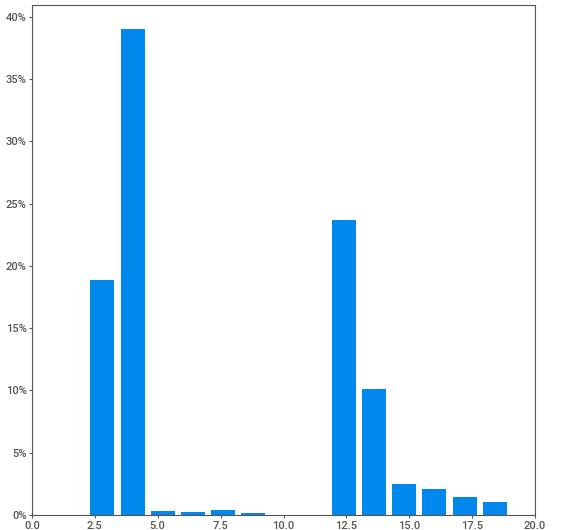
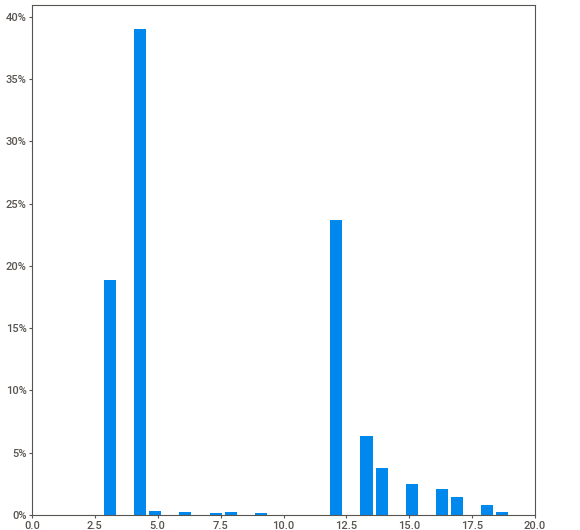
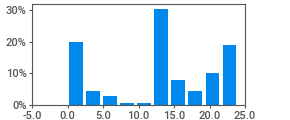
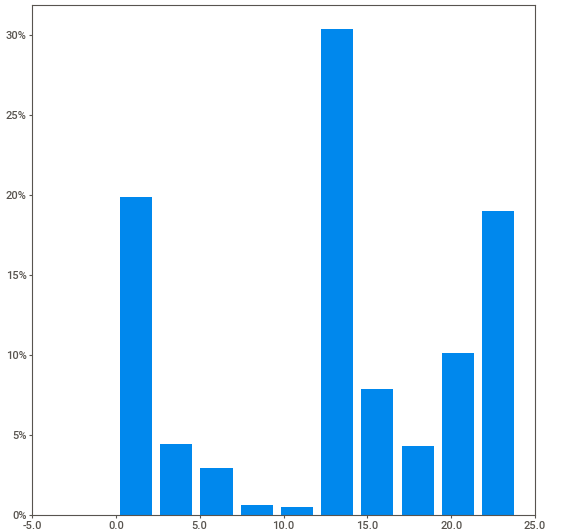
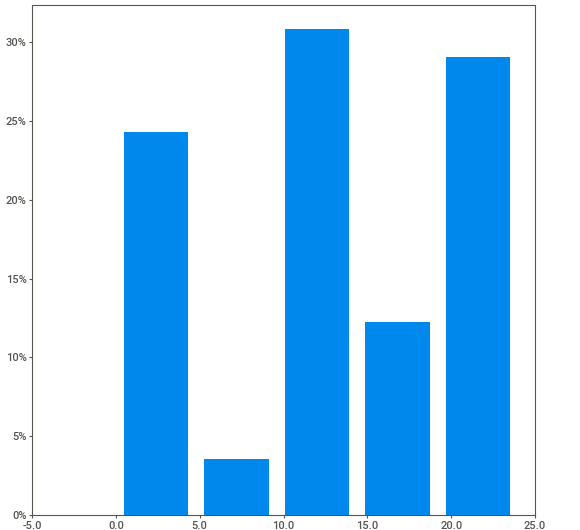
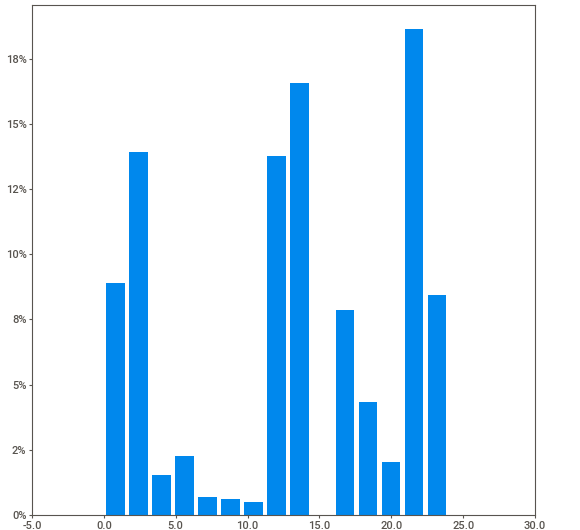
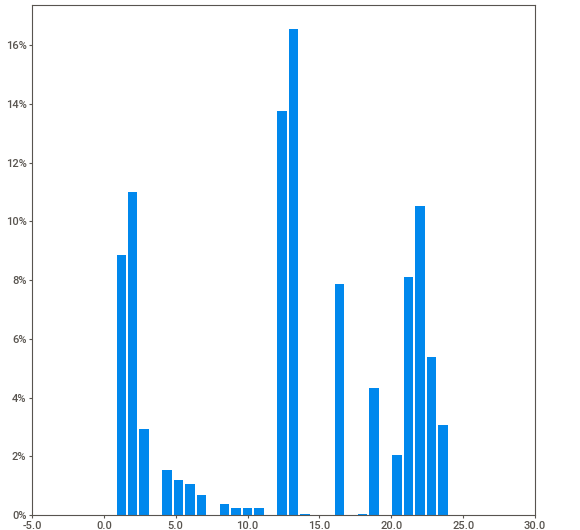
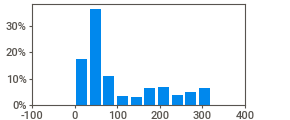
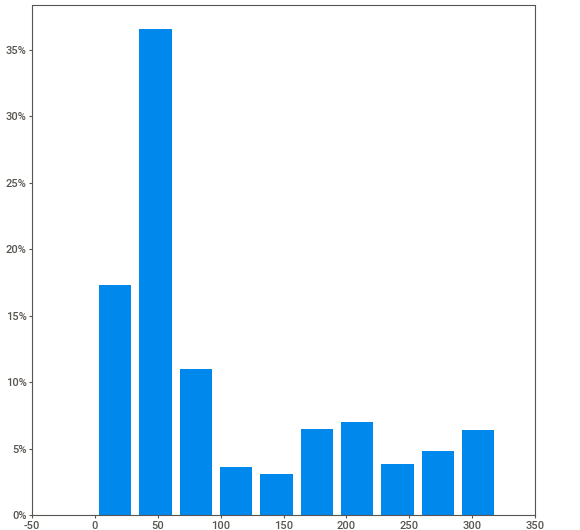
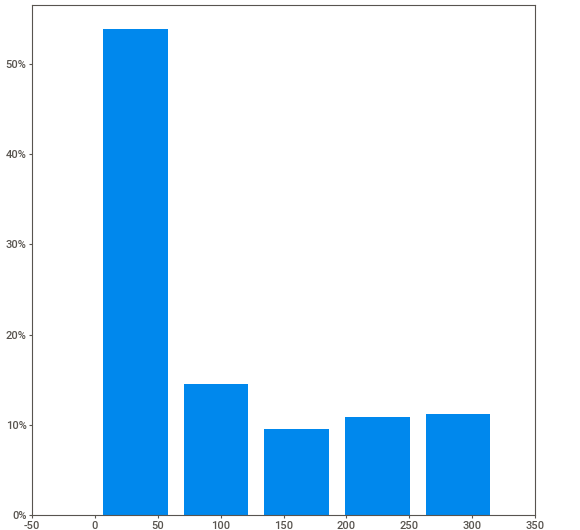
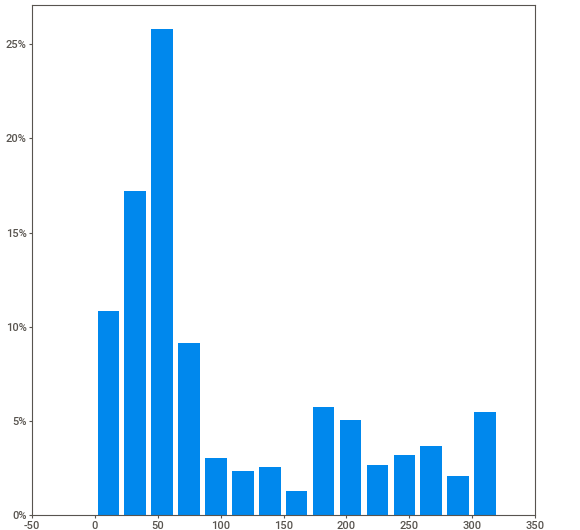
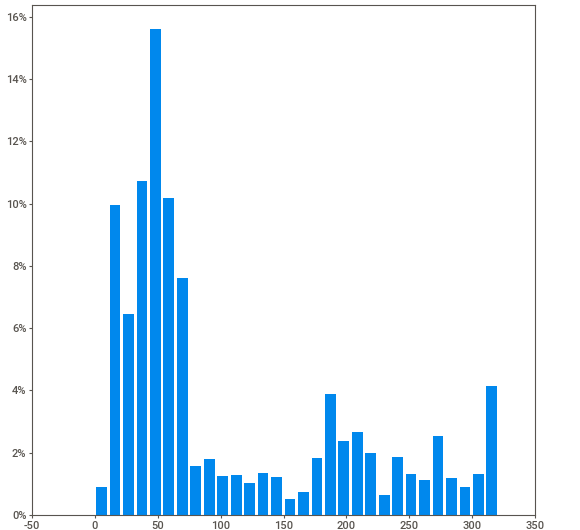
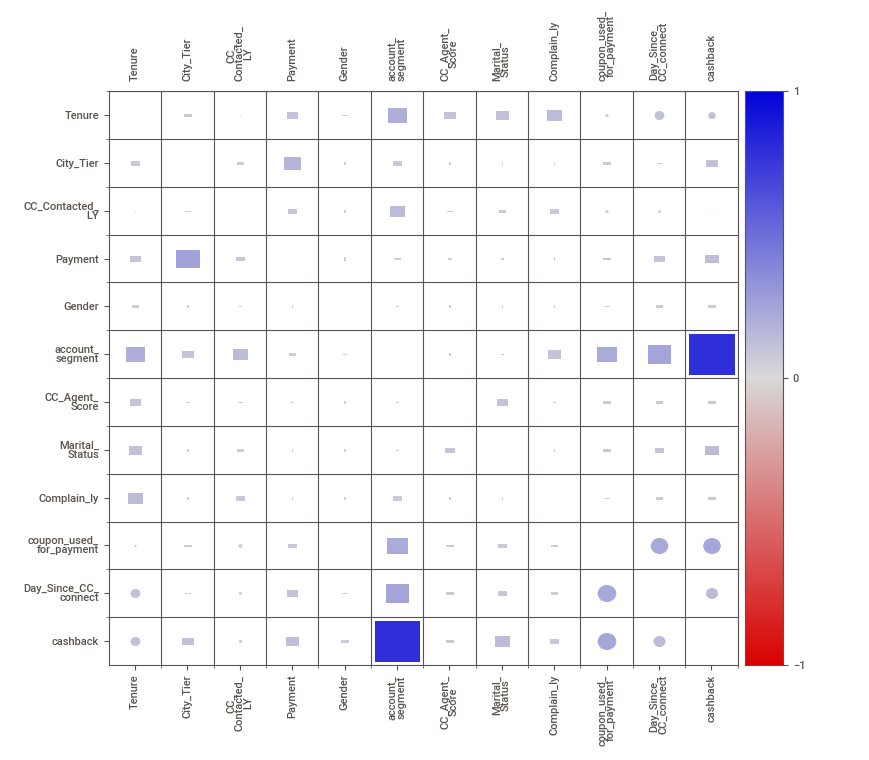
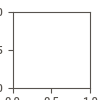

Report 'C:/Users/Avijit Chakraborty/Documents/Python Programming/GL - Python Collections/Capstone Project/EDA_sweetviz_finaldata.html' was saved to storage.


In [33]:
import sweetviz as sv
eda_report_2 = sv.analyze(X_train)
#eda_report.show_html('EDA_sweetviz.html')
eda_report_2.show_notebook(w=None, h=None,scale=None,layout='vertical',
filepath='C:/Users/Avijit Chakraborty/Documents/Python Programming/GL - Python Collections/Capstone Project/EDA_sweetviz_finaldata.html')

                                             |                                             | [  0%]   00:00 ->…


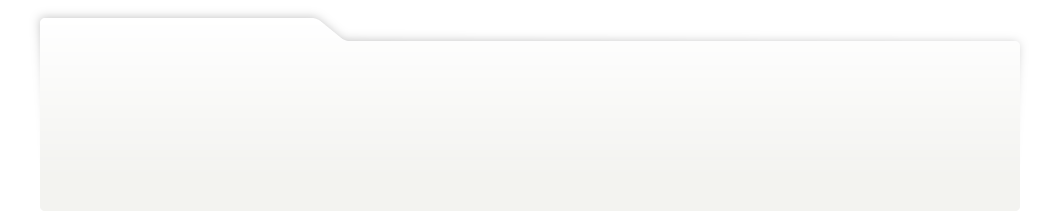
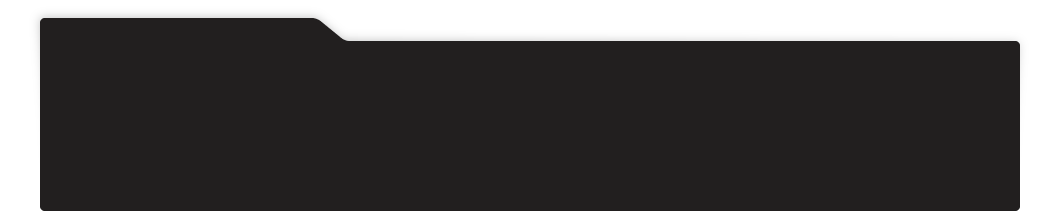
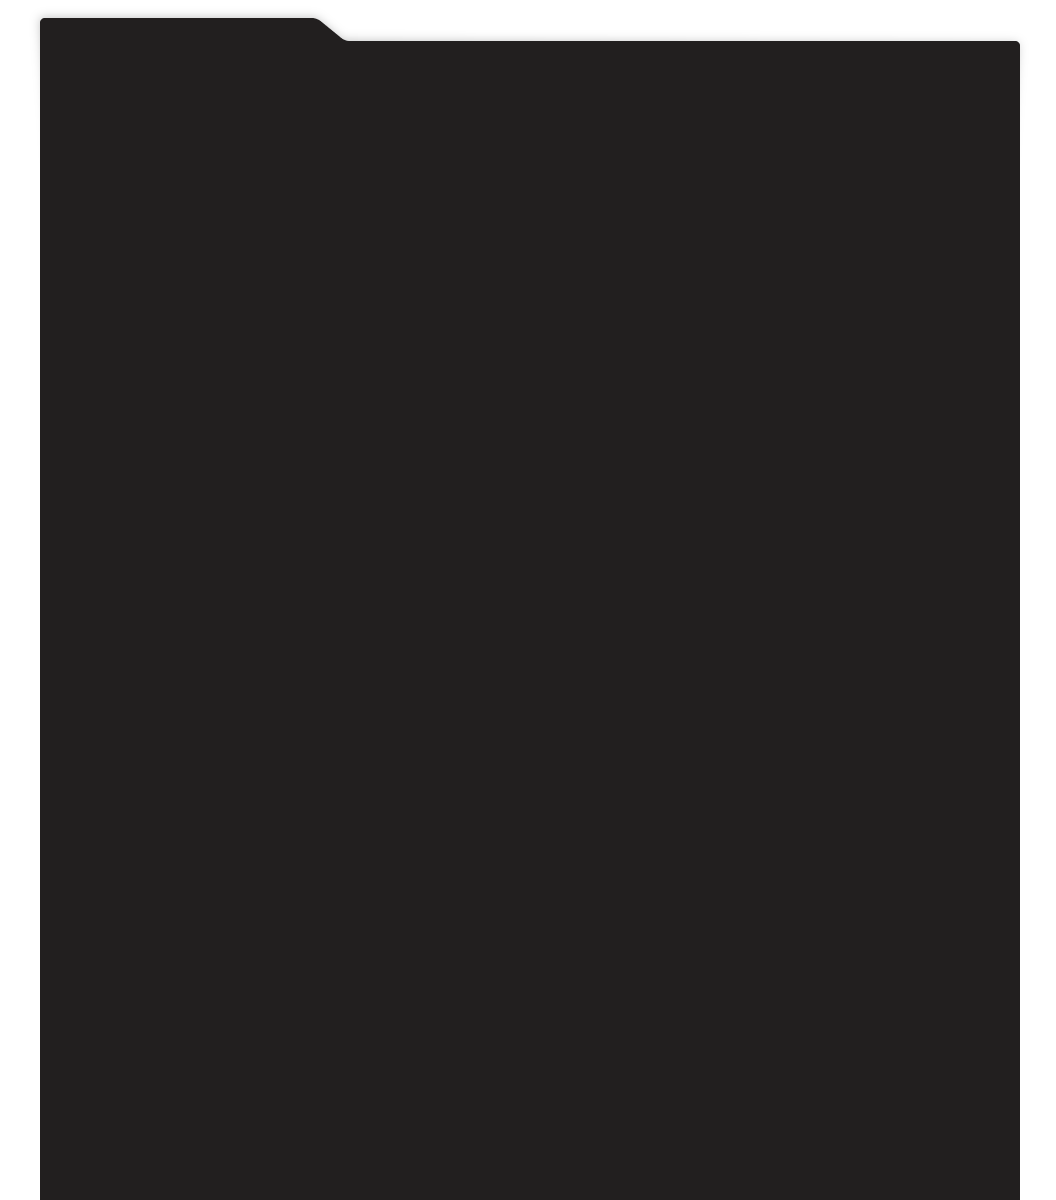
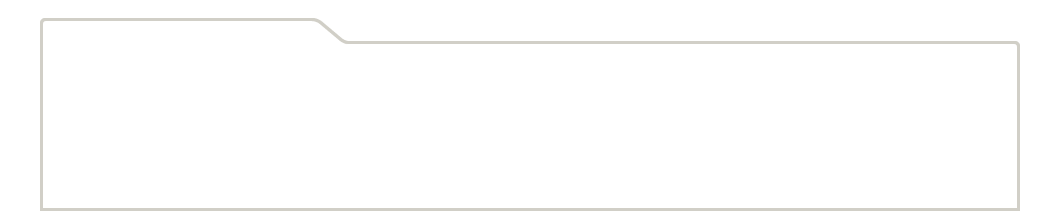
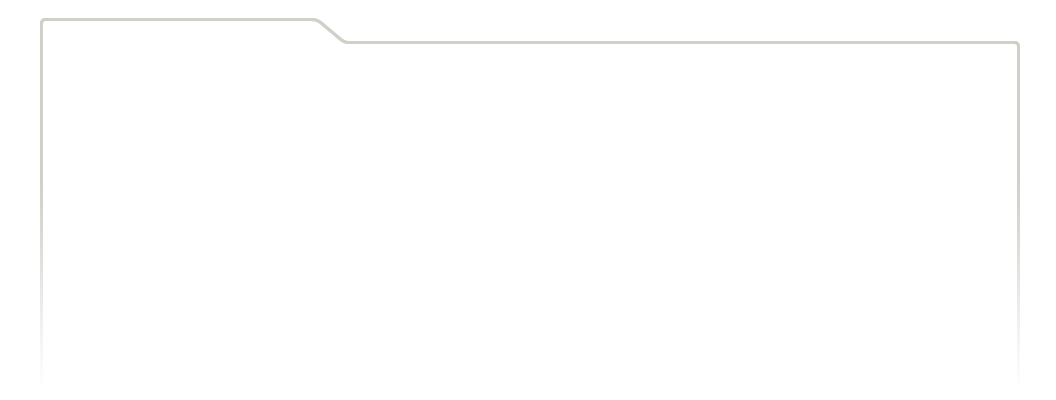
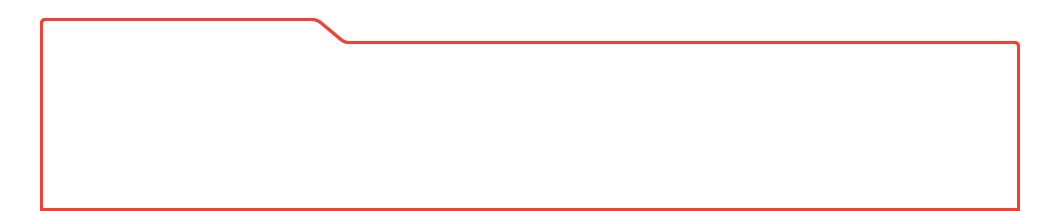
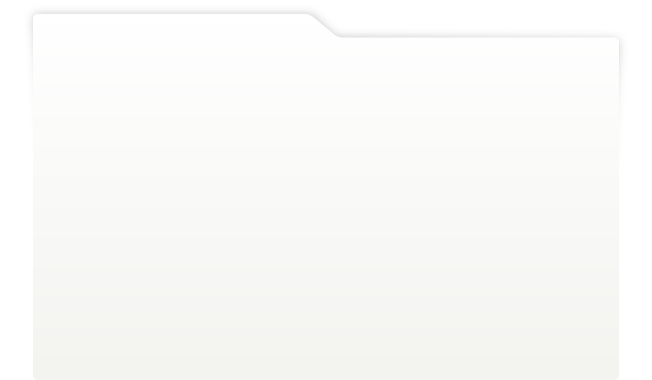
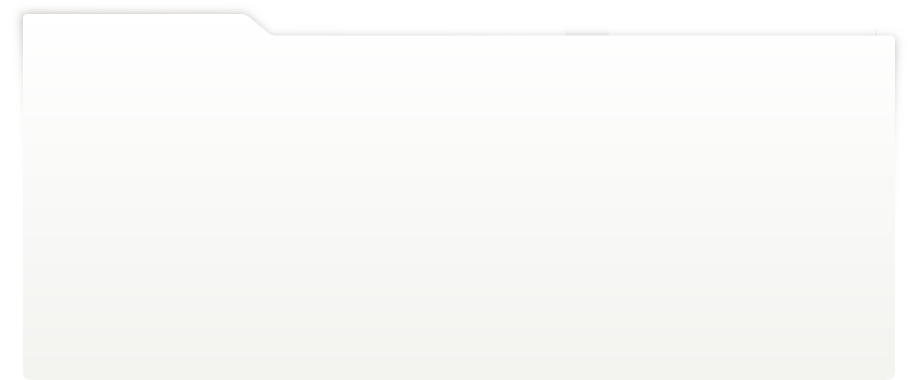
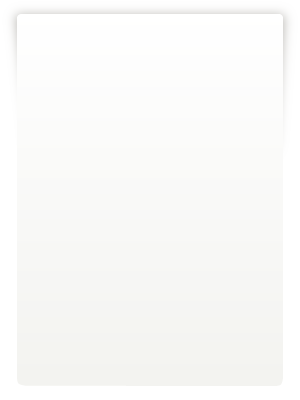
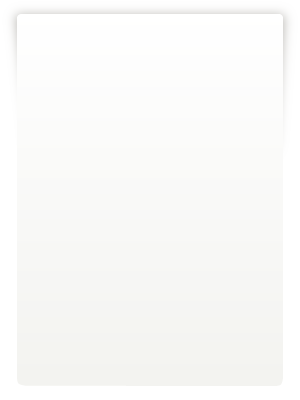
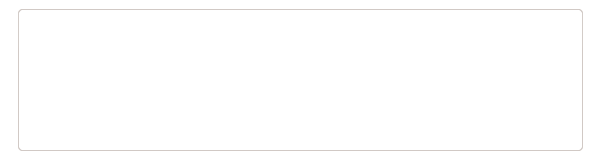
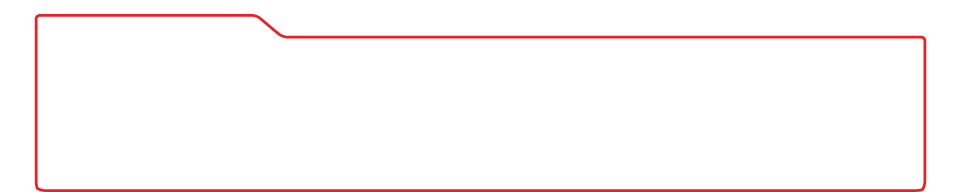
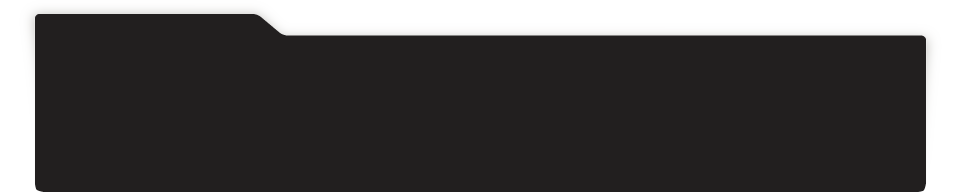
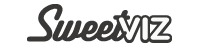
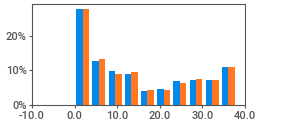
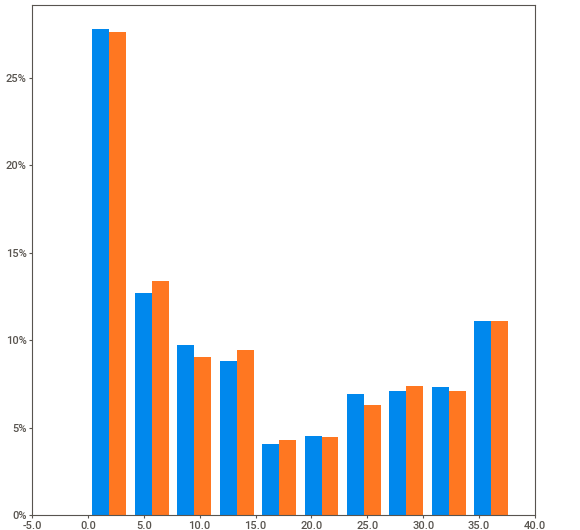
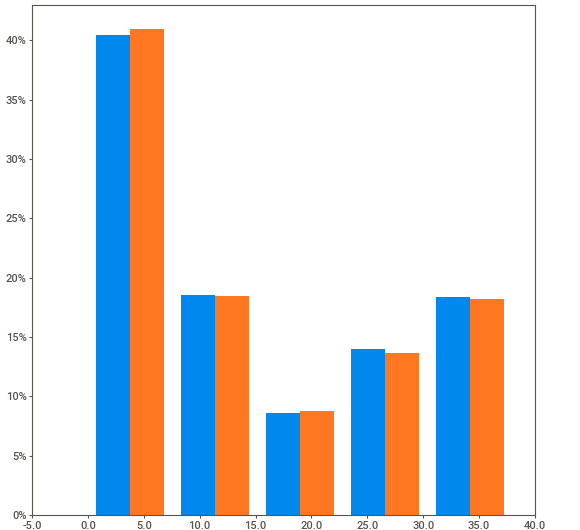
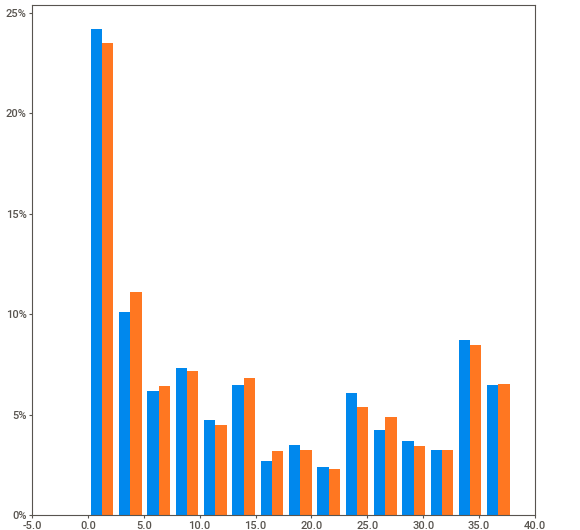
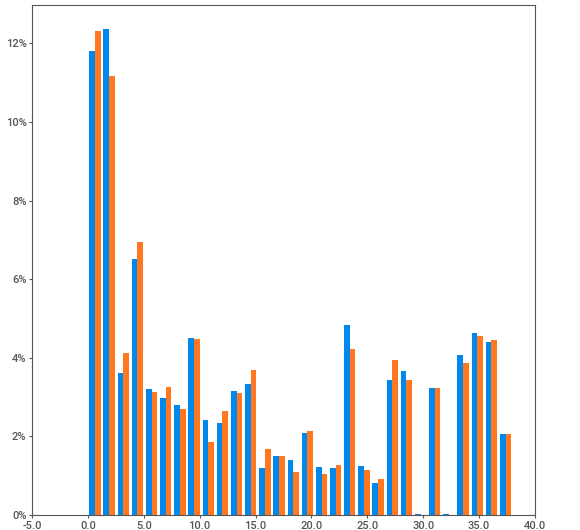
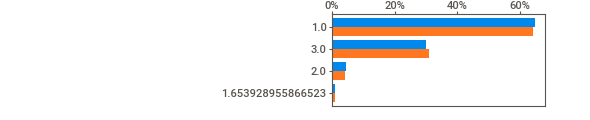
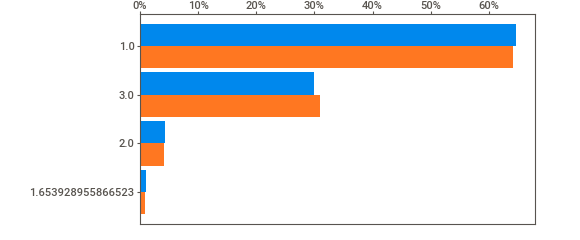
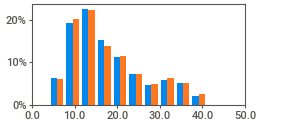
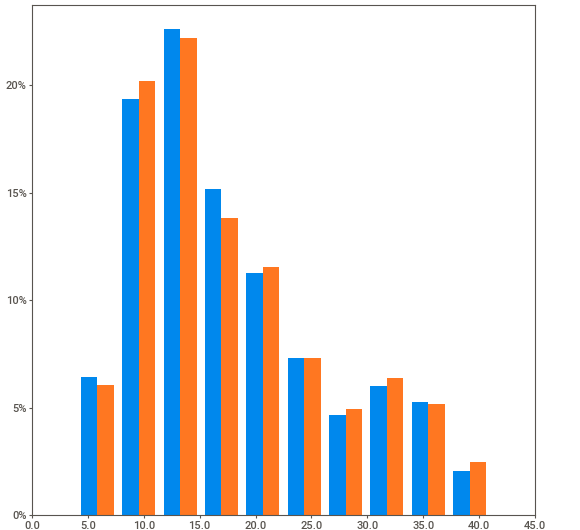
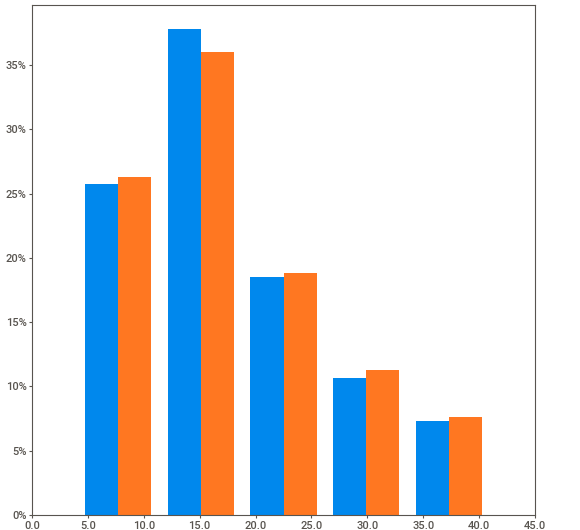
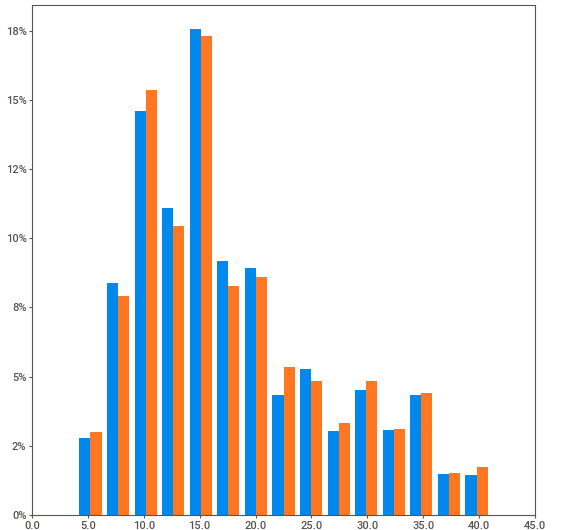
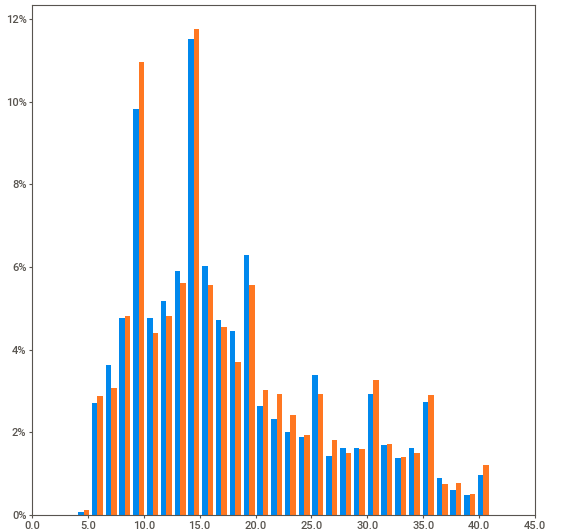
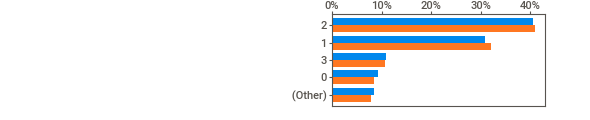
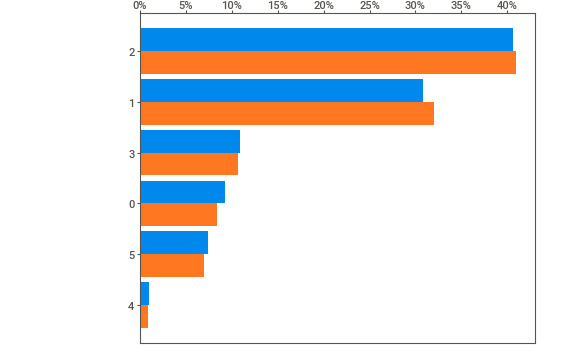
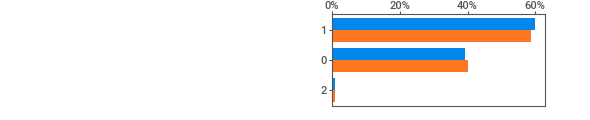
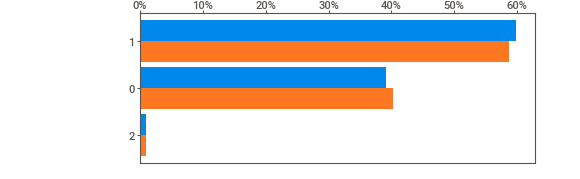
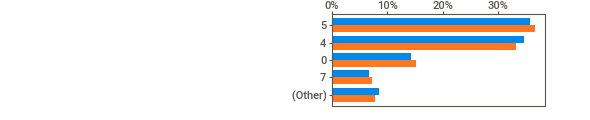
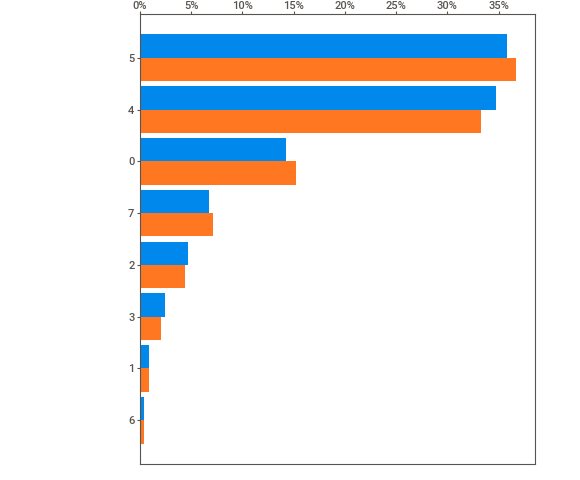
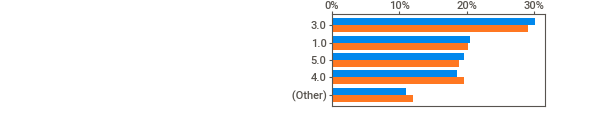
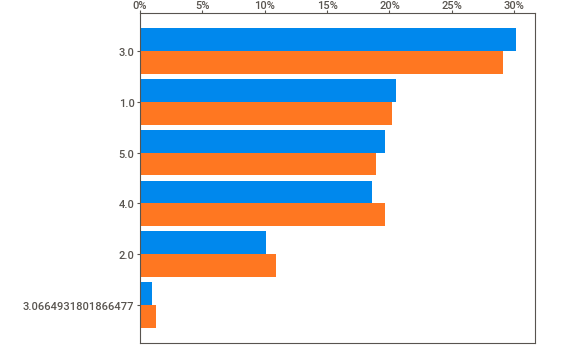
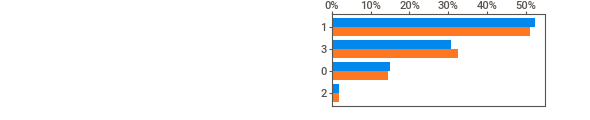
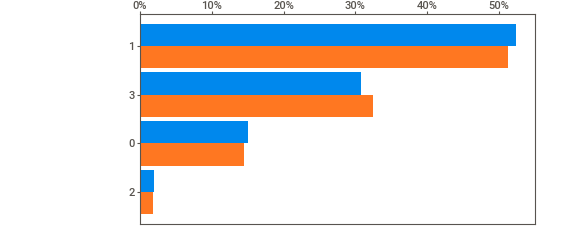
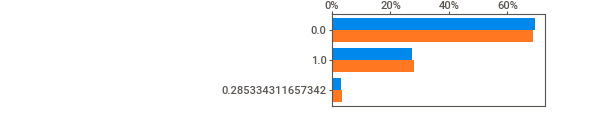
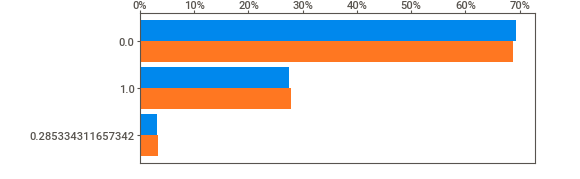
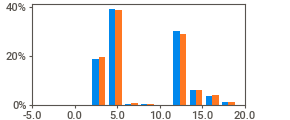
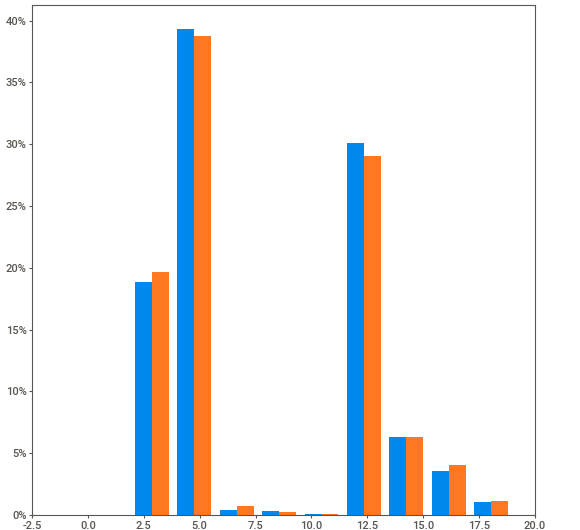
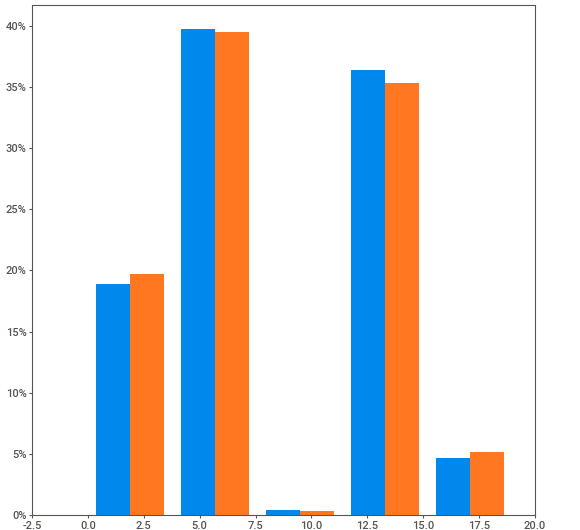
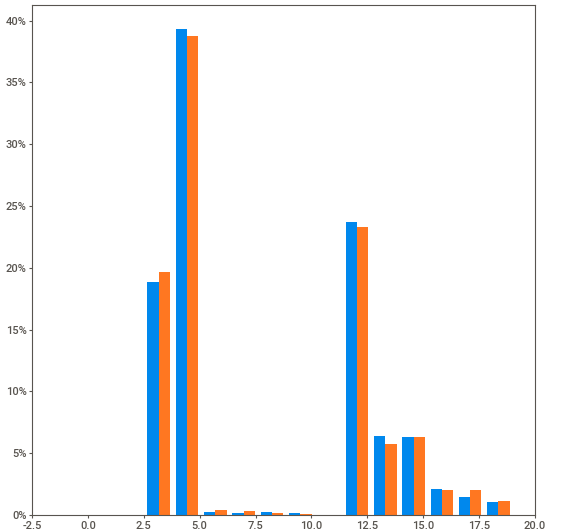
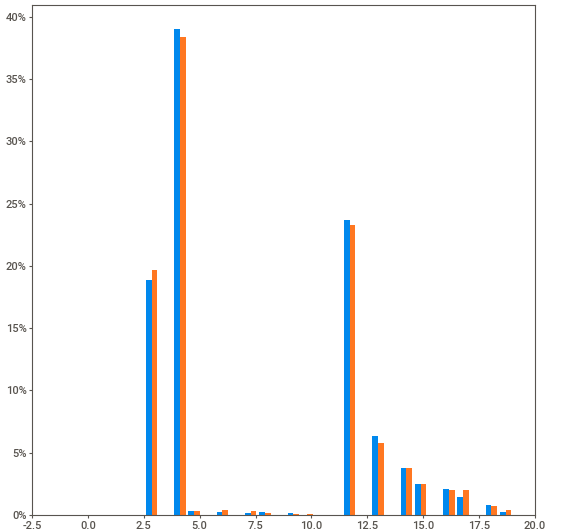
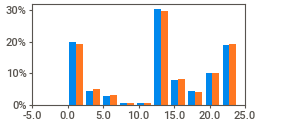
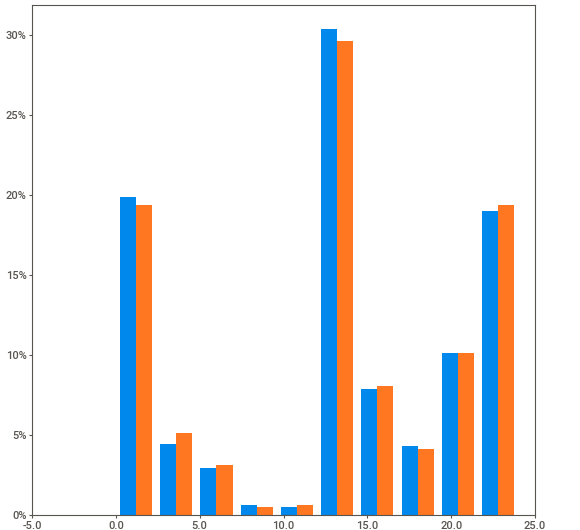
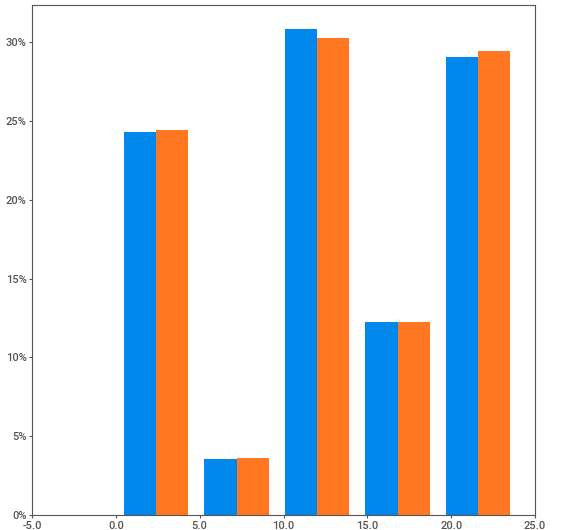
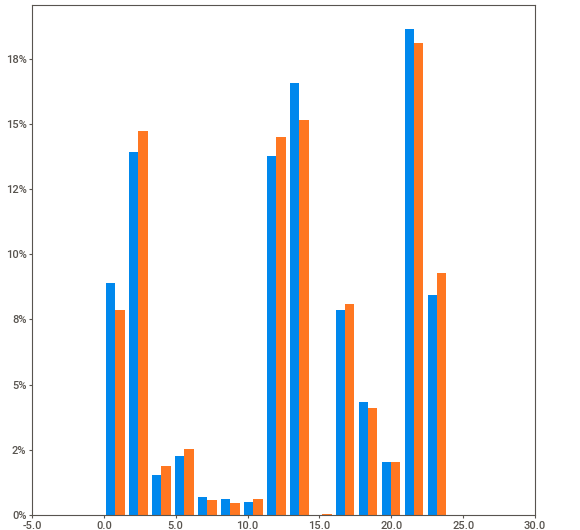
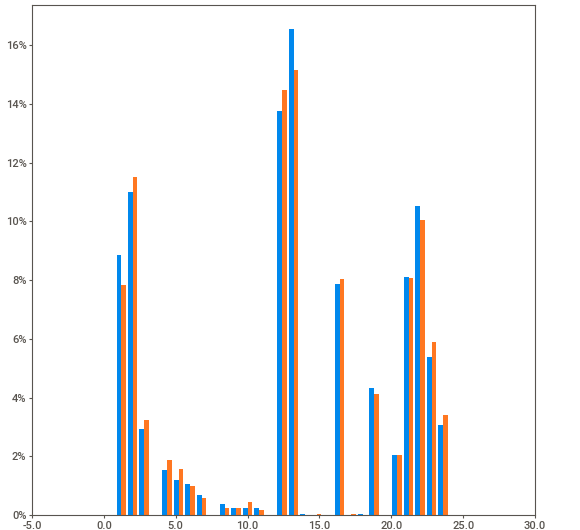
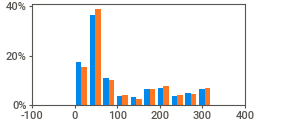
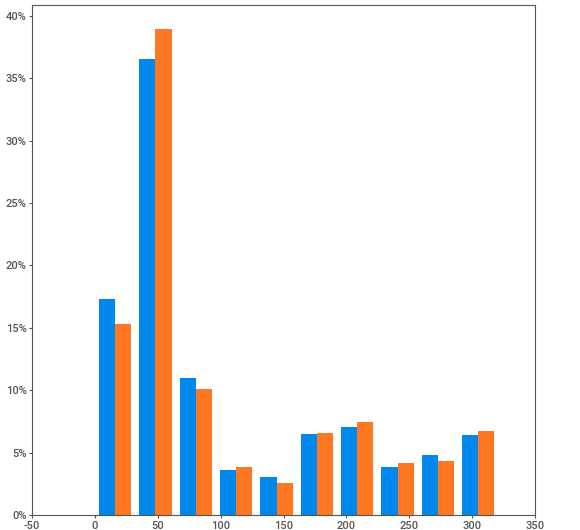
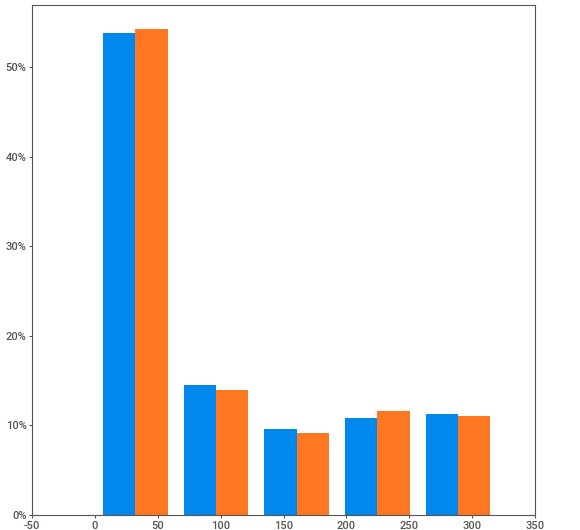
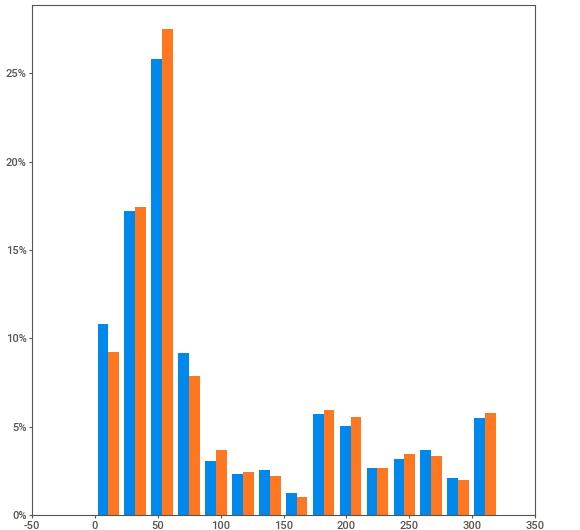
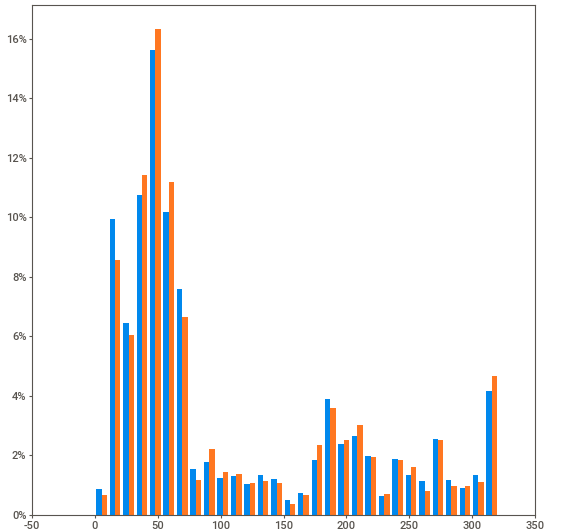
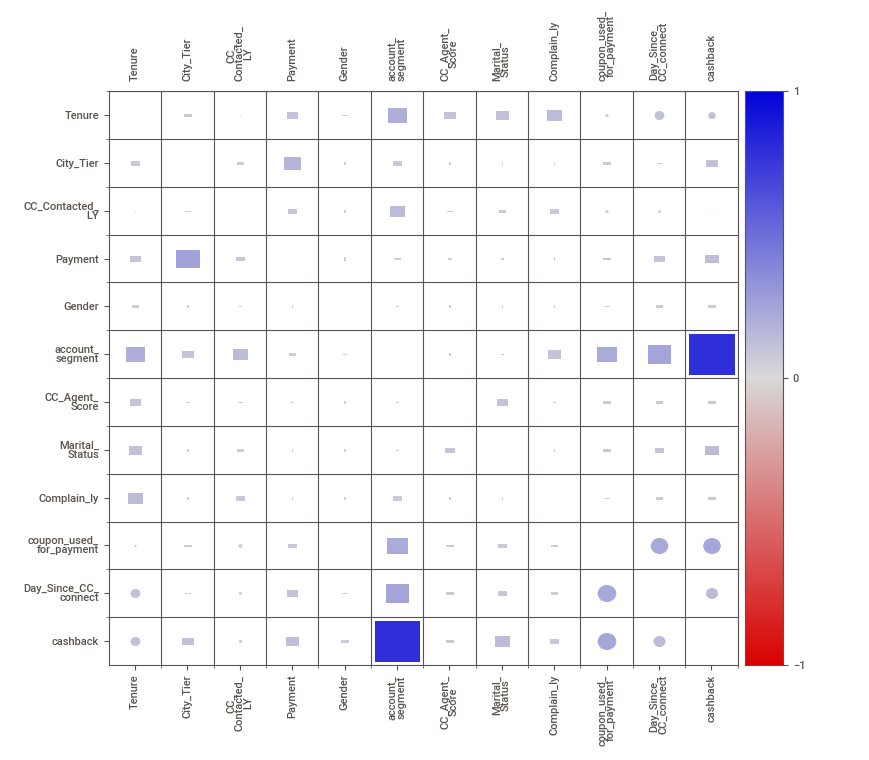
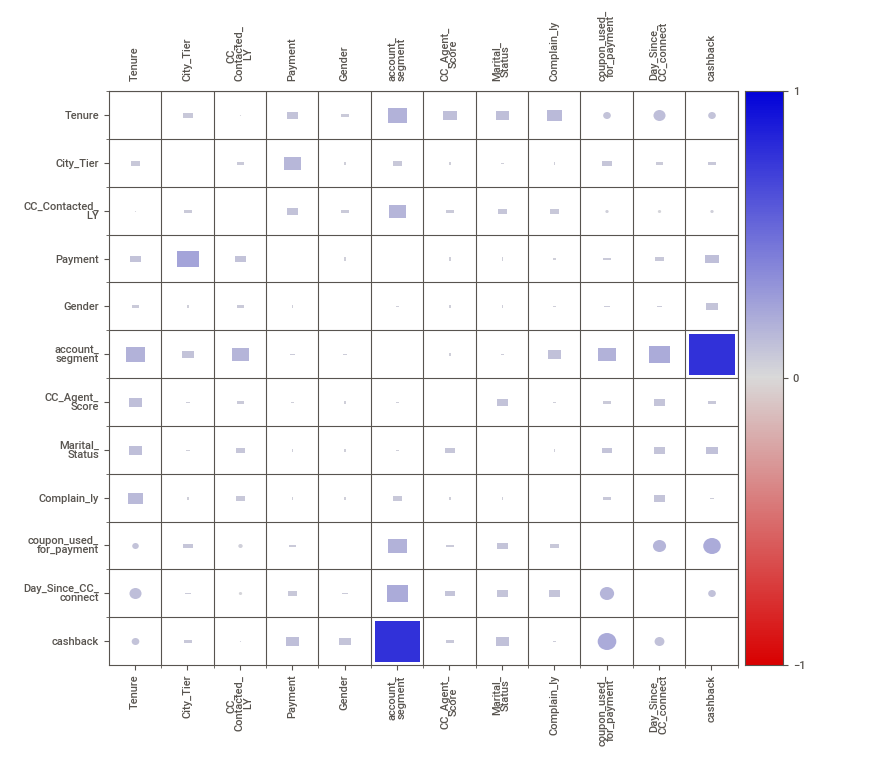

Report 'C:/Users/Avijit Chakraborty/Documents/Python Programming/GL - Python Collections/Capstone Project/Compare_Results_sweetviz.html' was saved to storage.


In [34]:
report_comp=sv.compare([X_train,'Train'],[X_test,'Test']) 
#report_comp.show_html('Compare_Results_sweetviz.html')
report_comp.show_notebook(w=None, h=None,
scale=None,
layout='vertical',
filepath='C:/Users/Avijit Chakraborty/Documents/Python Programming/GL - Python Collections/Capstone Project/Compare_Results_sweetviz.html')

##### Type-2

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (11260, 19)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  8
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  4
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0

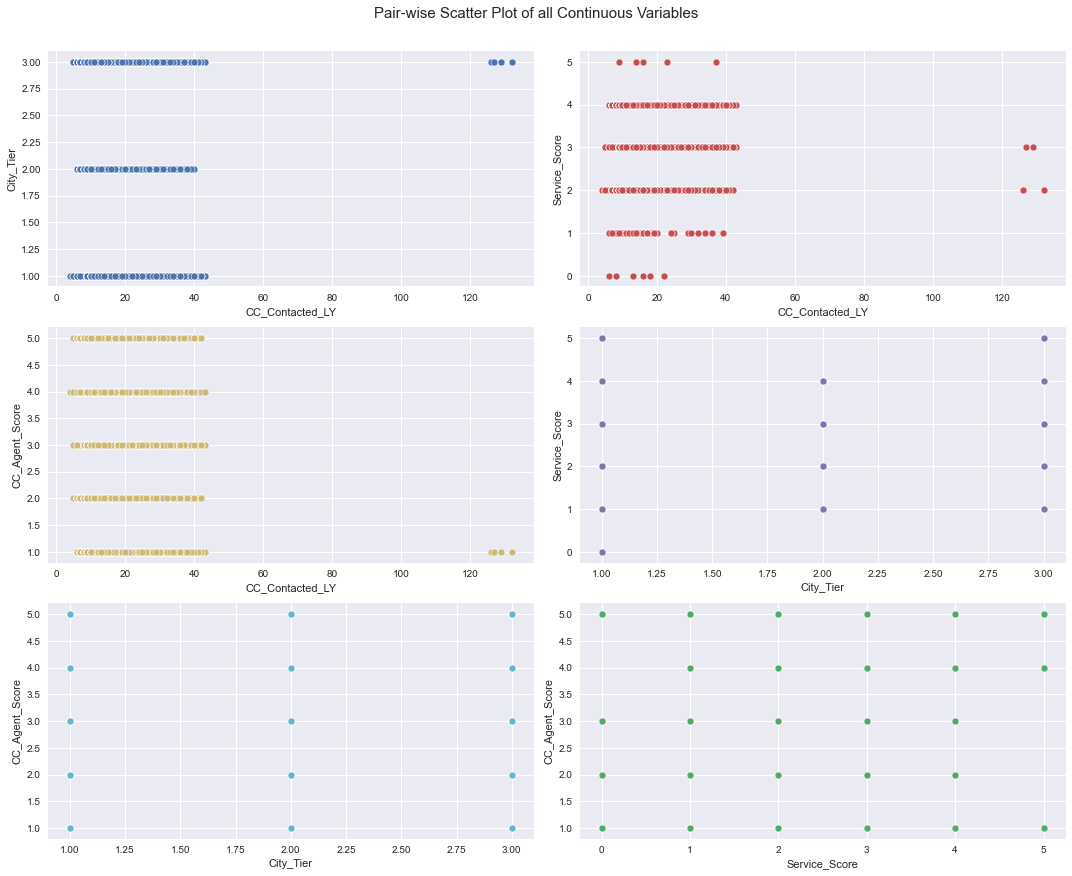

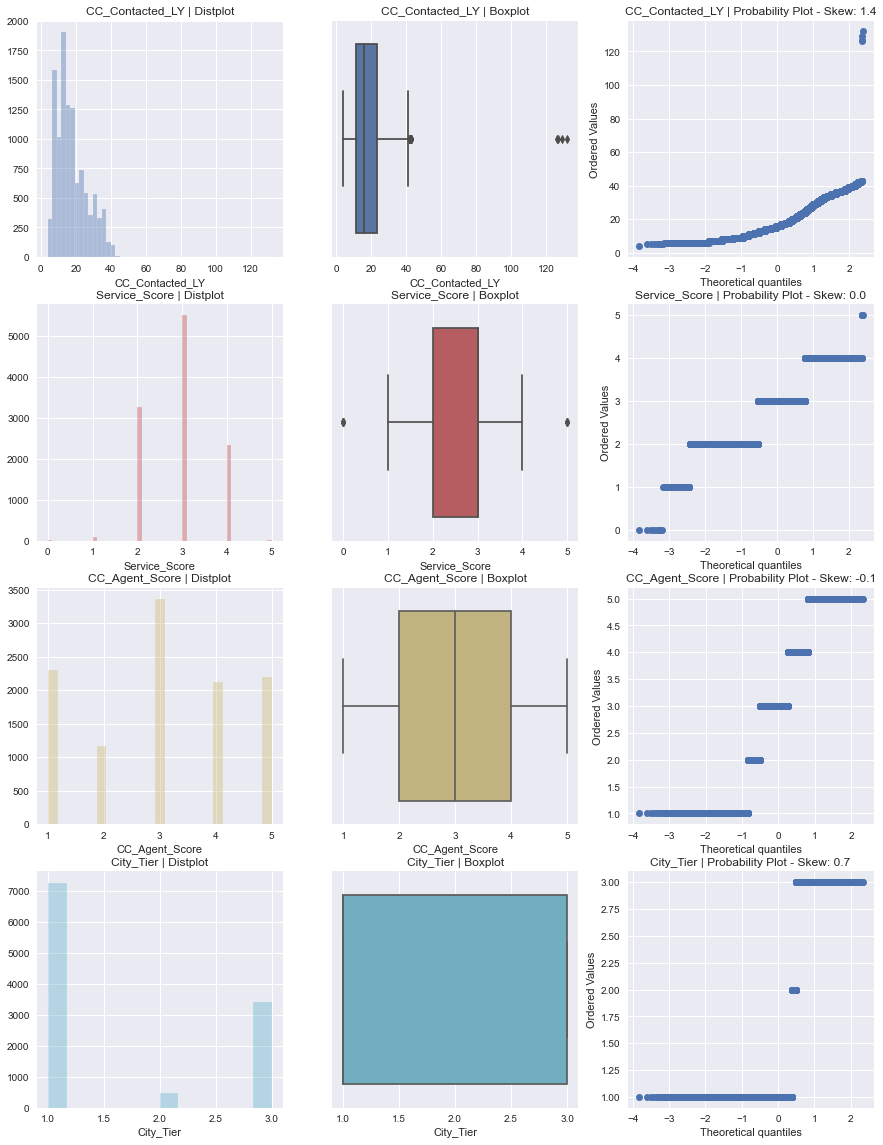

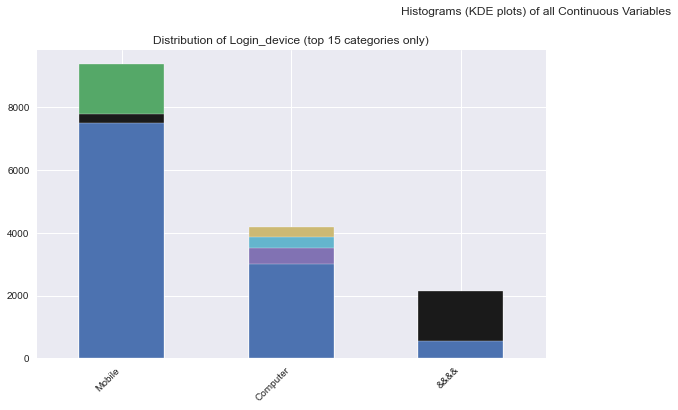

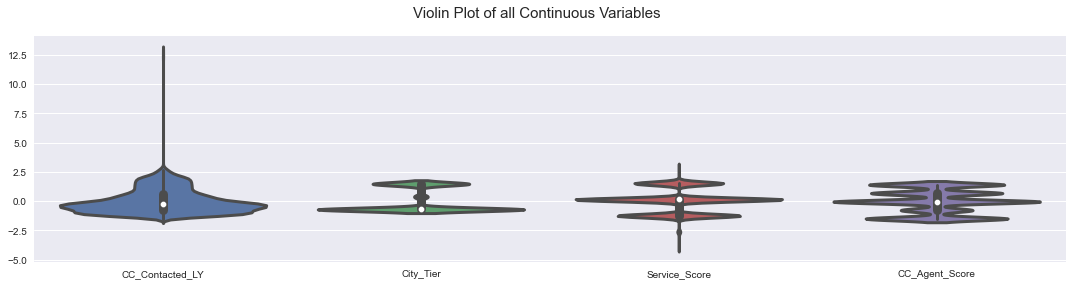

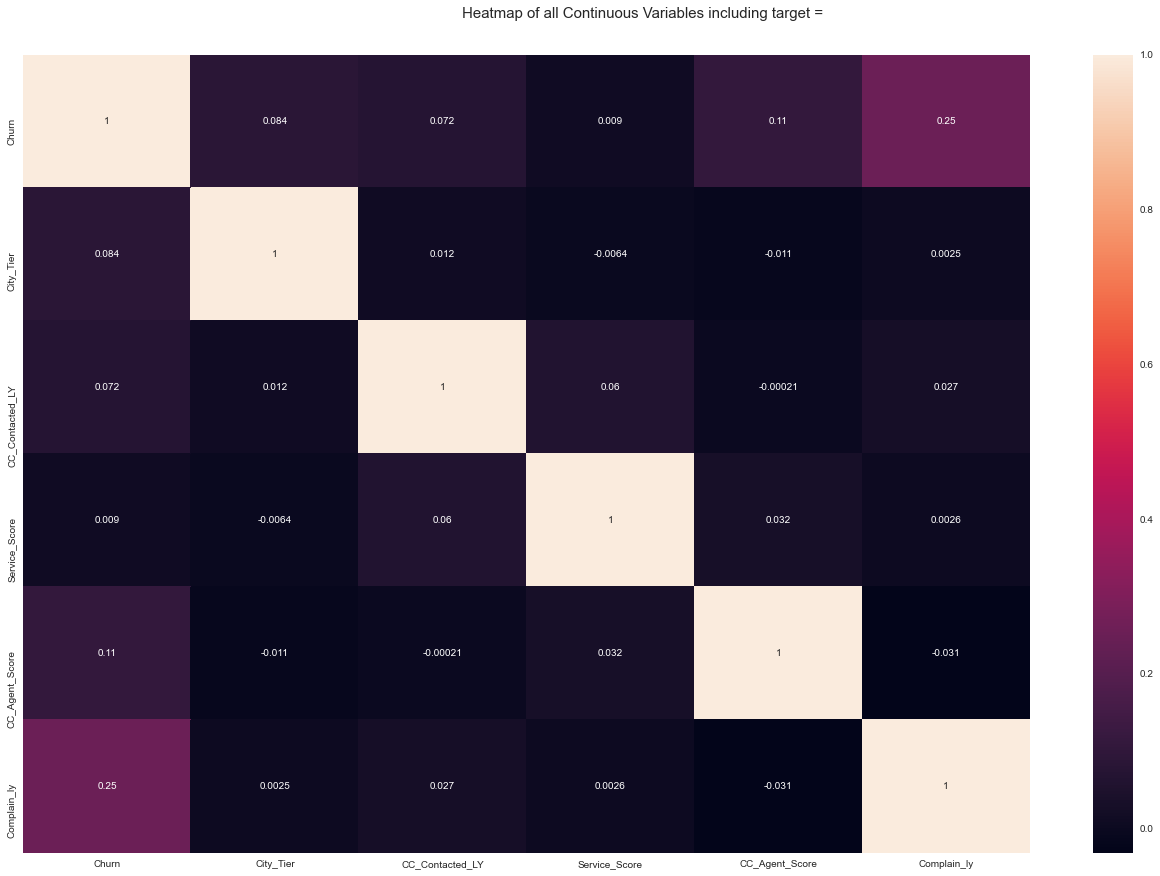

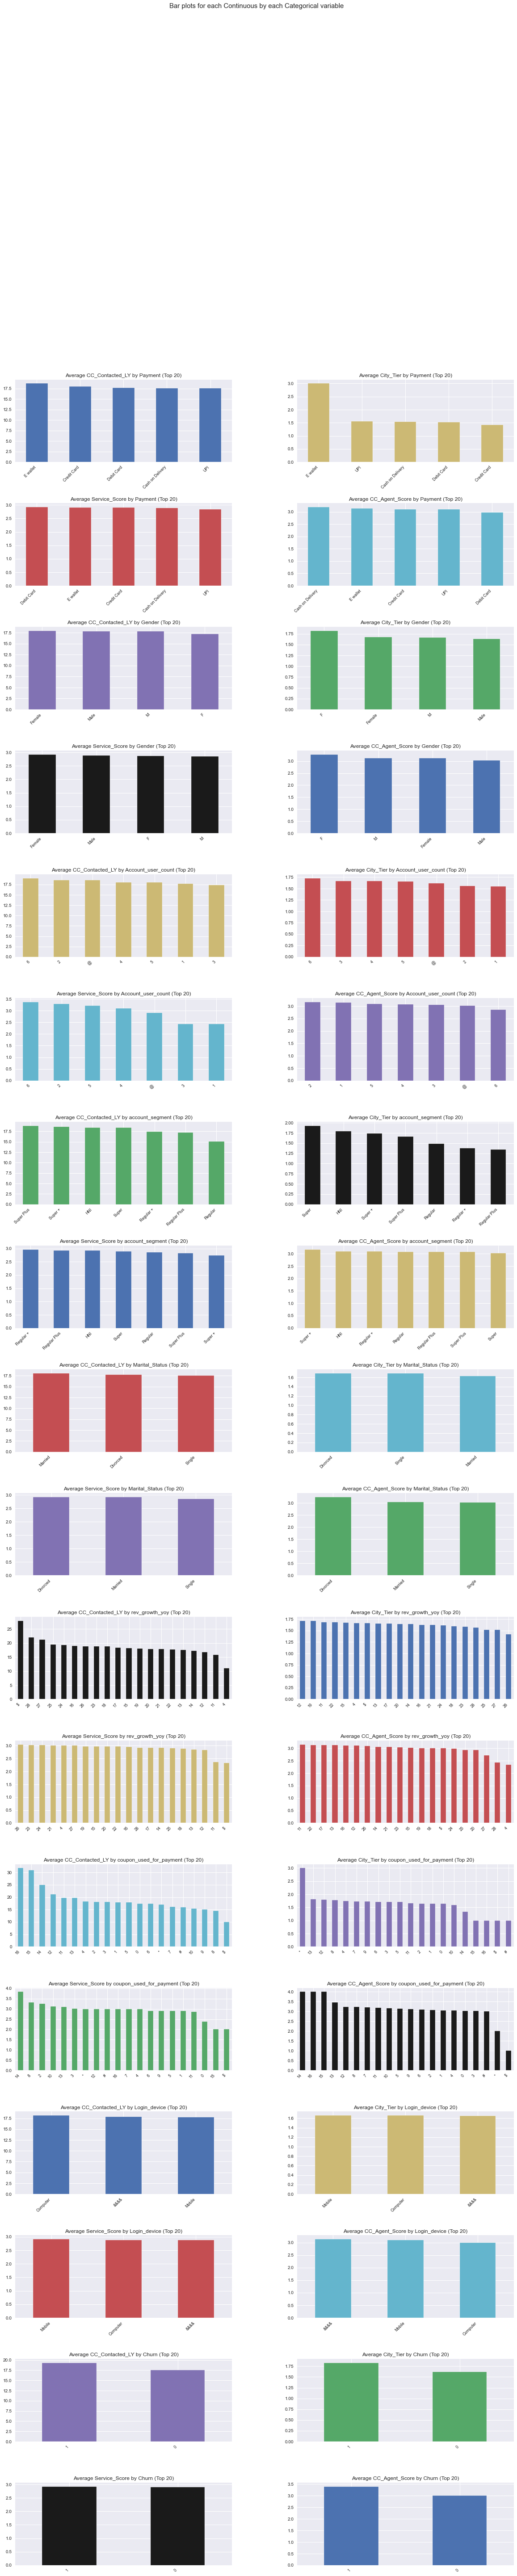

Time to run AutoViz (in seconds) = 35.821

 ###################### VISUALIZATION Completed ########################


In [35]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
filename = "C:/Users/Avijit Chakraborty/Documents/Python Programming/GL - Python Collections/Capstone Project/Customer Churn Data.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

### Univariate Analysis Diagram (based on significant features)

    - It can shows the variability and distribution of the values of each features with respect to the timelines.

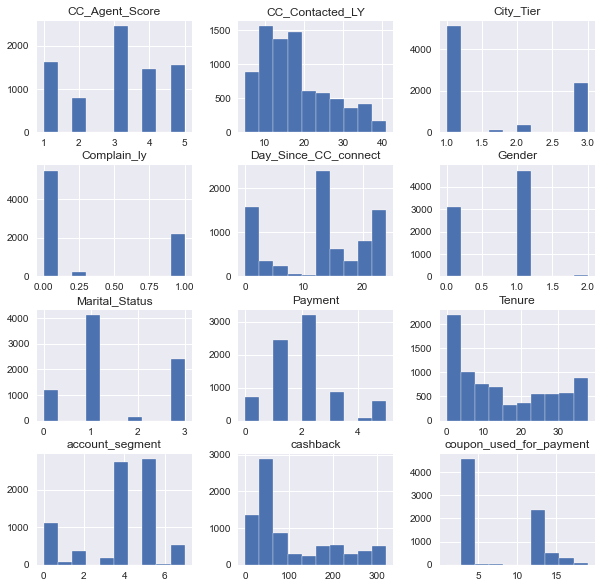

In [36]:
X_train.hist(bins=10, figsize=(10,10))
plt.show()

### Bivariate Analysis Diagram (based on significant features)

    - It can shows the releationship between each features with respect to the all other features.

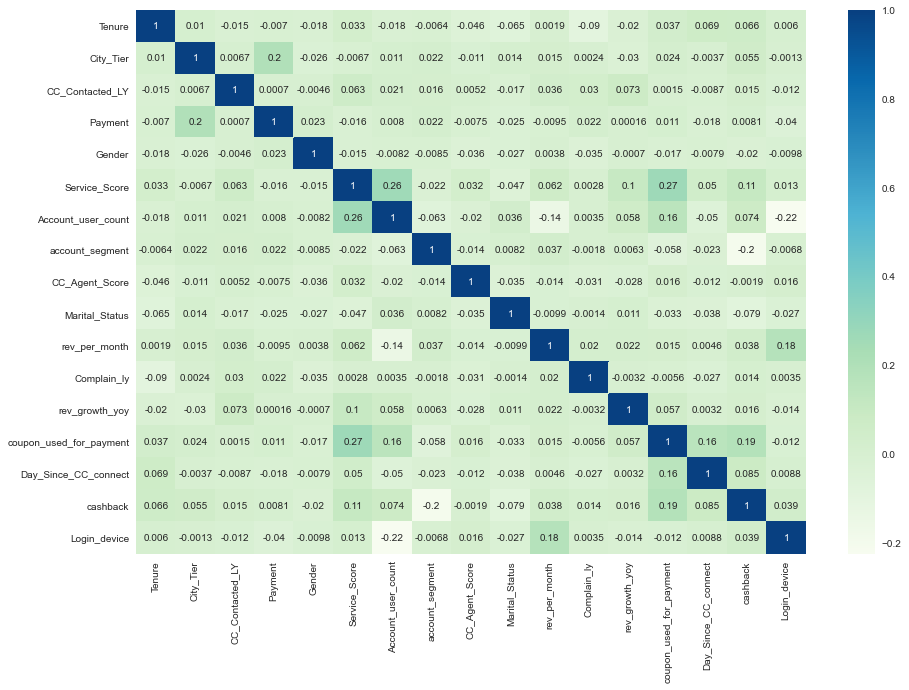

In [37]:
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), cmap = 'GnBu', annot = True)

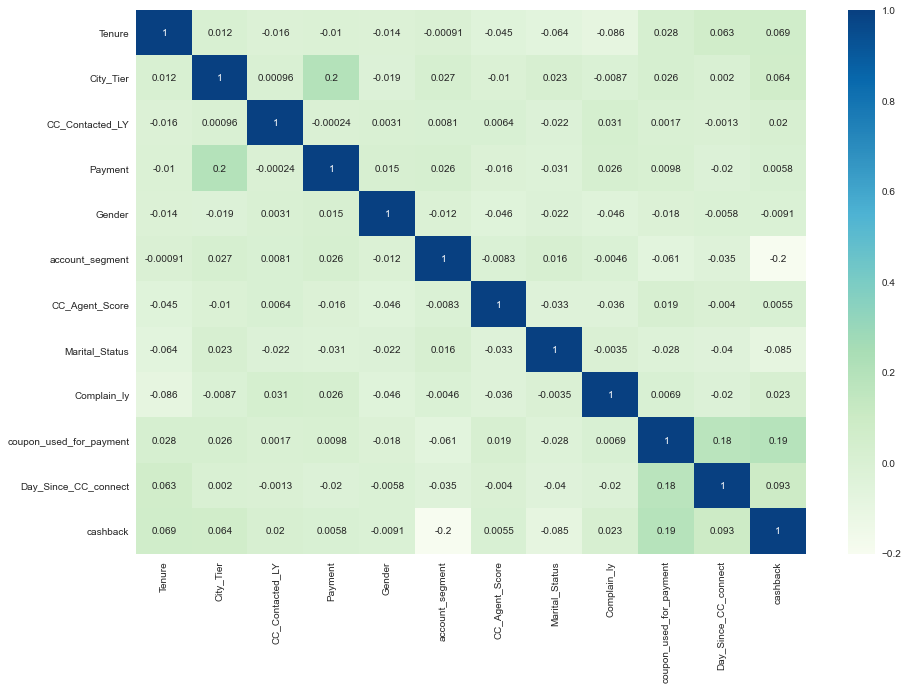

In [38]:
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X_train.corr(), cmap = 'GnBu', annot = True)

## Model Building

    We have prepare the following model procedures to analyze and review the dataset and get the performance and importance of the features available on the dataset which can gathers more informations about the subjects.
    Following is the list of model building procedure can used in this project :
    
    (1) Logistics Regression
    (2) Decision Tree
    (3) Random Forest
    (4) Linear Discriminant Analysis
    (5) K Nearest Neighbours
    (6) Naive Bayes
    (7) Gradient Boosting
    (8) Extreme Gradient Boosting
    (9) Extra Tree Classifier
    
    For every model building precure, we have gone through the following steps get outputs generated by the alogorithm :
    
    (a) Model Prediction
    (b) Model Performance
    (c) ROC-AUC Graph
    (d) Model Performance Matrics

### 1. Logistic Regression

In [39]:
model = LogisticRegression(C=1.0, 
                           class_weight=None, 
                           dual=False, 
                           fit_intercept=True,
                           intercept_scaling=1, 
                           l1_ratio=None, 
                           max_iter=100,
                           n_jobs=None, 
                           penalty='l2',
                           random_state=1, 
                           solver='liblinear', 
                           tol=0.0001, 
                           verbose=0,
                           warm_start=False)
model.fit(X_train, train_labels) 

LogisticRegression(random_state=1, solver='liblinear')

#### 1. (a) Model Prediction

In [40]:
y_predict_train = model.predict(X_train)
log_train_acc = model.score(X_train, train_labels)
log_train_acc

0.8619639685359046

In [41]:
y_predict_test = model.predict(X_test)
log_test_acc = model.score(X_test, test_labels)
log_test_acc

0.8644168146832445

In [42]:
model.intercept_

array([-2.58249653])

In [43]:
model.coef_

array([[-0.07626702,  0.34172183,  0.02792707, -0.06114567,  0.26054155,
        -0.15825901,  0.26499978,  0.392423  ,  1.5129248 ,  0.02478275,
        -0.04528851, -0.00422773]])

#### 1. (b) Model Performance

In [44]:
confusion_matrix(train_labels, y_predict_train)

array([[6355,  201],
       [ 887,  439]], dtype=int64)

In [45]:
print(classification_report(train_labels, y_predict_train))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6556
           1       0.69      0.33      0.45      1326

    accuracy                           0.86      7882
   macro avg       0.78      0.65      0.68      7882
weighted avg       0.85      0.86      0.84      7882



In [46]:
confusion_matrix(test_labels, y_predict_test)

array([[2711,   97],
       [ 361,  209]], dtype=int64)

In [47]:
print(classification_report(test_labels, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2808
           1       0.68      0.37      0.48       570

    accuracy                           0.86      3378
   macro avg       0.78      0.67      0.70      3378
weighted avg       0.85      0.86      0.85      3378



#### 1. (c) ROC-AUC Graph

AUC: 0.832


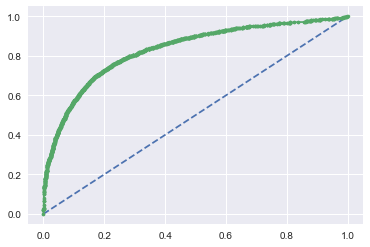

In [48]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.831


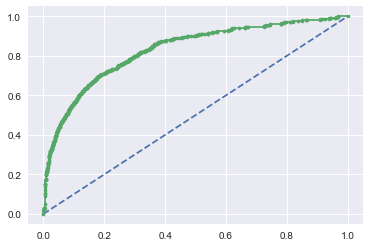

In [49]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()

#### 1. (d) Model Performance Metrices

In [50]:
log_metrics=classification_report(train_labels, y_predict_train,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision=round(df.loc["1"][0],2)
log_train_recall=round(df.loc["1"][1],2)
log_train_f1=round(df.loc["1"][2],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.69
log_train_recall  0.33
log_train_f1  0.45


In [51]:
log_metrics=classification_report(test_labels, y_predict_test,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision=round(df.loc["1"][0],2)
log_test_recall=round(df.loc["1"][1],2)
log_test_f1=round(df.loc["1"][2],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.68
log_test_recall  0.37
log_test_f1  0.48


### 2. Decision Tree

In [52]:
dtcl = DecisionTreeClassifier(random_state=1)
dtcl.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [53]:
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [10], 
    'min_samples_split': [50],
}
gs_dtcl = GridSearchCV(dtcl, param_grid_dt, cv = 5, n_jobs = -1, verbose = 1)
gs_dtcl.fit(X_train, train_labels)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'min_samples_leaf': [10], 'min_samples_split': [50]},
             verbose=1)

#### 2. (a) Model Prediction

In [54]:
print(gs_dtcl.best_params_)
best_grid = gs_dtcl.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 50}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=50,
                       random_state=1)

In [55]:
gs_dtcl.best_score_

0.8963461916058572

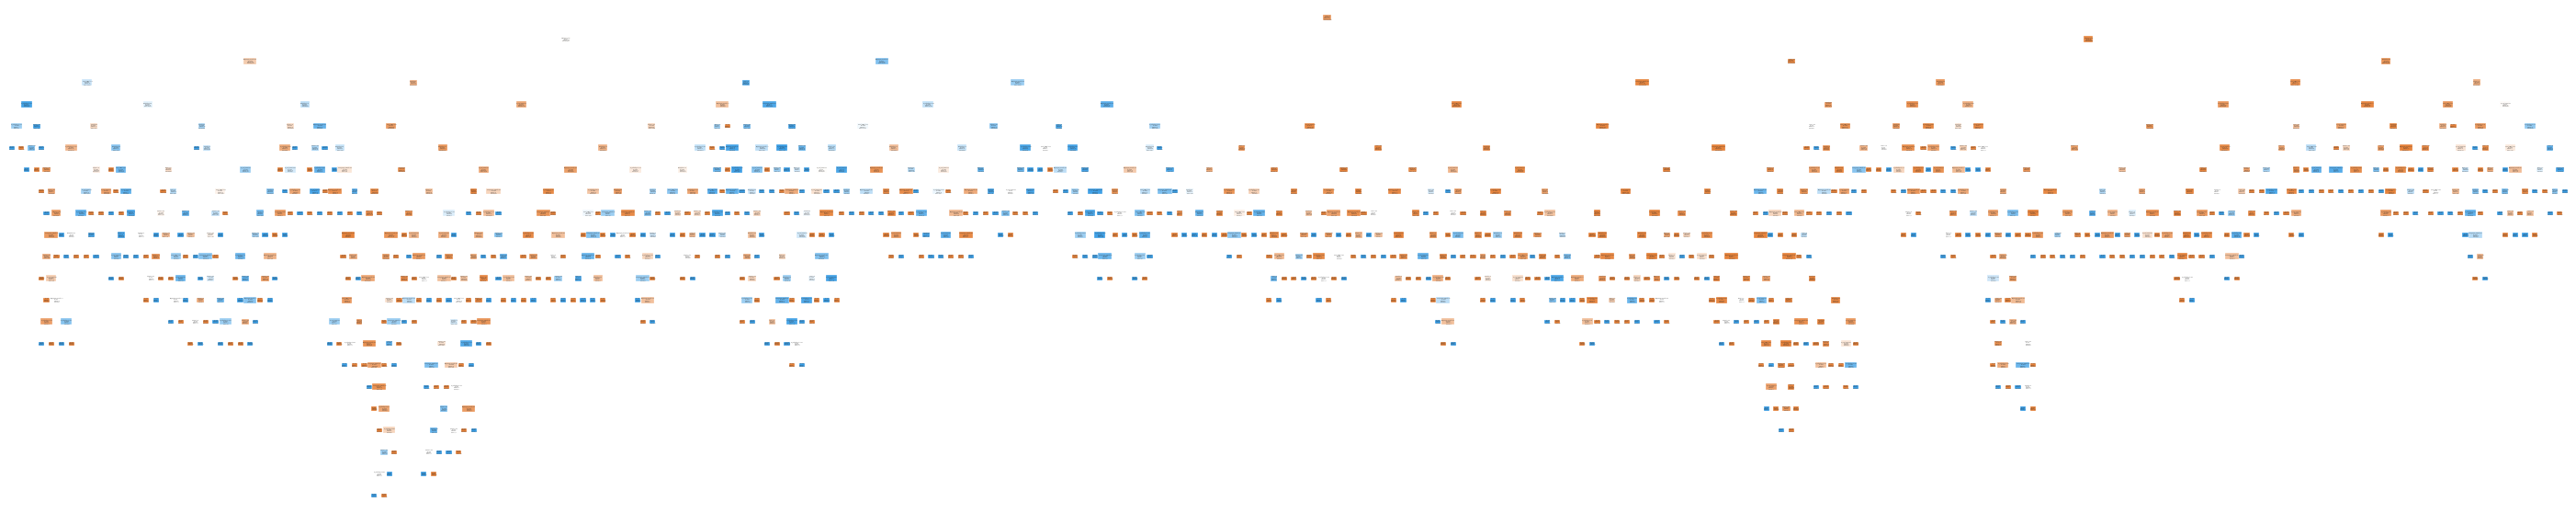

In [56]:
dot_data1 = tree.export_graphviz(dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [57]:
dt_imp = pd.DataFrame(dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns)
print(dt_imp)

                              Imp
Tenure                   0.315236
City_Tier                0.045080
CC_Contacted_LY          0.089020
Payment                  0.074856
Gender                   0.025927
account_segment          0.048399
CC_Agent_Score           0.086387
Marital_Status           0.046451
Complain_ly              0.062495
coupon_used_for_payment  0.030827
Day_Since_CC_connect     0.082239
cashback                 0.093082


In [58]:
reg_dtcl = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,min_samples_leaf=10,min_samples_split=30)
reg_dtcl.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30)

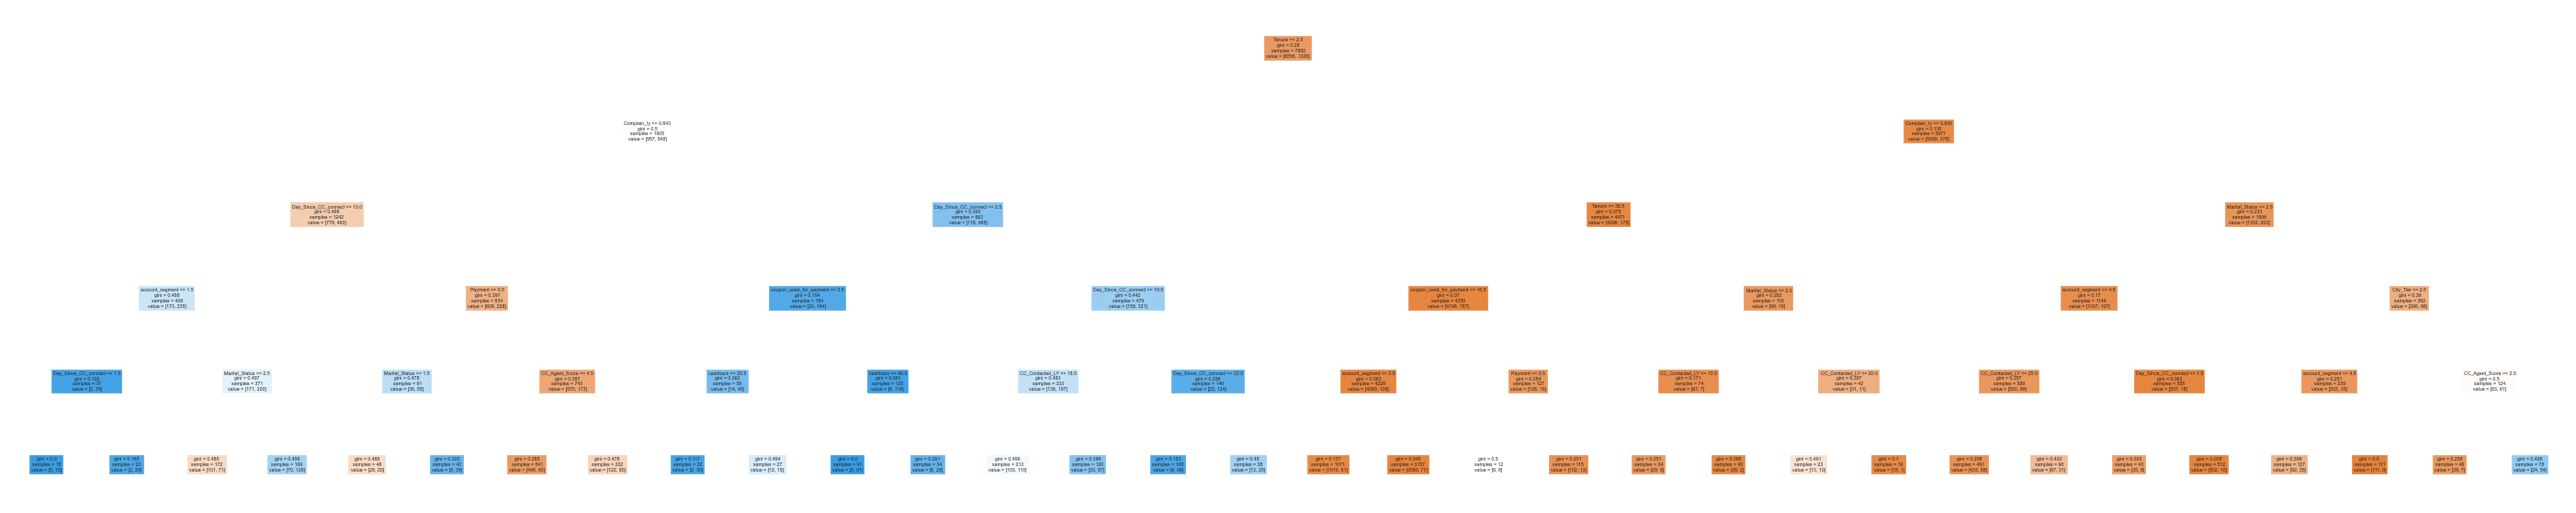

In [59]:
dot_data2 = tree.export_graphviz(reg_dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(reg_dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [60]:
ytrain_predict = reg_dtcl.predict(X_train)
ytest_predict = reg_dtcl.predict(X_test)
ytrain_predict_prob=best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

0         1
0  0.978814  0.021186
1  0.984496  0.015504
2  0.920000  0.080000
3  0.984496  0.015504
4  0.352941  0.647059

In [61]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.000000  1.000000
1  0.285714  0.714286
2  0.918367  0.081633
3  1.000000  0.000000
4  0.984496  0.015504

#### 2. (b) Model Performance

In [62]:
confusion_matrix(train_labels, ytrain_predict)

array([[6274,  282],
       [ 588,  738]], dtype=int64)

In [63]:
confusion_matrix(test_labels, ytest_predict)

array([[2665,  143],
       [ 249,  321]], dtype=int64)

In [64]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.9132199949251459

In [65]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.9043812907045589

In [66]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6556
           1       0.72      0.56      0.63      1326

    accuracy                           0.89      7882
   macro avg       0.82      0.76      0.78      7882
weighted avg       0.88      0.89      0.88      7882



In [67]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2808
           1       0.69      0.56      0.62       570

    accuracy                           0.88      3378
   macro avg       0.80      0.76      0.78      3378
weighted avg       0.88      0.88      0.88      3378



#### 2. (c) ROC-AUC Graph

AUC: 0.891


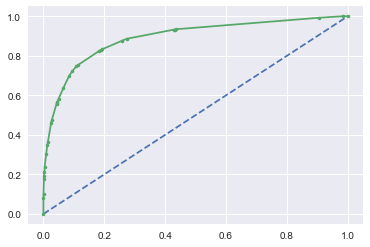

In [68]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dtcl.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.878


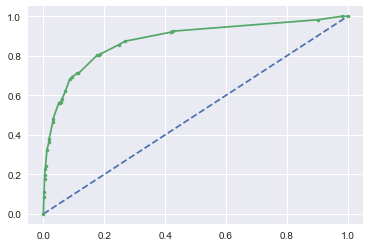

In [69]:
# AUC and ROC for the test data

# predict probabilities
probs = reg_dtcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')

# show the plot
plt.show()

#### 2. (d) Model Performance Metrices

In [70]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.72
cart_train_recall  0.56
cart_train_f1  0.63


In [71]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.69
cart_test_recall  0.56
cart_test_f1  0.62


#### 2. (e) Feature Importance

In [72]:
reg_dt_imp = pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                          index = X_train.columns).sort_values('Imp',ascending=False)
print(reg_dt_imp)

                              Imp
Tenure                   0.466179
Complain_ly              0.105043
Day_Since_CC_connect     0.072335
CC_Agent_Score           0.069859
Payment                  0.061599
Marital_Status           0.048047
City_Tier                0.045172
account_segment          0.038509
CC_Contacted_LY          0.035487
cashback                 0.026913
coupon_used_for_payment  0.016119
Gender                   0.014739


### 3. Random Forest

In [73]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [11],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [100] ## 100,200
}
rfcl = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [74]:
grid_search_rf.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [11],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [100]})

In [75]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 11,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 100}

In [76]:
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=10, max_features=11, min_samples_leaf=10,
                       min_samples_split=50, random_state=1)

In [77]:
# To understand the differences of different random states affecting Out-of-Bag score
random_state=[0,30,64]
for i in random_state:
    rfcl=RandomForestClassifier(random_state=i,oob_score=True)
    rfcl.fit(X_train,train_labels)
    print(rfcl.oob_score_)

0.9616848515605176
0.9623192083227607
0.9639685359045927


In [78]:
rfcl=RandomForestClassifier(n_estimators=500,random_state=1,oob_score=True,n_jobs=-1)
rfcl=rfcl.fit(X_train,train_labels)
rfcl.oob_score_

0.9628266937325551

In [79]:
rfcl=rfcl.fit(X_test,test_labels)
rfcl.oob_score_

0.9280639431616341

#### 3. (a) Model Prediction

In [80]:
ytrain_predict = best_grid_rf.predict(X_train)
ytest_predict = best_grid_rf.predict(X_test)
ytrain_predict_prob=best_grid_rf.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

0         1
0  0.991965  0.008035
1  0.993107  0.006893
2  0.868914  0.131086
3  0.987959  0.012041
4  0.524457  0.475543

In [81]:
ytest_predict_prob=best_grid_rf.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.072611  0.927389
1  0.320965  0.679035
2  0.965016  0.034984
3  0.573265  0.426735
4  0.968302  0.031698

#### 3. (b) Model Performance

In [82]:
confusion_matrix(train_labels,ytrain_predict)

array([[6370,  186],
       [ 446,  880]], dtype=int64)

In [83]:
confusion_matrix(test_labels, ytest_predict)

array([[2715,   93],
       [ 209,  361]], dtype=int64)

In [84]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.9132199949251459

In [85]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.9043812907045589

In [86]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6556
           1       0.83      0.66      0.74      1326

    accuracy                           0.92      7882
   macro avg       0.88      0.82      0.84      7882
weighted avg       0.92      0.92      0.92      7882



In [87]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2808
           1       0.80      0.63      0.71       570

    accuracy                           0.91      3378
   macro avg       0.86      0.80      0.83      3378
weighted avg       0.91      0.91      0.91      3378



#### 3. (c) ROC-AUC Graph

Area under Curve is 0.9561090804182001


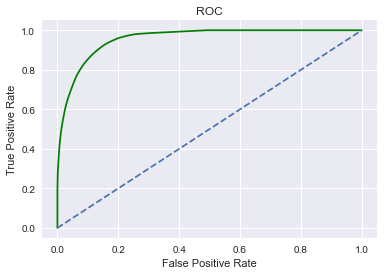

In [88]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

Area under Curve is 0.9365653271355026


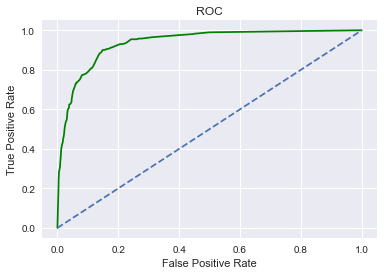

In [89]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

#### 3. (d) Model Performance Metrices

In [90]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.83
rf_train_recall  0.66
rf_train_f1  0.74


In [91]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.8
rf_test_recall  0.63
rf_test_f1  0.71


#### 3.(e) Feature Importance

In [92]:
rf_imp = pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], 
                      index = X_train.columns).sort_values('Imp',ascending=False)
print(rf_imp)

                              Imp
Tenure                   0.472254
Complain_ly              0.109886
Day_Since_CC_connect     0.078386
CC_Agent_Score           0.059070
Marital_Status           0.051838
CC_Contacted_LY          0.048743
Payment                  0.048580
account_segment          0.039524
City_Tier                0.036372
cashback                 0.030012
coupon_used_for_payment  0.014963
Gender                   0.010374


### 4. Linear Discriminant Analysis

In [93]:
clf = LinearDiscriminantAnalysis(solver='eigen',shrinkage = 'auto',)
model=clf.fit(X_train,train_labels)
model

LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')

#### 4. (a) Model Prediction

In [94]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)
#*************************************************************#
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
pred_class_test

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [95]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
#*************************************************************#
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

#### 4. (b) Model Performance

In [96]:
confusion_matrix(train_labels, pred_class_train)

array([[6346,  210],
       [ 901,  425]], dtype=int64)

In [97]:
confusion_matrix(test_labels, pred_class_test)

array([[2704,  104],
       [ 360,  210]], dtype=int64)

In [98]:
lda_train_acc = model.score(X_train,train_labels)
lda_train_acc

0.8590459274295864

In [99]:
lda_test_acc = model.score(X_test,test_labels)
lda_test_acc

0.8626406157489639

In [100]:
print(classification_report(train_labels, pred_class_train))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6556
           1       0.67      0.32      0.43      1326

    accuracy                           0.86      7882
   macro avg       0.77      0.64      0.68      7882
weighted avg       0.84      0.86      0.84      7882



In [101]:
print(classification_report(test_labels, pred_class_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2808
           1       0.67      0.37      0.48       570

    accuracy                           0.86      3378
   macro avg       0.78      0.67      0.70      3378
weighted avg       0.85      0.86      0.85      3378



#### 4. (c) ROC-AUC Graph

AUC: 0.891


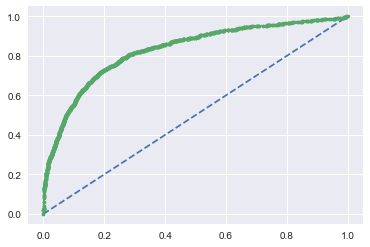

In [102]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
lda_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.878


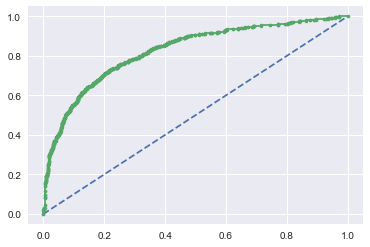

In [103]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
lda_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.')

# show the plot
plt.show()

#### 4. (d) Model Performance Metrices

In [104]:
lda_metrics=classification_report(train_labels, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.67
lda_train_recall  0.32
lda_train_f1  0.43


In [105]:
lda_metrics=classification_report(test_labels, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["0"][2],2)
lda_test_recall=round(df.loc["0"][1],2)
lda_test_precision=round(df.loc["0"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.88
lda_test_recall  0.96
lda_test_f1  0.92


### 5. K Nearest Neighbours

In [106]:
KNN_model=KNeighborsClassifier(n_neighbors = 15,
                              weights = 'uniform',
                              metric = 'minkowski')
KNN_model.fit(X_train,train_labels)

KNeighborsClassifier(n_neighbors=15)

#### 5. (a) Model Prediction

In [107]:
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_acc = KNN_model.score(X_train, train_labels)
KNN_train_acc

0.8587921847246892

In [108]:
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_acc = KNN_model.score(X_test, test_labels)
KNN_test_acc

0.8537596210775606

#### 5. (b) Model Performance

In [109]:
confusion_matrix(train_labels, KNN_train_predict)

array([[6389,  167],
       [ 946,  380]], dtype=int64)

In [110]:
confusion_matrix(test_labels, KNN_test_predict)

array([[2739,   69],
       [ 425,  145]], dtype=int64)

In [111]:
print(classification_report(train_labels, KNN_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6556
           1       0.69      0.29      0.41      1326

    accuracy                           0.86      7882
   macro avg       0.78      0.63      0.66      7882
weighted avg       0.84      0.86      0.83      7882



In [112]:
print(classification_report(test_labels, KNN_test_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2808
           1       0.68      0.25      0.37       570

    accuracy                           0.85      3378
   macro avg       0.77      0.61      0.64      3378
weighted avg       0.83      0.85      0.82      3378



#### 5. (c) ROC-AUC Graph

Area under Curve is 0.8873576827830677


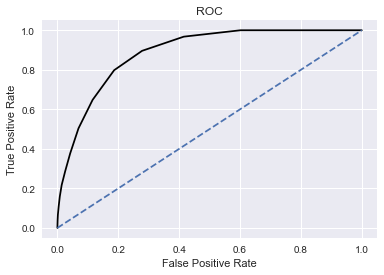

In [113]:
KNN_train_fpr, KNN_train_tpr,_=roc_curve(train_labels,KNN_model.predict_proba(X_train)[:,1])
plt.plot(KNN_train_fpr,KNN_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_train_auc=roc_auc_score(train_labels,KNN_model.predict_proba(X_train)[:,1])
print('Area under Curve is', KNN_train_auc)

Area under Curve is 0.838974171539961


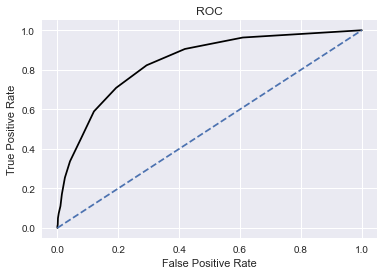

In [114]:
KNN_test_fpr, KNN_test_tpr,_=roc_curve(test_labels,KNN_model.predict_proba(X_test)[:,1])
plt.plot(KNN_test_fpr,KNN_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_test_auc=roc_auc_score(test_labels,KNN_model.predict_proba(X_test)[:,1])
print('Area under Curve is', KNN_test_auc)

#### 5. (d) Model Performance Metrices

In [115]:
KNN_metrics=classification_report(train_labels, KNN_train_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_f1=round(df.loc["1"][2],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_precision=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.69
KNN_train_recall  0.29
KNN_train_f1  0.41


In [116]:
KNN_metrics=classification_report(test_labels, KNN_test_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_f1=round(df.loc["1"][2],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_precision=round(df.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.68
KNN_test_recall  0.25
KNN_test_f1  0.37


In [117]:
# empty list that will hold accuracy scores
ac_scores = []
#
# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, train_labels)
    # evaluate test accuracy
    scores = knn.score(X_test, test_labels)
    ac_scores.append(scores)
#
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.11663706335109536,
 0.13972764949674366,
 0.14268798105387803,
 0.14535227945529894,
 0.14179988158673773,
 0.14446417998815864,
 0.14535227945529894,
 0.14624037892243935,
 0.14772054470100648,
 0.1486086441681468]

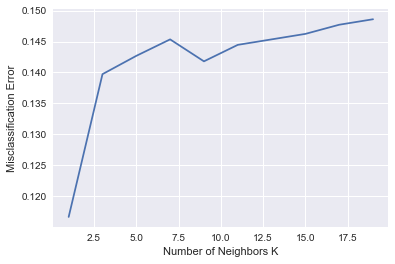

In [118]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### 6. Gaussian Naive Bayes

In [119]:
NB_model = GaussianNB()
NB_model.fit(X_train, train_labels)

GaussianNB()

#### 6. (a) Model Prediction

In [120]:
NB_train_predict = NB_model.predict(X_train)
NB_train_acc = NB_model.score(X_train, train_labels)   
NB_train_acc 

0.8631058107079421

In [121]:
NB_test_predict = NB_model.predict(X_test)
NB_test_acc = NB_model.score(X_test, test_labels)
NB_test_acc

0.8590882178804026

#### 6. (b) Model Performance

In [122]:
confusion_matrix(train_labels, NB_train_predict) 

array([[6249,  307],
       [ 772,  554]], dtype=int64)

In [123]:
confusion_matrix(test_labels, NB_test_predict)

array([[2659,  149],
       [ 327,  243]], dtype=int64)

In [124]:
print(classification_report(train_labels, NB_train_predict))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6556
           1       0.64      0.42      0.51      1326

    accuracy                           0.86      7882
   macro avg       0.77      0.69      0.71      7882
weighted avg       0.85      0.86      0.85      7882



In [125]:
print(classification_report(test_labels, NB_test_predict))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2808
           1       0.62      0.43      0.51       570

    accuracy                           0.86      3378
   macro avg       0.76      0.69      0.71      3378
weighted avg       0.84      0.86      0.85      3378



#### 6. (c) ROC-AUC Graph

Area under Curve is 0.8175162447764106


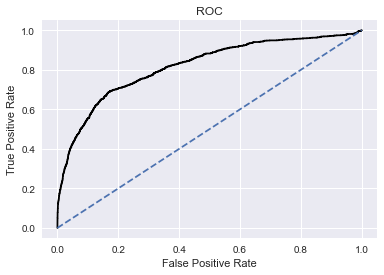

In [126]:
NB_train_fpr, NB_train_tpr,_=roc_curve(train_labels,NB_model.predict_proba(X_train)[:,1])
plt.plot(NB_train_fpr,NB_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_train_auc=roc_auc_score(train_labels,NB_model.predict_proba(X_train)[:,1])
print('Area under Curve is', NB_train_auc)

Area under Curve is 0.8115953166391764


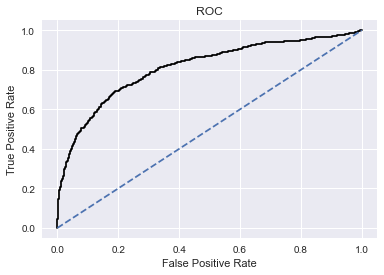

In [127]:
NB_test_fpr, NB_test_tpr,_=roc_curve(test_labels,NB_model.predict_proba(X_test)[:,1])
plt.plot(NB_test_fpr,NB_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_test_auc=roc_auc_score(test_labels,NB_model.predict_proba(X_test)[:,1])
print('Area under Curve is', NB_test_auc)

#### 6. (d) Model Performance Metrices

In [128]:
NB_metrics=classification_report(train_labels, NB_train_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_f1=round(df.loc["1"][2],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_precision=round(df.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.64
NB_train_recall  0.42
NB_train_f1  0.51


In [129]:
NB_metrics=classification_report(test_labels, NB_test_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_f1=round(df.loc["1"][2],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_precision=round(df.loc["1"][0],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.62
NB_test_recall  0.43
NB_test_f1  0.51


### 7. Gradient Boosting

In [130]:
params = {'loss' : 'deviance',
          'n_estimators': 100, 
          'max_depth': 10, 
          'criterion': 'friedman_mse',
          'subsample': 1.0,
          'learning_rate': 0.1, 
          'min_samples_leaf': 10, 
          'min_samples_split': 50,
          'random_state': 1,
          'ccp_alpha' : 0.5}
#
gbcl = GradientBoostingClassifier(**params)
gbcl = gbcl.fit(X_train, train_labels)

#### 7. (a) Model Prediction

In [131]:
gbcl_train_predict = gbcl.predict(X_train)
gbcl_test_predict = gbcl.predict(X_test)

In [132]:
gbcl_train_acc = gbcl.score(X_train,train_labels)
gbcl_train_acc

0.8317685866531337

In [133]:
gbcl_test_acc = gbcl.score(X_test,test_labels)
gbcl_test_acc

0.8312611012433393

#### 7. (b) Model Performance

In [134]:
confusion_matrix(train_labels, gbcl_train_predict) 

array([[6556,    0],
       [1326,    0]], dtype=int64)

In [135]:
confusion_matrix(test_labels, gbcl_test_predict)

array([[2808,    0],
       [ 570,    0]], dtype=int64)

In [136]:
print(classification_report(train_labels, gbcl_train_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6556
           1       0.00      0.00      0.00      1326

    accuracy                           0.83      7882
   macro avg       0.42      0.50      0.45      7882
weighted avg       0.69      0.83      0.76      7882



In [137]:
print(classification_report(test_labels, gbcl_test_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2808
           1       0.00      0.00      0.00       570

    accuracy                           0.83      3378
   macro avg       0.42      0.50      0.45      3378
weighted avg       0.69      0.83      0.75      3378



#### 7. (c) ROC-AUC Graph

Area under Curve is 0.5


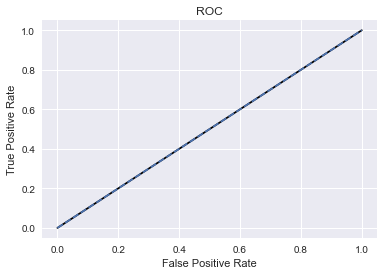

In [138]:
gbcl_train_fpr, gbcl_train_tpr,_=roc_curve(train_labels,gbcl.predict_proba(X_train)[:,1])
plt.plot(gbcl_train_fpr,gbcl_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
gbcl_train_auc=roc_auc_score(train_labels,gbcl.predict_proba(X_train)[:,1])
print('Area under Curve is', gbcl_train_auc)

Area under Curve is 0.5


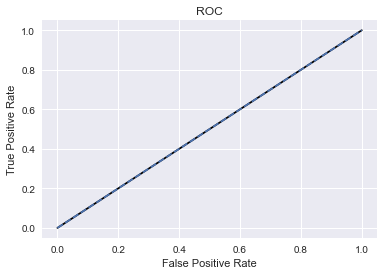

In [139]:
gbcl_test_fpr, gbcl_test_tpr,_=roc_curve(test_labels,gbcl.predict_proba(X_test)[:,1])
plt.plot(gbcl_test_fpr,gbcl_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
gbcl_test_auc=roc_auc_score(test_labels,gbcl.predict_proba(X_test)[:,1])
print('Area under Curve is', gbcl_test_auc)

#### 7. (d) Model Performance Metrices

In [140]:
gbcl_metrics=classification_report(train_labels, gbcl_train_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_f1=round(df.loc["1"][2],2)
gbcl_train_recall=round(df.loc["1"][1],2)
gbcl_train_precision=round(df.loc["1"][0],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

gbcl_train_precision  0.0
gbcl_train_recall  0.0
gbcl_train_f1  0.0


In [141]:
gbcl_metrics=classification_report(test_labels, gbcl_test_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_f1=round(df.loc["1"][2],2)
gbcl_test_recall=round(df.loc["1"][1],2)
gbcl_test_precision=round(df.loc["1"][0],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.0
gbcl_test_recall  0.0
gbcl_test_f1  0.0


### 8. Xtreme Gradient Boosting (XGB)

In [142]:
xgb = XGBClassifier(base_score = 0.5, 
                    colsample_bylevel = 1, 
                    colsample_bytree = 1,
                    gamma = 0, 
                    learning_rate = 0.1, 
                    max_depth = 10,
                    min_child_weight = 1, 
                    n_estimators = 100, 
                    objective ='binary:logistic', 
                    reg_alpha = 1, 
                    reg_lambda = 1,
                    scale_pos_weight=1,  
                    subsample = 1)
xgb = xgb.fit(X_train, train_labels)

#### 8. (a) Model Prediction

In [143]:
xgb_train_predict = xgb.predict(X_train)
xgb_test_predict = xgb.predict(X_test)

In [144]:
xgb_train_acc = xgb.score(X_train,train_labels)
xgb_train_acc

0.9978431870083735

In [145]:
xgb_test_acc = xgb.score(X_test,test_labels)
xgb_test_acc

0.9618117229129662

#### 8. (b) Model Performance

In [146]:
confusion_matrix(train_labels, xgb_train_predict) 

array([[6556,    0],
       [  17, 1309]], dtype=int64)

In [147]:
confusion_matrix(test_labels, xgb_test_predict)

array([[2774,   34],
       [  95,  475]], dtype=int64)

In [148]:
print(classification_report(train_labels, xgb_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      0.99      0.99      1326

    accuracy                           1.00      7882
   macro avg       1.00      0.99      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [149]:
print(classification_report(test_labels, xgb_test_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2808
           1       0.93      0.83      0.88       570

    accuracy                           0.96      3378
   macro avg       0.95      0.91      0.93      3378
weighted avg       0.96      0.96      0.96      3378



#### 8. (c) ROC-AUC Graph

Area under Curve is 0.9999779139139582


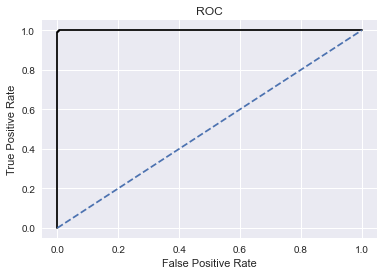

In [150]:
xgb_train_fpr, xgb_train_tpr,_=roc_curve(train_labels,xgb.predict_proba(X_train)[:,1])
plt.plot(xgb_train_fpr,xgb_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgb_train_auc=roc_auc_score(train_labels,xgb.predict_proba(X_train)[:,1])
print('Area under Curve is', xgb_train_auc)

Area under Curve is 0.9898660468835907


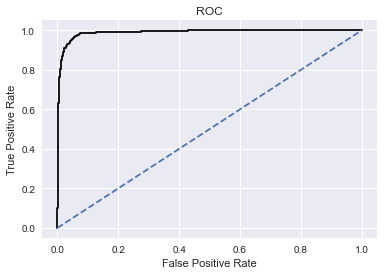

In [151]:
xgb_test_fpr, xgb_test_tpr,_=roc_curve(test_labels,xgb.predict_proba(X_test)[:,1])
plt.plot(xgb_test_fpr,xgb_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgb_test_auc=roc_auc_score(test_labels,xgb.predict_proba(X_test)[:,1])
print('Area under Curve is', xgb_test_auc)

#### 8. (d) Model Performance Metrices

In [152]:
xgb_metrics=classification_report(train_labels, xgb_train_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
xgb_train_f1=round(df.loc["1"][2],2)
xgb_train_recall=round(df.loc["1"][1],2)
xgb_train_precision=round(df.loc["1"][0],2)
print ('gbcl_train_precision ',xgb_train_precision)
print ('gbcl_train_recall ',xgb_train_recall)
print ('gbcl_train_f1 ',xgb_train_f1)

gbcl_train_precision  1.0
gbcl_train_recall  0.99
gbcl_train_f1  0.99


In [153]:
xgb_metrics=classification_report(test_labels, xgb_test_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
xgb_test_f1=round(df.loc["1"][2],2)
xgb_test_recall=round(df.loc["1"][1],2)
xgb_test_precision=round(df.loc["1"][0],2)
print ('gbcl_test_precision ',xgb_test_precision)
print ('gbcl_test_recall ',xgb_test_recall)
print ('gbcl_test_f1 ',xgb_test_f1)

gbcl_test_precision  0.93
gbcl_test_recall  0.83
gbcl_test_f1  0.88


### 9. Extra Tree Classifier

In [154]:
etc = ExtraTreesClassifier(n_estimators = 100,
                           criterion ='gini',
                           max_depth = 10,
                           min_samples_split = 10,
                           min_samples_leaf = 50,
                           max_features = 'auto',
                           min_impurity_decrease = 0.5,
                           random_state = 1)
etc = etc.fit(X_train, train_labels)

#### 9. (a) Model Prediction

In [155]:
etc_train_predict = etc.predict(X_train)
etc_test_predict = etc.predict(X_test)

In [156]:
etc_train_acc = etc.score(X_train,train_labels)
etc_train_acc

0.8317685866531337

In [157]:
etc_test_acc = etc.score(X_test,test_labels)
etc_test_acc

0.8312611012433393

#### 9. (b) Model Performance

In [158]:
confusion_matrix(train_labels, etc_train_predict) 

array([[6556,    0],
       [1326,    0]], dtype=int64)

In [159]:
confusion_matrix(test_labels, etc_test_predict)

array([[2808,    0],
       [ 570,    0]], dtype=int64)

In [160]:
print(classification_report(train_labels, etc_train_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6556
           1       0.00      0.00      0.00      1326

    accuracy                           0.83      7882
   macro avg       0.42      0.50      0.45      7882
weighted avg       0.69      0.83      0.76      7882



In [161]:
print(classification_report(test_labels, etc_test_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2808
           1       0.00      0.00      0.00       570

    accuracy                           0.83      3378
   macro avg       0.42      0.50      0.45      3378
weighted avg       0.69      0.83      0.75      3378



#### 9. (c) ROC-AUC Graph

Area under Curve is 0.5


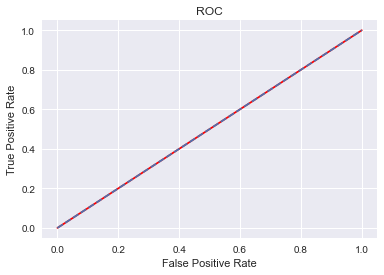

In [162]:
etc_train_fpr, etc_train_tpr,_= roc_curve(train_labels,etc.predict_proba(X_train)[:,1])
plt.plot(etc_train_fpr,etc_train_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
etc_train_auc=roc_auc_score(train_labels,etc.predict_proba(X_train)[:,1])
print('Area under Curve is', etc_train_auc)

Area under Curve is 0.5


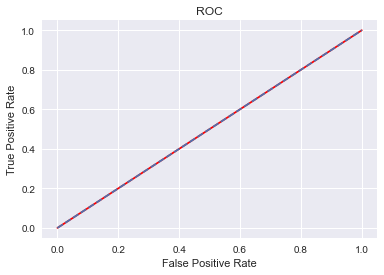

In [163]:
etc_test_fpr, etc_test_tpr,_= roc_curve(test_labels,etc.predict_proba(X_test)[:,1])
plt.plot(etc_test_fpr,etc_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
etc_test_auc=roc_auc_score(test_labels,etc.predict_proba(X_test)[:,1])
print('Area under Curve is', etc_test_auc)

#### 9. (d) Model Performance Metrices

In [164]:
etc_metrics=classification_report(train_labels, etc_train_predict,output_dict=True)
df=pd.DataFrame(etc_metrics).transpose()
etc_train_f1=round(df.loc["1"][2],2)
etc_train_recall=round(df.loc["1"][1],2)
etc_train_precision=round(df.loc["1"][0],2)
print ('etc_train_precision ',etc_train_precision)
print ('etc_train_recall ',etc_train_recall)
print ('etc_train_f1 ',etc_train_f1)

etc_train_precision  0.0
etc_train_recall  0.0
etc_train_f1  0.0


In [165]:
etc_metrics=classification_report(test_labels, etc_test_predict,output_dict=True)
df=pd.DataFrame(etc_metrics).transpose()
etc_test_f1=round(df.loc["1"][2],2)
etc_test_recall=round(df.loc["1"][1],2)
etc_test_precision=round(df.loc["1"][0],2)
print ('etc_test_precision ',etc_test_precision)
print ('etc_test_recall ',etc_test_recall)
print ('etc_test_f1 ',etc_test_f1)

etc_test_precision  0.0
etc_test_recall  0.0
etc_test_f1  0.0


## Model Performance Comparison

    -Prepare the comparison table and graph showing accuracy, AUC, precision, recall & F1 score generated on each algorithm.

#### 1. Performance Matrics - on Train Data

In [166]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
       'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
       'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
       'Log Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],          
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
       'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1], 
       'NB Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
       'Gr.Boost Train':[gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1], 
       'XG Boost Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
       'Extra Tree Train':[etc_train_acc,etc_train_auc,etc_train_recall,etc_train_precision,etc_train_f1]},index=index)
round(data,2)

CART Train  RF Train  Log Train  LDA Train  KNN Train  NB Train  \
Accuracy         0.91      0.91       0.86       0.86       0.86      0.86   
AUC              0.89      0.96       0.83       0.83       0.89      0.82   
Recall           0.56      0.66       0.33       0.32       0.29      0.42   
Precision        0.72      0.83       0.69       0.67       0.69      0.64   
F1 Score         0.63      0.74       0.45       0.43       0.41      0.51   

           Gr.Boost Train  XG Boost Train  Extra Tree Train  
Accuracy             0.83            1.00              0.83  
AUC                  0.50            1.00              0.50  
Recall               0.00            0.99              0.00  
Precision            0.00            1.00              0.00  
F1 Score             0.00            0.99              0.00

#### 2. Performance Matrics - on Test Data

In [167]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Log Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],           
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],  
        'NB Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
        'Gr.Boost Test':[gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],  
        'XG Boost Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1],
        'Extra Tree Test':[etc_test_acc,etc_test_auc,etc_test_recall,etc_test_precision,etc_test_f1]
},index=index)
round(data,2)

CART Test  RF Test  Log Test  LDA Test  KNN Test  NB Test  \
Accuracy        0.90     0.90      0.86      0.86      0.85     0.86   
AUC             0.88     0.94      0.83      0.83      0.84     0.81   
Recall          0.56     0.63      0.37      0.96      0.25     0.43   
Precision       0.69     0.80      0.68      0.88      0.68     0.62   
F1 Score        0.62     0.71      0.48      0.92      0.37     0.51   

           Gr.Boost Test  XG Boost Test  Extra Tree Test  
Accuracy            0.83           0.96             0.83  
AUC                 0.50           0.99             0.50  
Recall              0.00           0.83             0.00  
Precision           0.00           0.93             0.00  
F1 Score            0.00           0.88             0.00

#### 3. ROC-AUC - on Train Data

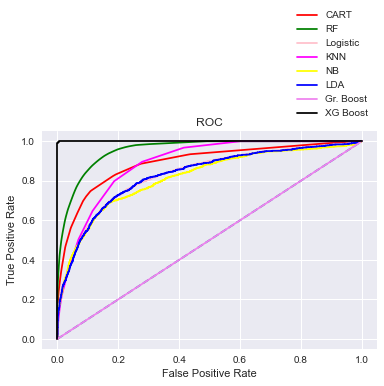

In [168]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(log_train_fpr,log_train_tpr,color='Pink',label="Logistic")
plt.plot(KNN_train_fpr,KNN_train_tpr,color='magenta',label="KNN")
plt.plot(NB_train_fpr,NB_train_tpr,color='yellow',label="NB")
plt.plot(lda_train_fpr,lda_train_tpr,color='blue',label="LDA")
plt.plot(gbcl_train_fpr,gbcl_train_tpr,color='violet',label="Gr. Boost")
plt.plot(xgb_train_fpr,xgb_train_tpr,color='black',label="XG Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### 4. ROC-AUC - on Test Data

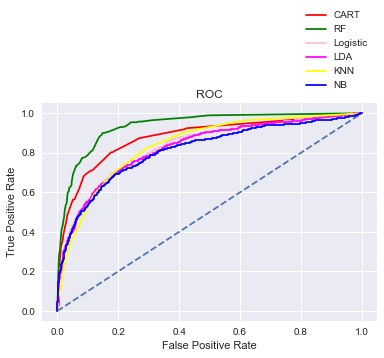

In [169]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(log_test_fpr,log_test_tpr,color='pink',label="Logistic")
plt.plot(lda_test_fpr,lda_test_tpr,color='magenta',label="LDA")
plt.plot(KNN_test_fpr,KNN_test_tpr,color='yellow',label="KNN")
plt.plot(NB_test_fpr,NB_test_tpr,color='blue',label="NB")
#plt.plot(gbcl_test_fpr,gbcl_test_tpr,color='violet',label="Gr. Boost")
#plt.plot(xgb_test_fpr,xgb_test_tpr,color='black',label="XG Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Feature Importance

    After Cheking all types of model performances, next we need to find the importances of the features used for model building.Below are the procedure used for the same :
    
    (1) Impurity Based (Base estimator = decision tree)
    (2) Permutation Based
    (3) SHAP (shapley additive features)
    (4) ELI5 python Package

#### 1. Impurity-based Importance.

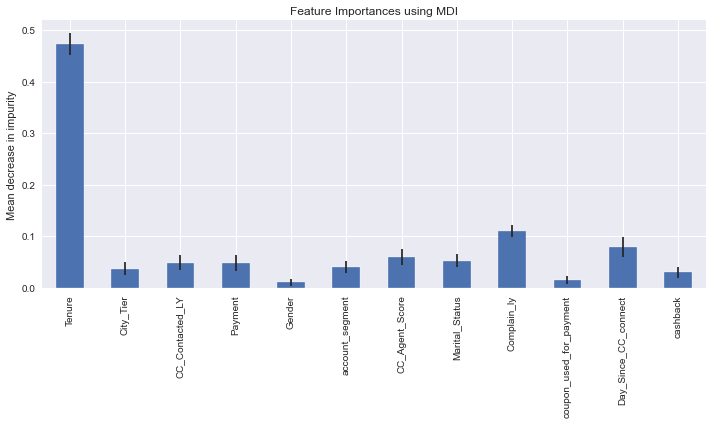

In [170]:
#feature_names = [f'feature {i}' for i in range(X_train.shape[1])]
forest_importances = pd.Series(best_grid_rf.feature_importances_, index=X_train.columns)
std = np.std([tree.feature_importances_ for tree in best_grid_rf.estimators_], axis=0)
#
fig, ax = plt.subplots(figsize=(10,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### 2. Permutation-based Importance.

In [171]:
from sklearn.inspection import permutation_importance

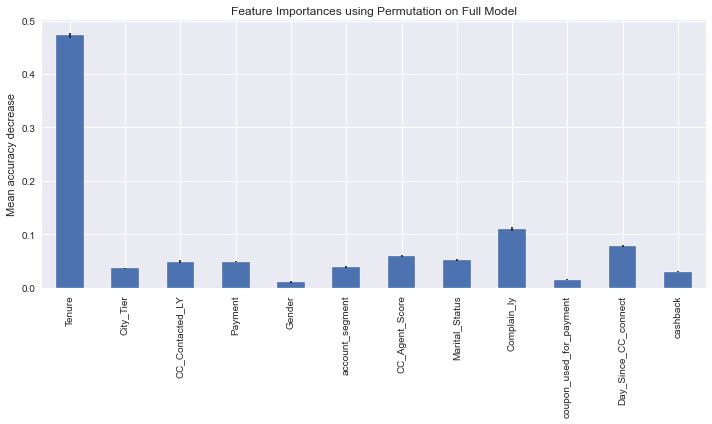

In [172]:
result = permutation_importance(best_grid_rf, X_test, test_labels, n_repeats=10, random_state=1, n_jobs=2)
#
fig, ax = plt.subplots(figsize=(10,6))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature Importances using Permutation on Full Model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#### 3. SHAP Value-based Importance.

In [173]:
import shap  # package used to calculate Shap values
row_to_show = 5
data_for_prediction = X_train.iloc[row_to_show]
explainer = shap.TreeExplainer(best_grid_rf) # Create object that can calculate shap values
shap_values = explainer.shap_values(data_for_prediction) # Calculate Shap values
#
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [174]:
# use Kernel SHAP to explain test set predictions
k_explainer = shap.KernelExplainer(best_grid_rf.predict_proba, X_train)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

Using 7882 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


#### 4. ELI5 Feature Importance.

In [175]:
import eli5 as eli
eli.explain_weights(best_grid_rf)

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=11, min_samples_leaf=10,\n                       min_samples_split=50, random_state=1)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='x0', weight=0.47225374632673706, std=0.02152401202764055, value=None), FeatureWeight(feature='x8', weight=0.10988629632811582, std=0.011482651798129304, value=None), FeatureWeight(feature='x10', weight=0.07838572797957476, std=0.01897345685809972, value=None), FeatureWeight(feature='x6', weight=0.05906994003234946, std=0.015271040322502675, value=None), FeatureWeight(feature='x7', weight=0.05183752839164924, std=0.012677100831699739, value=None), FeatureWeight(feature='x2', weight=0.04874256100106382, std=0.014096704763534503, value=None), FeatureWeight(feature='x3', weight=0.0485797686482122, std=0.01564503714303156, value=None), FeatureWeight(feature='x5', weight=0.03952390091947663, std=0.011546111008922817, value=None), FeatureWeight(feature='x1', weight=0.03637225154115558, std=0.012580858161598303, value=None), FeatureWeight(feature='x11', weight=0.030011769883874585, std=0.01069180945773759, value=None), FeatureWeight(feature='x9', weight=0.014962524264486353, std=0.008216101443023673, value=None), FeatureWeight(feature='x4', weight=0.010373984683304504, std=0.006822564233004989, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [176]:
eli.explain_prediction(best_grid_rf , np.array(X_test)[1])

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=11, min_samples_leaf=10,\n                       min_samples_split=50, random_state=1)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x0', weight=0.32217799887549964, std=None, value=1.0), FeatureWeight(feature='x10', weight=0.19500338277858525, std=None, value=1.0), FeatureWeight(feature='<BIAS>', weight=0.16850926160872878, std=None, value=1.0), FeatureWeight(feature='x3', weight=0.11078059363712202, std=None, value=3.0), FeatureWeight(feature='x6', weight=0.05933981918744194, std=None, value=5.0), FeatureWeight(feature='x2', weight=0.032622175036878316, std=None, value=22.0), FeatureWeight(feature='x1', weight=0.020752131461186804, std=None, value=3.0), FeatureWeight(feature='x9', weight=0.005919808010033135, std=None, value=4.0), FeatureWeight(feature='x4', weight=0.0015752277409890204, std=None, value=1.0)], neg=[FeatureWeight(feature='x8', weight=-0.11838160739446824, std=None, value=0.0), FeatureWeight(feature='x7', weight=-0.0778113432165945, std=None, value=1.0), FeatureWeight(feature='x5', weight=-0.02080674632613706, std=None, value=4.0), FeatureWeight(feature='x11', weight=-0.020645353427983997, std=None, value=12.0)], pos_remaining=0, neg_remaining=0), proba=0.6790353479712813, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [177]:
eli.show_prediction(best_grid_rf, X_test.iloc[1],feature_names=list(X_train.columns),
                    show_feature_values=True)

In [178]:
eli.show_prediction(best_grid_rf, X_test.iloc[20],feature_names=list(X_train.columns),
                    show_feature_values=True)

#### 5. Shap-Hypertune Feature Importance.

In [179]:
import catboost as cb
model = cb.CatBoostClassifier(verbose=False)    
model.fit(X_train, train_labels)
from shap_selection import feature_selection
feature_order = feature_selection.shap_select(model, X_train, X_test, X_train.columns, agnostic=False)
#
feature_order=pd.DataFrame(feature_order).T
feature_order.columns = ['Feature','Values']
feature_order.head(15)

Feature   Values
0                    Tenure  4124.19
1               Complain_ly  2208.95
2           account_segment  1603.65
3            CC_Agent_Score  1250.11
4                 City_Tier  1157.33
5            Marital_Status  1080.55
6      Day_Since_CC_connect  1067.41
7                    Gender  731.008
8                   Payment    677.5
9           CC_Contacted_LY  649.585
10                 cashback   602.53
11  coupon_used_for_payment  376.218

## Cross-Validation

In [180]:
index=['Mean']
data = pd.DataFrame(
      {'CART':[cross_val_score(dtcl, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'Random Forest':[cross_val_score(rfcl, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'Logistics':[cross_val_score(model, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'LDA':[cross_val_score(clf, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'KNN':[cross_val_score(KNN_model, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'Naive Bayes':[cross_val_score(NB_model, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'Gradient Boost':[cross_val_score(gbcl, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'XG Boost':[cross_val_score(xgb, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'Extra Tree':[cross_val_score(etc, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()]},index=index)
round(data,2)

CART  Random Forest  Logistics   LDA   KNN  Naive Bayes  Gradient Boost  \
Mean -0.06          -0.04      -0.06 -0.14 -0.15        -0.14           -0.17   

      XG Boost  Extra Tree  
Mean     -0.05       -0.17

## Model Check - Alternative (1)

In [181]:
from lazypredict.Supervised import LazyClassifier

In [182]:
clf = LazyClassifier(ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, train_labels, test_labels)
models

 21%|█████████████████▏                                                                 | 6/29 [00:04<00:14,  1.59it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 41%|█████████████████████████████████▉                                                | 12/29 [00:12<00:26,  1.53s/it]

LabelPropagation model failed to execute
underflow encountered in exp


 48%|███████████████████████████████████████▌                                          | 14/29 [00:16<00:25,  1.68s/it]

LabelSpreading model failed to execute
underflow encountered in exp


 69%|████████████████████████████████████████████████████████▌                         | 20/29 [00:17<00:03,  2.47it/s]

NuSVC model failed to execute
specified nu is infeasible


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:23<00:02,  1.07it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:24<00:00,  1.18it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.97               0.93     0.93      0.97   
RandomForestClassifier             0.97               0.92     0.92      0.97   
XGBClassifier                      0.96               0.92     0.92      0.96   
DecisionTreeClassifier             0.94               0.90     0.90      0.94   
BaggingClassifier                  0.96               0.90     0.90      0.96   
LGBMClassifier                     0.95               0.88     0.88      0.95   
ExtraTreeClassifier                0.93               0.88     0.88      0.93   
KNeighborsClassifier               0.92               0.83     0.83      0.92   
SVC                                0.91               0.77     0.77      0.90   
AdaBoostClassifier                 0.89               0.75     0.75      0.88   
NearestCentroid                    0.74               0.75     0.75      0.77   
QuadraticDiscriminantAnalysis      0.86               0.71     0.71      0.85   
Perceptron                         0.75               0.70     0.70      0.77   
GaussianNB                         0.86               0.69     0.69      0.85   
LinearDiscriminantAnalysis         0.86               0.67     0.67      0.85   
LogisticRegression                 0.86               0.66     0.66      0.85   
CalibratedClassifierCV             0.86               0.66     0.66      0.85   
LinearSVC                          0.86               0.64     0.64      0.84   
BernoulliNB                        0.85               0.61     0.61      0.82   
SGDClassifier                      0.85               0.60     0.60      0.82   
RidgeClassifier                    0.85               0.58     0.58      0.81   
RidgeClassifierCV                  0.85               0.58     0.58      0.81   
PassiveAggressiveClassifier        0.79               0.57     0.57      0.78   
DummyClassifier                    0.72               0.50     0.50      0.72   

                               Time Taken  
Model                                      
ExtraTreesClassifier                 1.85  
RandomForestClassifier               2.15  
XGBClassifier                        0.87  
DecisionTreeClassifier               0.13  
BaggingClassifier                    0.61  
LGBMClassifier                       0.43  
ExtraTreeClassifier                  0.07  
KNeighborsClassifier                 1.40  
SVC                                  2.88  
AdaBoostClassifier                   0.94  
NearestCentroid                      0.06  
QuadraticDiscriminantAnalysis        0.07  
Perceptron                           0.08  
GaussianNB                           0.06  
LinearDiscriminantAnalysis           0.11  
LogisticRegression                   0.10  
CalibratedClassifierCV               2.61  
LinearSVC                            0.63  
BernoulliNB                          0.07  
SGDClassifier                        0.13  
RidgeClassifier                      0.08  
RidgeClassifierCV                    0.08  
PassiveAggressiveClassifier          0.09  
DummyClassifier                      0.06

## Model Check - Alternative (2)

In [183]:
from tpot import TPOTClassifier

In [184]:
tpot = TPOTClassifier(generations = 5, population_size = 100, verbosity = 2, n_jobs = -1)
tpot.fit(X_train,train_labels)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9576249963787825

Generation 2 - Current best internal CV score: 0.9610501047738913

Generation 3 - Current best internal CV score: 0.9610501047738913

Generation 4 - Current best internal CV score: 0.9610501047738913

Generation 5 - Current best internal CV score: 0.9610501047738913

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=10, max_features=0.35000000000000003, min_samples_leaf=6, min_samples_split=4, n_estimators=100, subsample=0.8)


TPOTClassifier(generations=5, n_jobs=-1, verbosity=2)